In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variacao do Raio

In [2]:
caminho = 'TabelasVariacaoRaio/'
acuracia_teste_raio  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_raio = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_raio      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_raio     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_raio    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_raio.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [3]:
acuracia_teste_raio.head()

metodo  passo_inicial  iteracoes  raio  semente       1       2       3  \
0  FDIPA        0.23112          2     2        0  0.1071  0.1057  0.0942   
1  FDIPA        0.23112          2     2        1  0.1023  0.1023  0.0955   
2  FDIPA        0.23112          2     2        2  0.1127  0.1021  0.1052   
3  FDIPA        0.23112          2     2        3  0.1146  0.0982  0.0981   
4  FDIPA        0.23112          2     2        4  0.1018  0.0962  0.1020   

        4       5  ...      92      93      94      95      96      97  \
0  0.0925  0.1057  ...  0.0968  0.0968  0.1010  0.0927  0.1010  0.1010   
1  0.1016  0.1016  ...  0.1137  0.1023  0.1137  0.1137  0.1037  0.1017   
2  0.0954  0.0954  ...  0.0960  0.0905  0.1127  0.0950  0.1127  0.0905   
3  0.0988  0.0981  ...  0.0981  0.0988  0.1043  0.0981  0.1043  0.1146   
4  0.0962  0.1050  ...  0.0851  0.1050  0.0918  0.1139  0.1139  0.1139   

       98      99     100        tempo  
0  0.0996  0.1126  0.1126  1044.338516  
1  0.1137  0.1002  0.1017  1021.056653  
2  0.1056  0.1127  0.0981  1020.503418  
3  0.0982  0.0965  0.1146  1022.350853  
4  0.1139  0.1050  0.0851  1024.071205  

[5 rows x 106 columns]

Função para transformar nosso Data Frame em uma serie com as colunas das épocas separadas.

In [3]:
# Para a seção de variação de raio
def df_to_time_series_raio(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['raio', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [4]:
acuracia_teste_raio_ts  = df_to_time_series_raio(acuracia_teste_raio, 1, colunas_parametros, colunas_epocas)
acuracia_treino_raio_ts = df_to_time_series_raio(acuracia_treino_raio, 2, colunas_parametros, colunas_epocas)
norma_peso_raio_ts      = df_to_time_series_raio(norma_peso_raio, 3, colunas_parametros, colunas_epocas)
perda_teste_raio_ts     = df_to_time_series_raio(perda_teste_raio, 4, colunas_parametros, colunas_epocas)
perda_treino_raio_ts    = df_to_time_series_raio(perda_treino_raio, 5, colunas_parametros, colunas_epocas)
acuracia_teste_raio_ts.sample(10)

passo_inicial  iteracoes  raio  epoca  acuracia_teste
8243         0.23112          2  1000     55          0.8999
3553         0.23112          2   100     24          0.9438
9809         0.23112          2    10     66          0.2655
1203         0.23112          2     2      9          0.0975
12035        0.23112          2    10     81          0.1003
6476         0.23112          2     2     44          0.1069
923          0.23112          2     2      7          0.1043
5215         0.23112          2   100     35          0.9516
859          0.23112          2   100      6          0.9096
13152        0.23112          2   100     88          0.9522

## Métricas ao longo das épocas

In [10]:
plt.style.use('plot_style.txt')

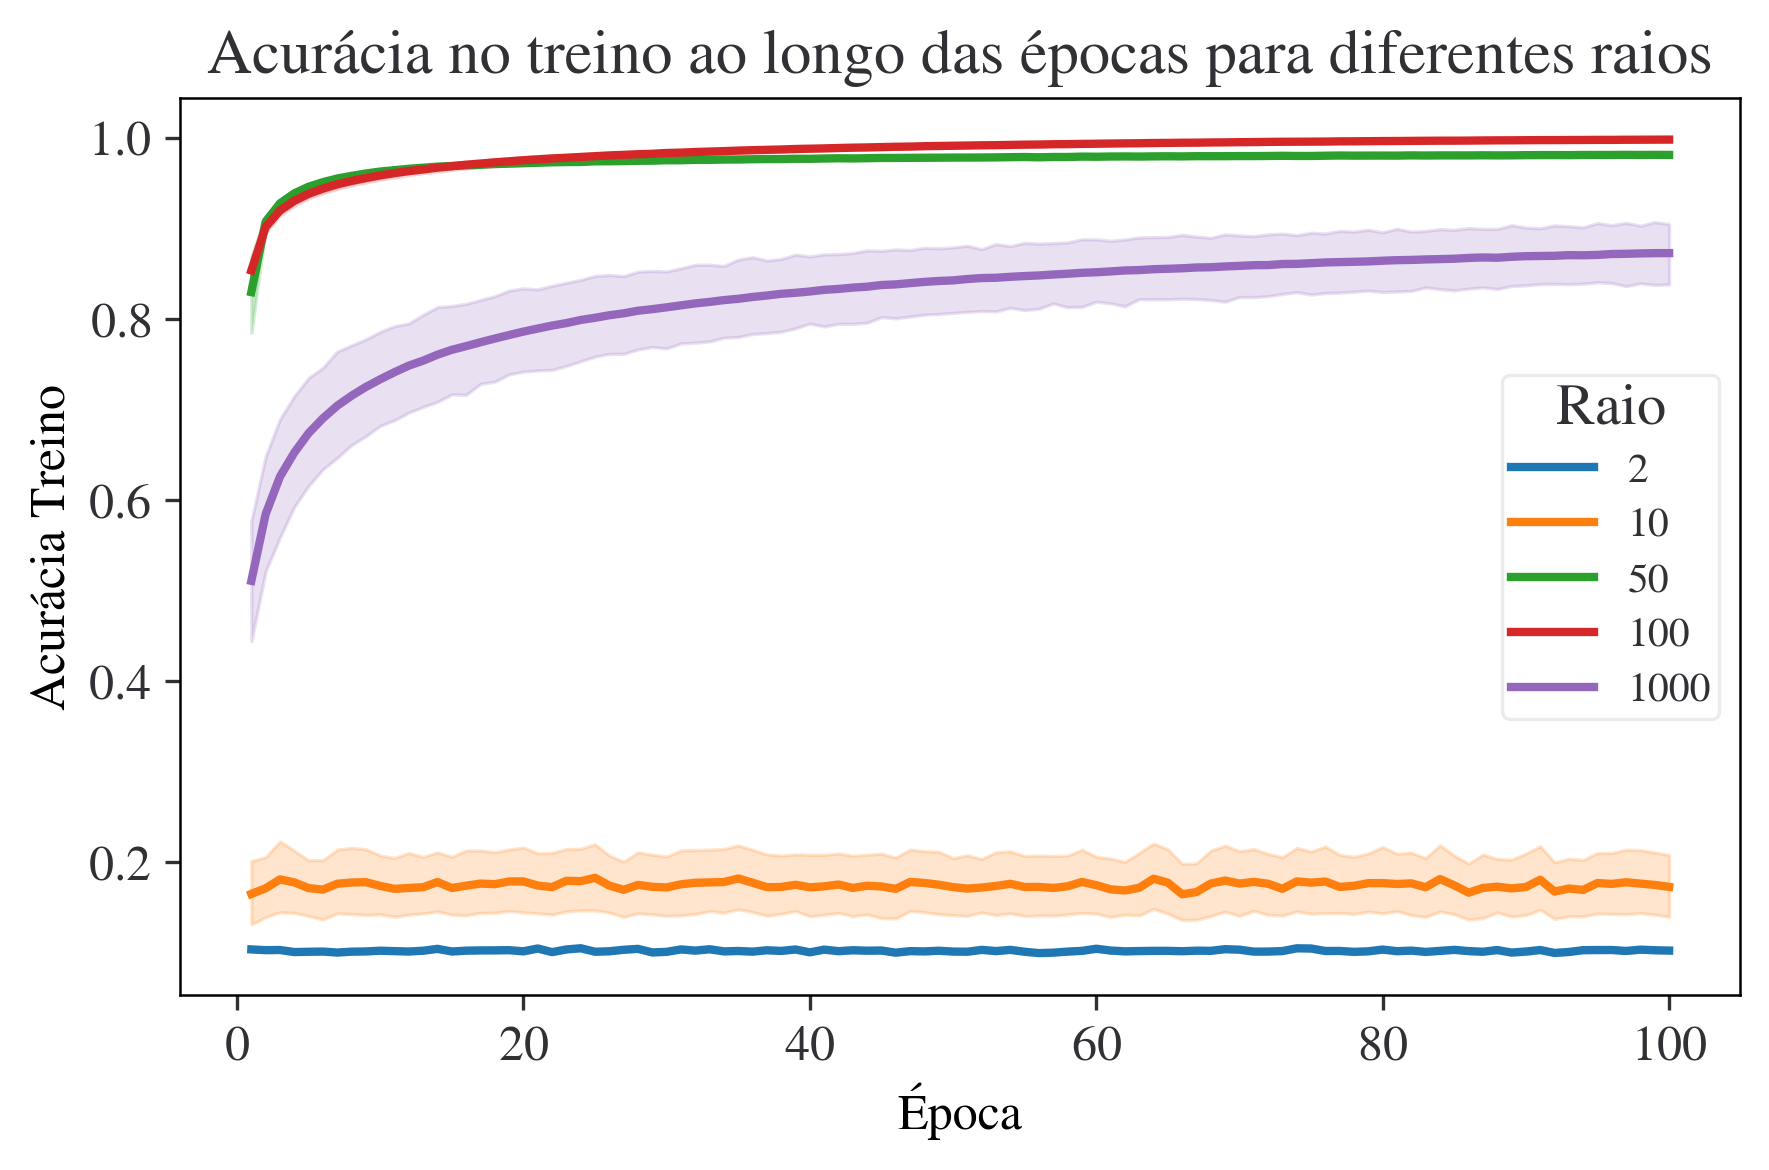

In [7]:
plt.style.use('plot_style.txt')
fig = plt.figure()
sns.lineplot(x="epoca", y="acuracia_treino", hue='raio', data=acuracia_treino_raio_ts, palette = "tab10")
plt.title('Acurácia no treino ao longo das épocas para diferentes raios')
plt.xlabel('Época')
plt.ylabel('Acurácia Treino')
plt.legend(title='Raio')
plt.tight_layout()
plt.show()

fig.savefig('Plots_VariacaoRaio/acuracia_treino.png')

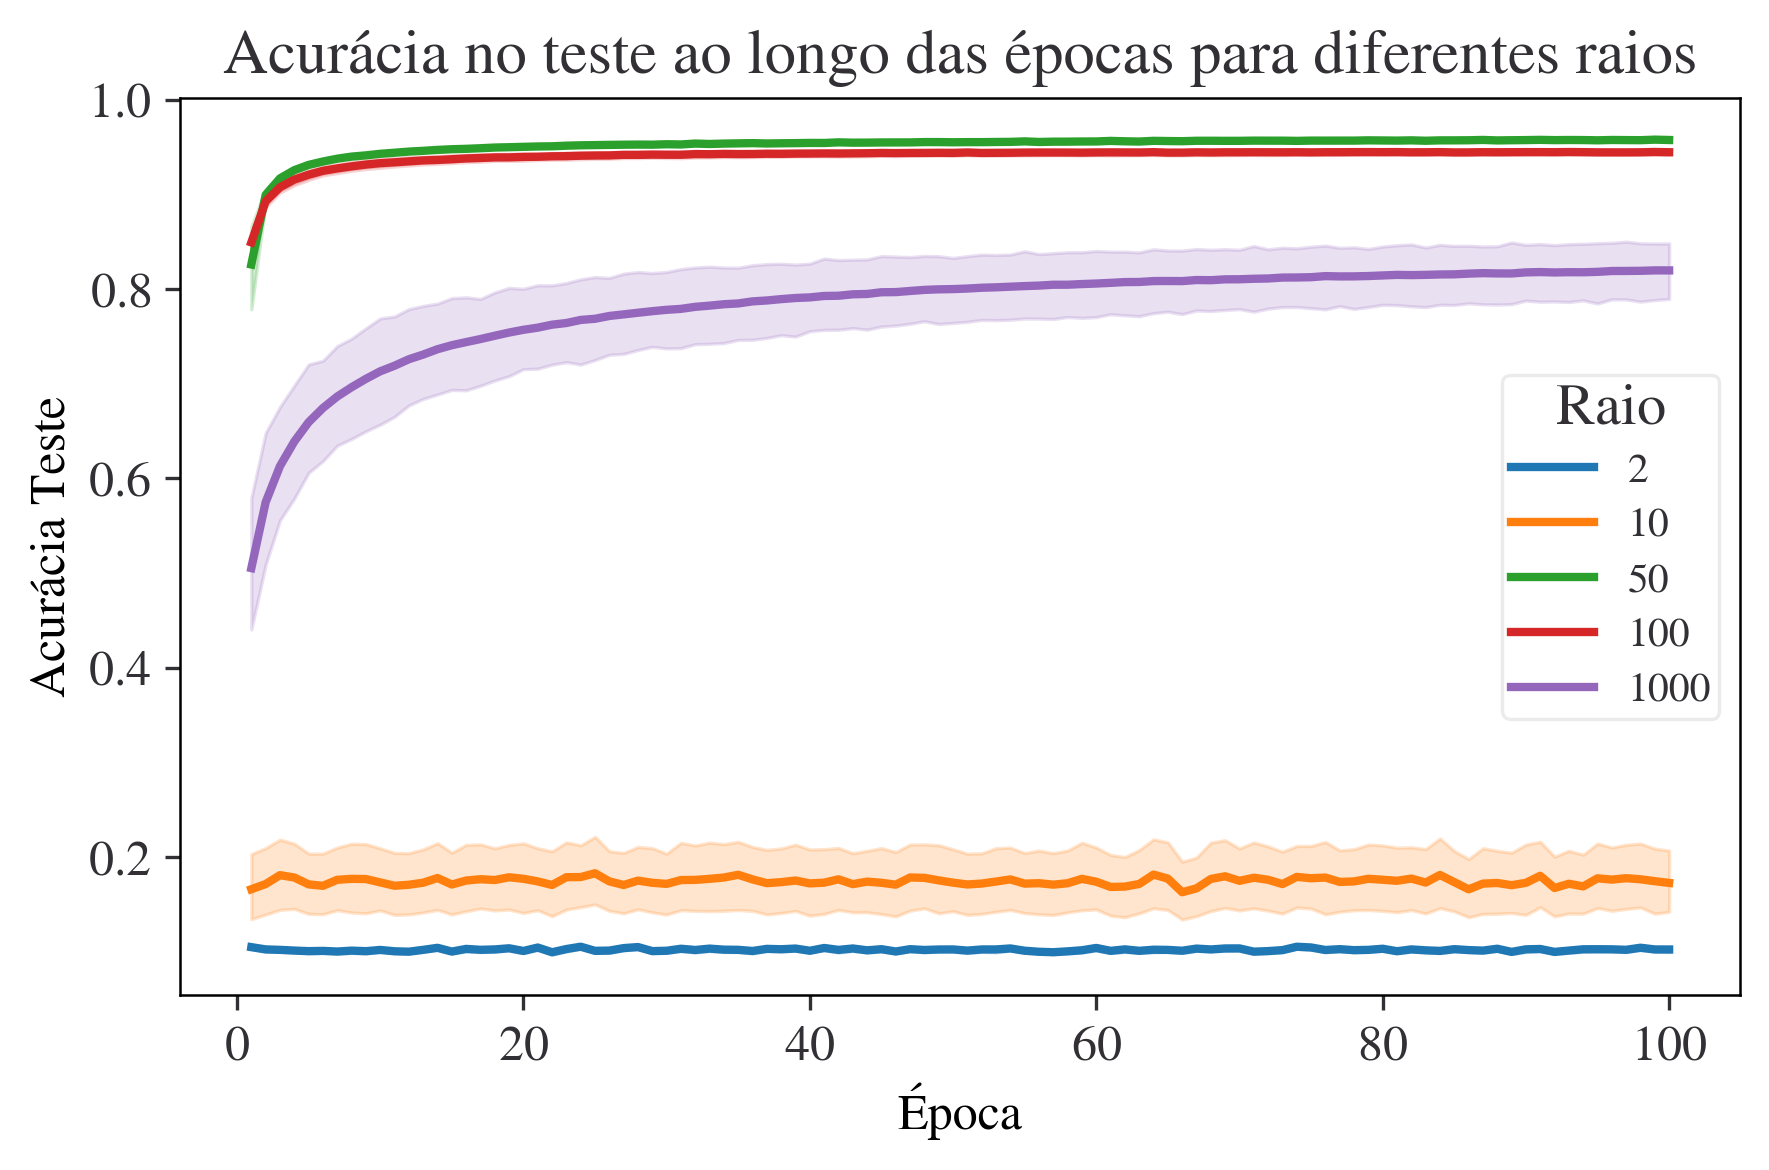

In [8]:
fig = plt.figure()
sns.lineplot(x="epoca", y="acuracia_teste", hue='raio', data=acuracia_teste_raio_ts, palette = "tab10")
plt.title('Acurácia no teste ao longo das épocas para diferentes raios')
plt.xlabel("Época")
plt.ylabel("Acurácia Teste")
plt.legend(title='Raio')
plt.tight_layout()
plt.show()

fig.savefig('Plots_VariacaoRaio/acuracia_teste.png')

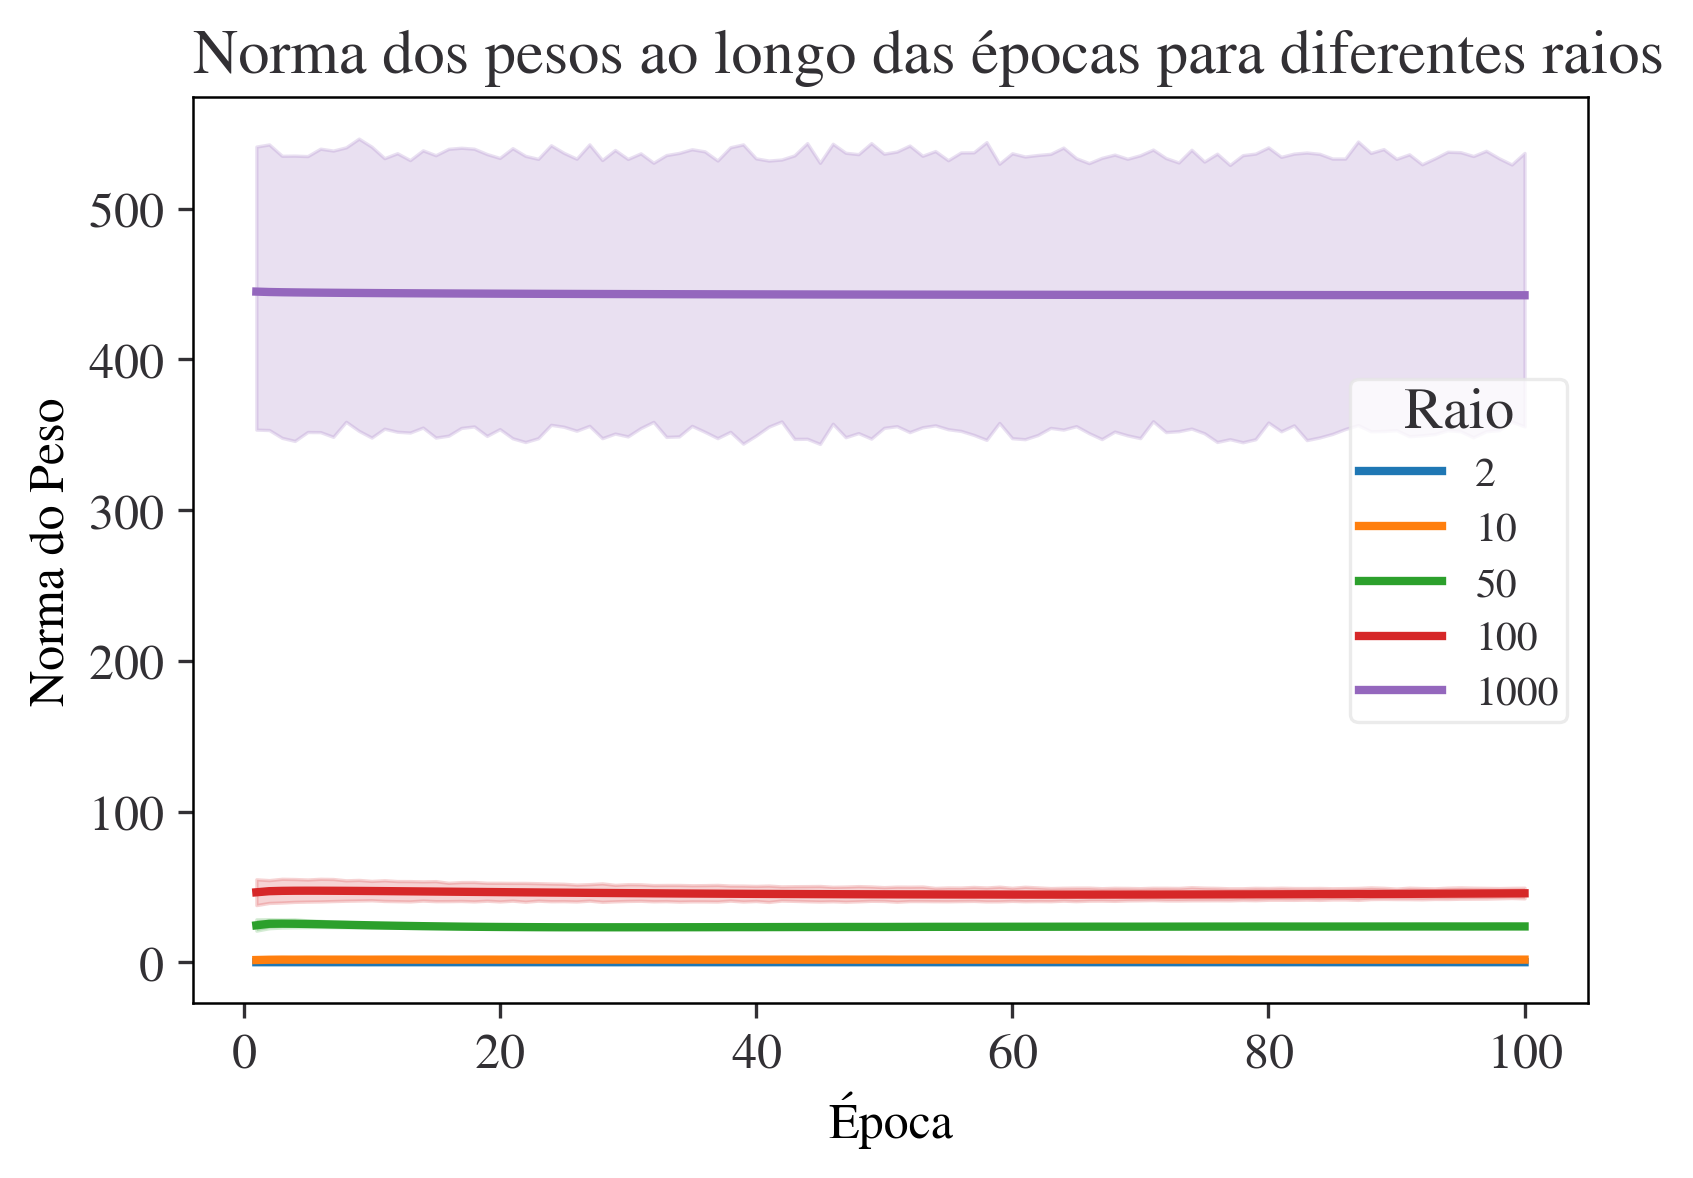

In [17]:
fig = plt.figure()
sns.lineplot(x="epoca", y='norma_peso', hue='raio', data=norma_peso_raio_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes raios')
plt.xlabel('Época')
plt.ylabel('Norma do Peso')
plt.legend(title='Raio')
plt.show()

# fig.savefig('Plots_VariacaoRaio/norma_peso.png')

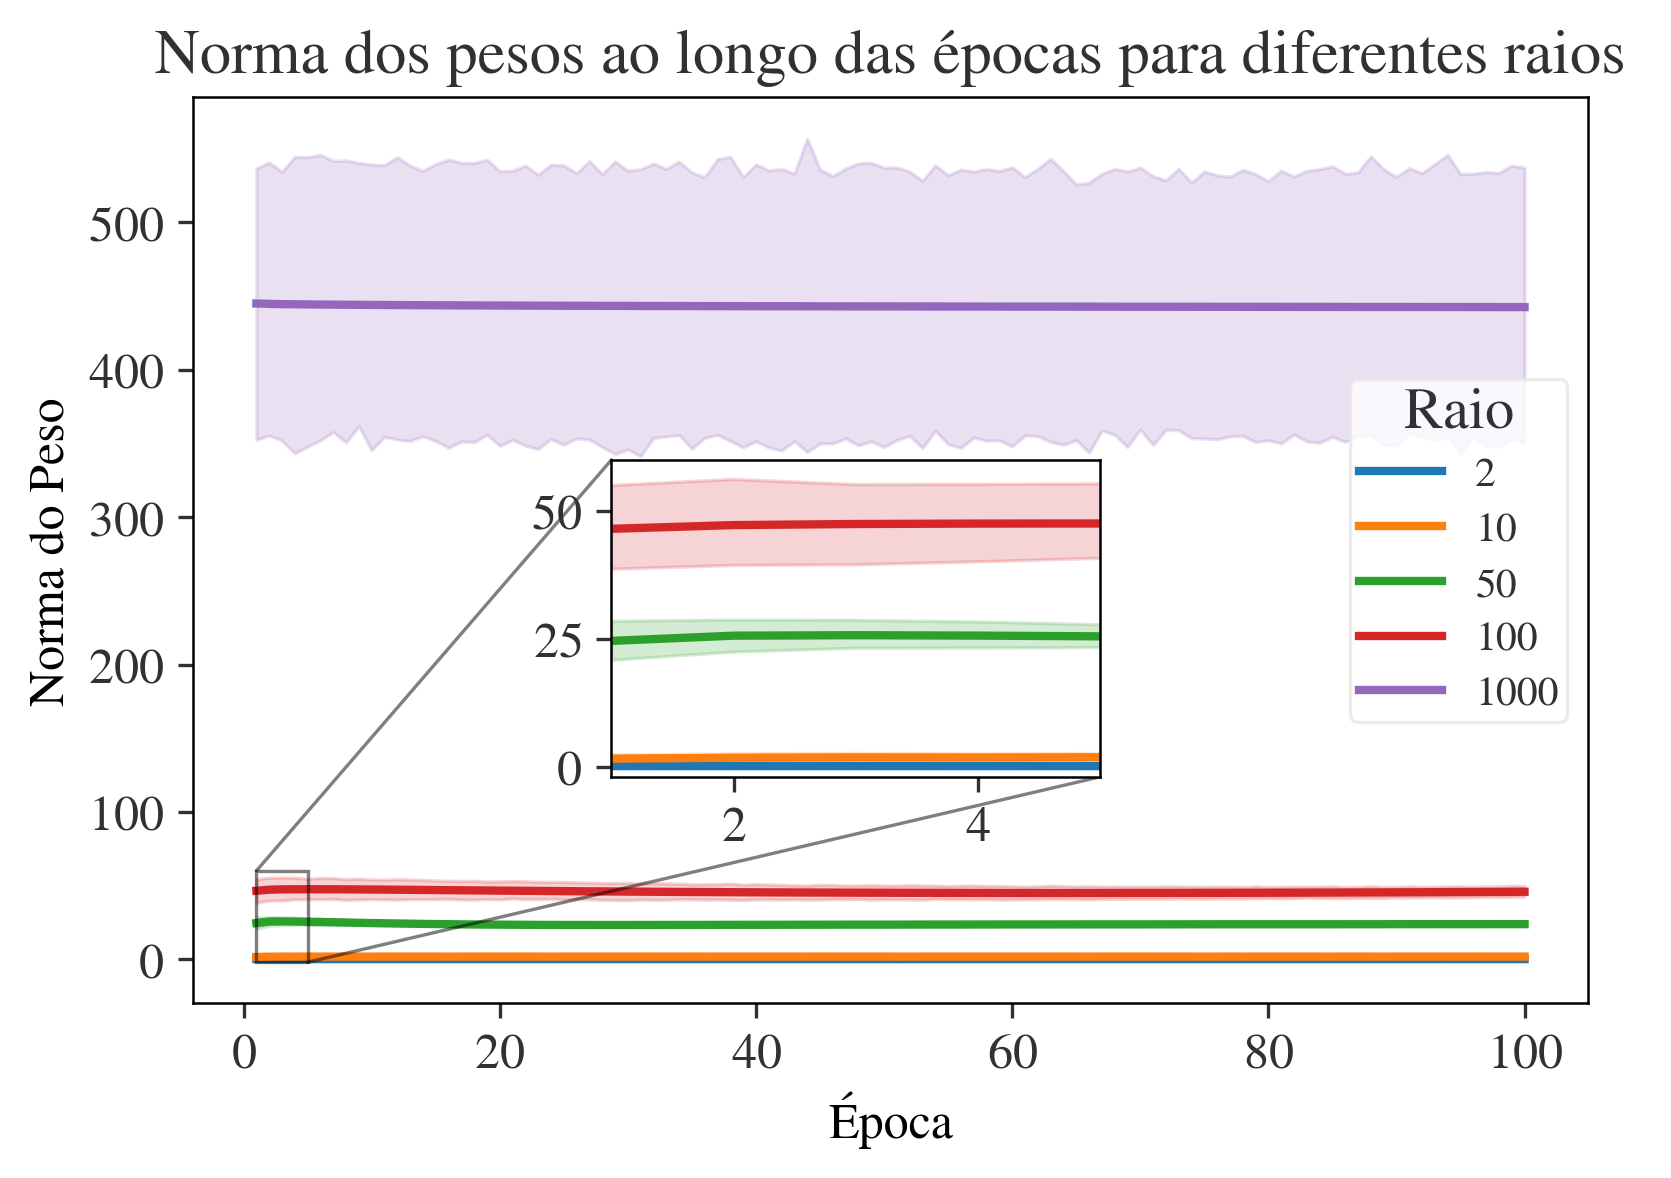

In [68]:
fig, ax = plt.subplots()
sns.lineplot(x='epoca', y='norma_peso', hue='raio', data=norma_peso_raio_ts, palette = 'tab10', ax=ax)
ax.set_title(' Norma dos pesos ao longo das épocas para diferentes raios ')
            #  'Acurácia no teste ao longo das épocas para diferentes raios'
ax.set_xlabel('Época')
ax.set_ylabel('Norma do Peso')
ax.legend(title = 'Raio') #,loc='lower right')


axins = ax.inset_axes([0.3, 0.25, 0.35, 0.35])
sns.lineplot(x='epoca', y='norma_peso', hue='raio', data=norma_peso_raio_ts, palette = 'tab10', ax=axins)
axins.legend_.remove()
x1, x2, y1, y2 = 1, 5, -2, 60
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
ax.indicate_inset_zoom(axins, edgecolor='black')

plt.show()

fig.savefig('Plots_VariacaoRaio/norma_peso.png')

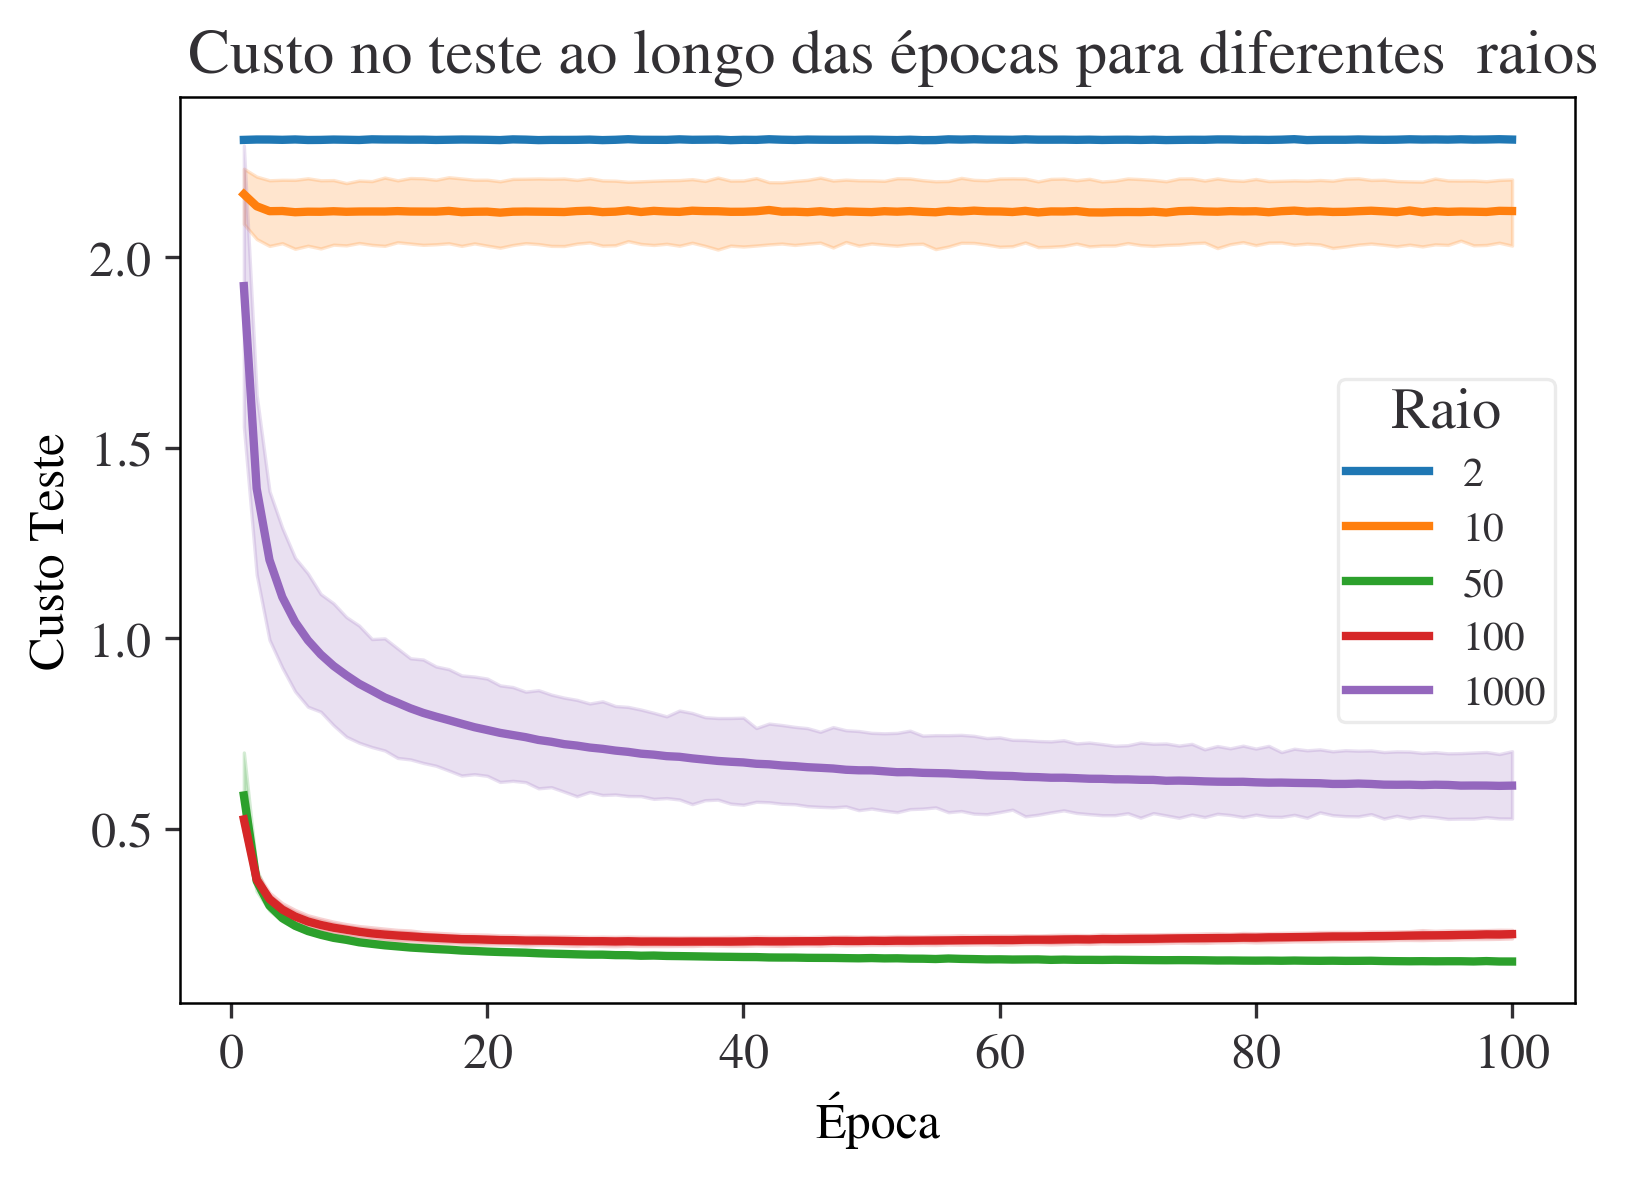

In [71]:
fig = plt.figure()
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='raio', data=perda_teste_raio_ts, palette = 'tab10')
plt.title('  Custo no teste ao longo das épocas para diferentes  raios') #, loc='center')
        #   'Acurácia no teste ao longo das épocas para diferentes raios'
plt.xlabel('Época')
plt.ylabel('Custo Teste')
plt.legend(title='Raio')

plt.show()

fig.savefig('Plots_VariacaoRaio/perda_teste.png')

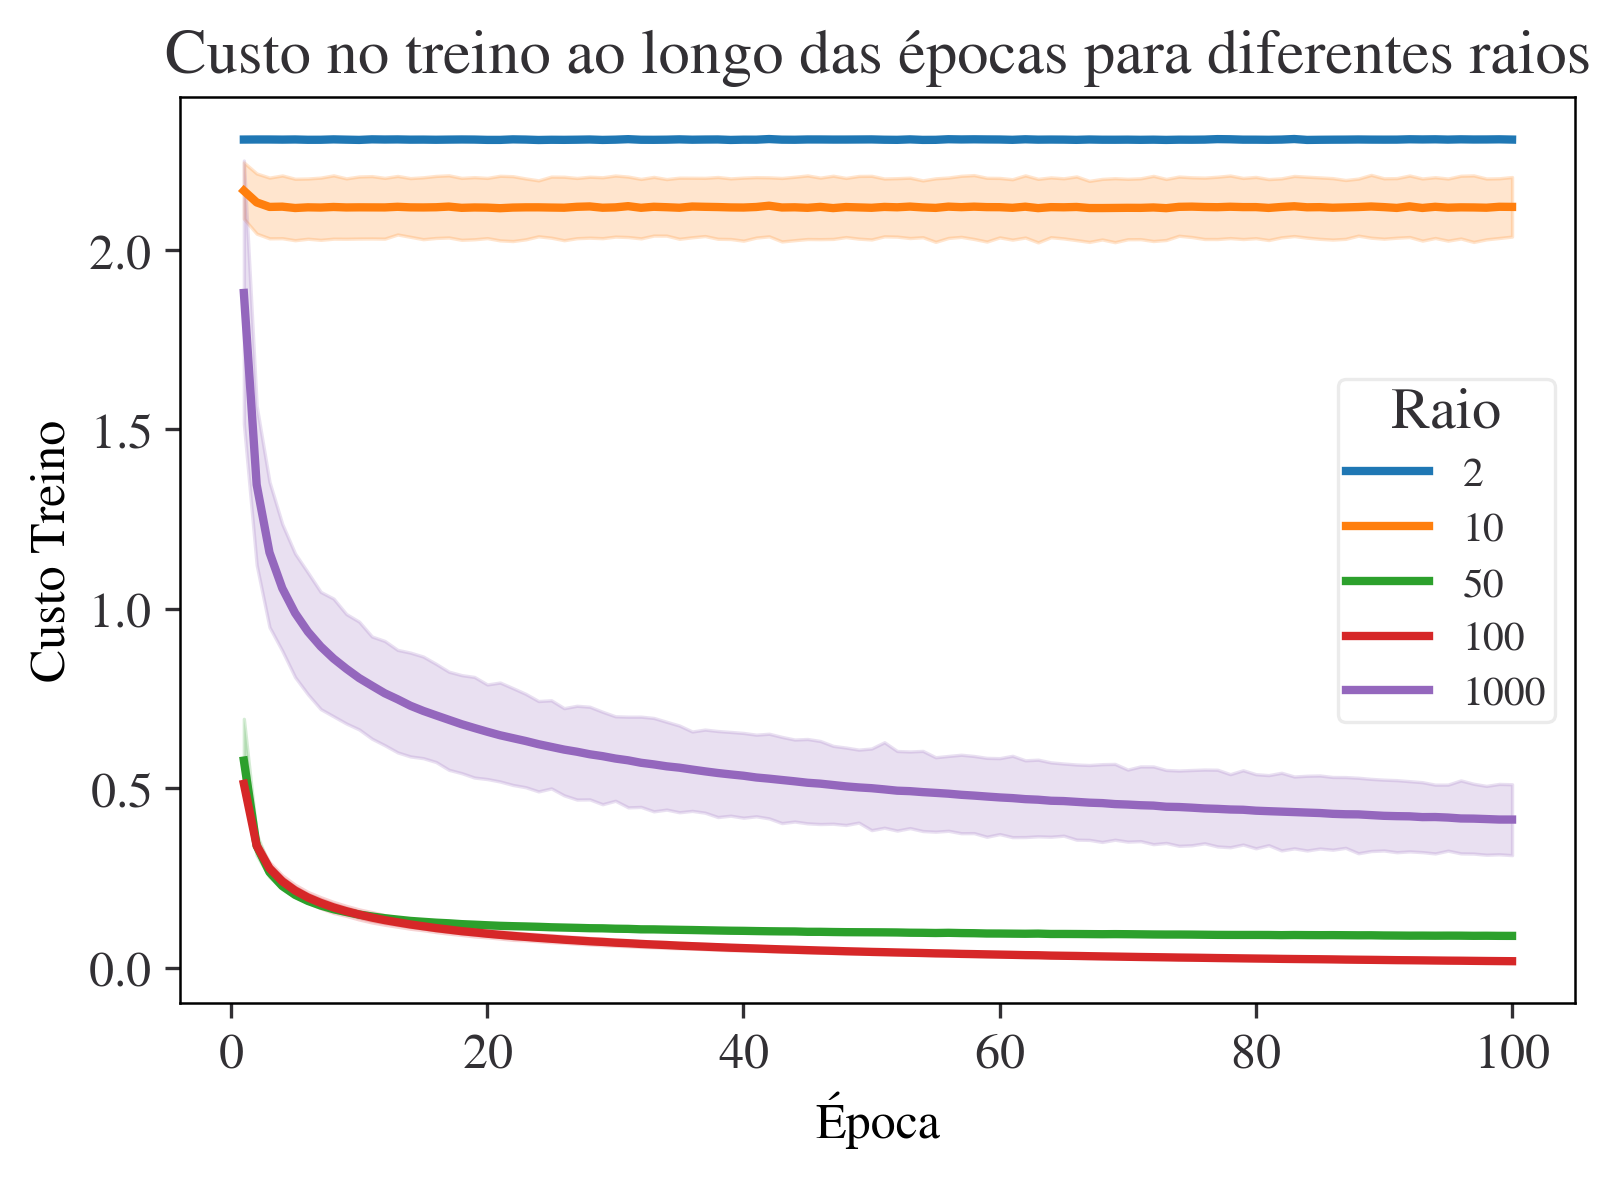

In [72]:
fig = plt.figure()
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='raio', data=perda_treino_raio_ts, palette = 'tab10')
plt.title('Custo no treino ao longo das épocas para diferentes raios')
plt.xlabel('Época')
plt.ylabel('Custo Treino')
plt.legend(title='Raio')
plt.show()

fig.savefig('Plots_VariacaoRaio/perda_treino.png')

## Acuracia treino X acurácia teste x tempo(média, desvio padrão)

In [7]:
left  = acuracia_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-7-0334252c5009>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std'])).reset_index()


raio  Acuracia Treino média  Acuracia Treino std  Acuracia Teste_mean  \
0     2                  0.103                0.006                0.102   
1    10                  0.173                0.095                0.173   
2    50                  0.981                0.001                0.957   
3   100                  0.998                0.002                0.944   
4  1000                  0.873                0.091                0.820   

   Acuracia Teste_std  tempo_mean  tempo_std  
0               0.007     955.474     85.864  
1               0.095     851.518    292.917  
2               0.002    1082.864    196.958  
3               0.007     904.932    215.335  
4               0.085     767.162     86.077

In [8]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 raio &  Acuracia Treino média &  Acuracia Treino std &  Acuracia Teste\_mean &  Acuracia Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
    2 &                  0.103 &                0.006 &                0.102 &               0.007 &     955.474 &     85.864 \\
   10 &                  0.173 &                0.095 &                0.173 &               0.095 &     851.518 &    292.917 \\
   50 &                  0.981 &                0.001 &                0.957 &               0.002 &    1082.864 &    196.958 \\
  100 &                  0.998 &                0.002 &                0.944 &               0.007 &     904.932 &    215.335 \\
 1000 &                  0.873 &                0.091 &                0.820 &               0.085 &     767.162 &     86.077 \\
\bottomrule
\end{tabular}



## Acuracia treino X acurácia teste x tempo (máximo)

In [9]:
left  = acuracia_treino_raio.groupby(by=['raio'])['100'].agg(['max']).reset_index()
rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste Máximo' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Acuracia Treino Máximo']
acuracia_treino_vs_acuracia_teste_max = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
acuracia_treino_vs_acuracia_teste_max = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste_max

<ipython-input-9-2675e8dc60d6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['max'])).reset_index()


raio  Acuracia Treino Máximo  Acuracia Teste Máximo_max  tempo_max
0     2                   0.113                      0.116   1133.570
1    10                   0.389                      0.382   1921.342
2    50                   0.983                      0.960   1251.527
3   100                   1.000                      0.956   1245.924
4  1000                   0.997                      0.936    899.549

In [10]:
print(acuracia_treino_vs_acuracia_teste_max.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 raio &  Acuracia Treino Máximo &  Acuracia Teste Máximo\_max &  tempo\_max \\
\midrule
    2 &                   0.113 &                      0.116 &   1133.570 \\
   10 &                   0.389 &                      0.382 &   1921.342 \\
   50 &                   0.983 &                      0.960 &   1251.527 \\
  100 &                   1.000 &                      0.956 &   1245.924 \\
 1000 &                   0.997 &                      0.936 &    899.549 \\
\bottomrule
\end{tabular}



## Custo treino X custo teste (média, desvio padrão)

In [11]:
left  = perda_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste_media = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
perda_treino_vs_perda_teste_media = perda_treino_vs_perda_teste_media.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste_media

<ipython-input-11-cd76a882cc4b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std'])).reset_index()


raio  Custo Treino média  Custo Treino std  Custo Teste_mean  \
0     2               2.308             0.002             2.308   
1    10               2.120             0.244             2.121   
2    50               0.089             0.004             0.152   
3   100               0.018             0.009             0.224   
4  1000               0.413             0.281             0.613   

   Custo Teste_std  tempo_mean  tempo_std  
0            0.002     955.474     85.864  
1            0.245     851.518    292.917  
2            0.005    1082.864    196.958  
3            0.033     904.932    215.335  
4            0.240     767.162     86.077

In [12]:
print(perda_treino_vs_perda_teste_media.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 raio &  Custo Treino média &  Custo Treino std &  Custo Teste\_mean &  Custo Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
    2 &               2.308 &             0.002 &             2.308 &            0.002 &     955.474 &     85.864 \\
   10 &               2.120 &             0.244 &             2.121 &            0.245 &     851.518 &    292.917 \\
   50 &               0.089 &             0.004 &             0.152 &            0.005 &    1082.864 &    196.958 \\
  100 &               0.018 &             0.009 &             0.224 &            0.033 &     904.932 &    215.335 \\
 1000 &               0.413 &             0.281 &             0.613 &            0.240 &     767.162 &     86.077 \\
\bottomrule
\end{tabular}



In [16]:
left  = perda_treino_raio.groupby(by=['raio'])['100'].agg(['min']).reset_index()
rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Custo Treino Mínimo']
perda_treino_vs_perda_teste_min = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
perda_treino_vs_perda_teste_min = perda_treino_vs_perda_teste_min.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste_min

<ipython-input-16-a27d438c56b3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['min'])).reset_index()


raio  Custo Treino Mínimo  Custo Teste_min  tempo_min
0     2                2.304            2.303    721.276
1    10                1.663            1.663    706.431
2    50                0.082            0.139    707.712
3   100                0.007            0.181    702.953
4  1000                0.017            0.293    704.418

In [17]:
print(perda_treino_vs_perda_teste_min.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 raio &  Custo Treino Mínimo &  Custo Teste\_min &  tempo\_min \\
\midrule
    2 &                2.304 &            2.303 &    721.276 \\
   10 &                1.663 &            1.663 &    706.431 \\
   50 &                0.082 &            0.139 &    707.712 \\
  100 &                0.007 &            0.181 &    702.953 \\
 1000 &                0.017 &            0.293 &    704.418 \\
\bottomrule
\end{tabular}



## Norma do peso inicial e final (min, max, media, desvio padrão)

In [20]:
tab_norma_peso = norma_peso_raio.rename(columns = {'1':'Epoca 1', '100':'Epoca 100'}).groupby(by=['raio'])[['Epoca 1','Epoca 100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,3))
tab_norma_peso

raio Epoca 1                            Epoca 100                    \
            min      max     mean      std       min      max     mean   
0     2   0.059    0.180    0.115    0.031     0.049    0.196    0.120   
1    10   0.153    4.912    1.574    1.867     0.163    5.108    1.829   
2    50   7.112   42.872   24.597   10.726    23.397   24.401   23.849   
3   100  13.544   87.725   46.513   24.126    36.896   69.426   45.838   
4  1000  58.217  887.715  445.026  268.621    74.648  877.801  442.598   

            
       std  
0    0.027  
1    2.049  
2    0.238  
3   10.149  
4  261.676

In [21]:
print(tab_norma_peso.to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
 raio & \multicolumn{4}{l}{Epoca 1} & \multicolumn{4}{l}{Epoca 100} \\
      &     min &      max &     mean &      std &       min &      max &     mean &      std \\
\midrule
    2 &   0.059 &    0.180 &    0.115 &    0.031 &     0.049 &    0.196 &    0.120 &    0.027 \\
   10 &   0.153 &    4.912 &    1.574 &    1.867 &     0.163 &    5.108 &    1.829 &    2.049 \\
   50 &   7.112 &   42.872 &   24.597 &   10.726 &    23.397 &   24.401 &   23.849 &    0.238 \\
  100 &  13.544 &   87.725 &   46.513 &   24.126 &    36.896 &   69.426 &   45.838 &   10.149 \\
 1000 &  58.217 &  887.715 &  445.026 &  268.621 &    74.648 &  877.801 &  442.598 &  261.676 \\
\bottomrule
\end{tabular}



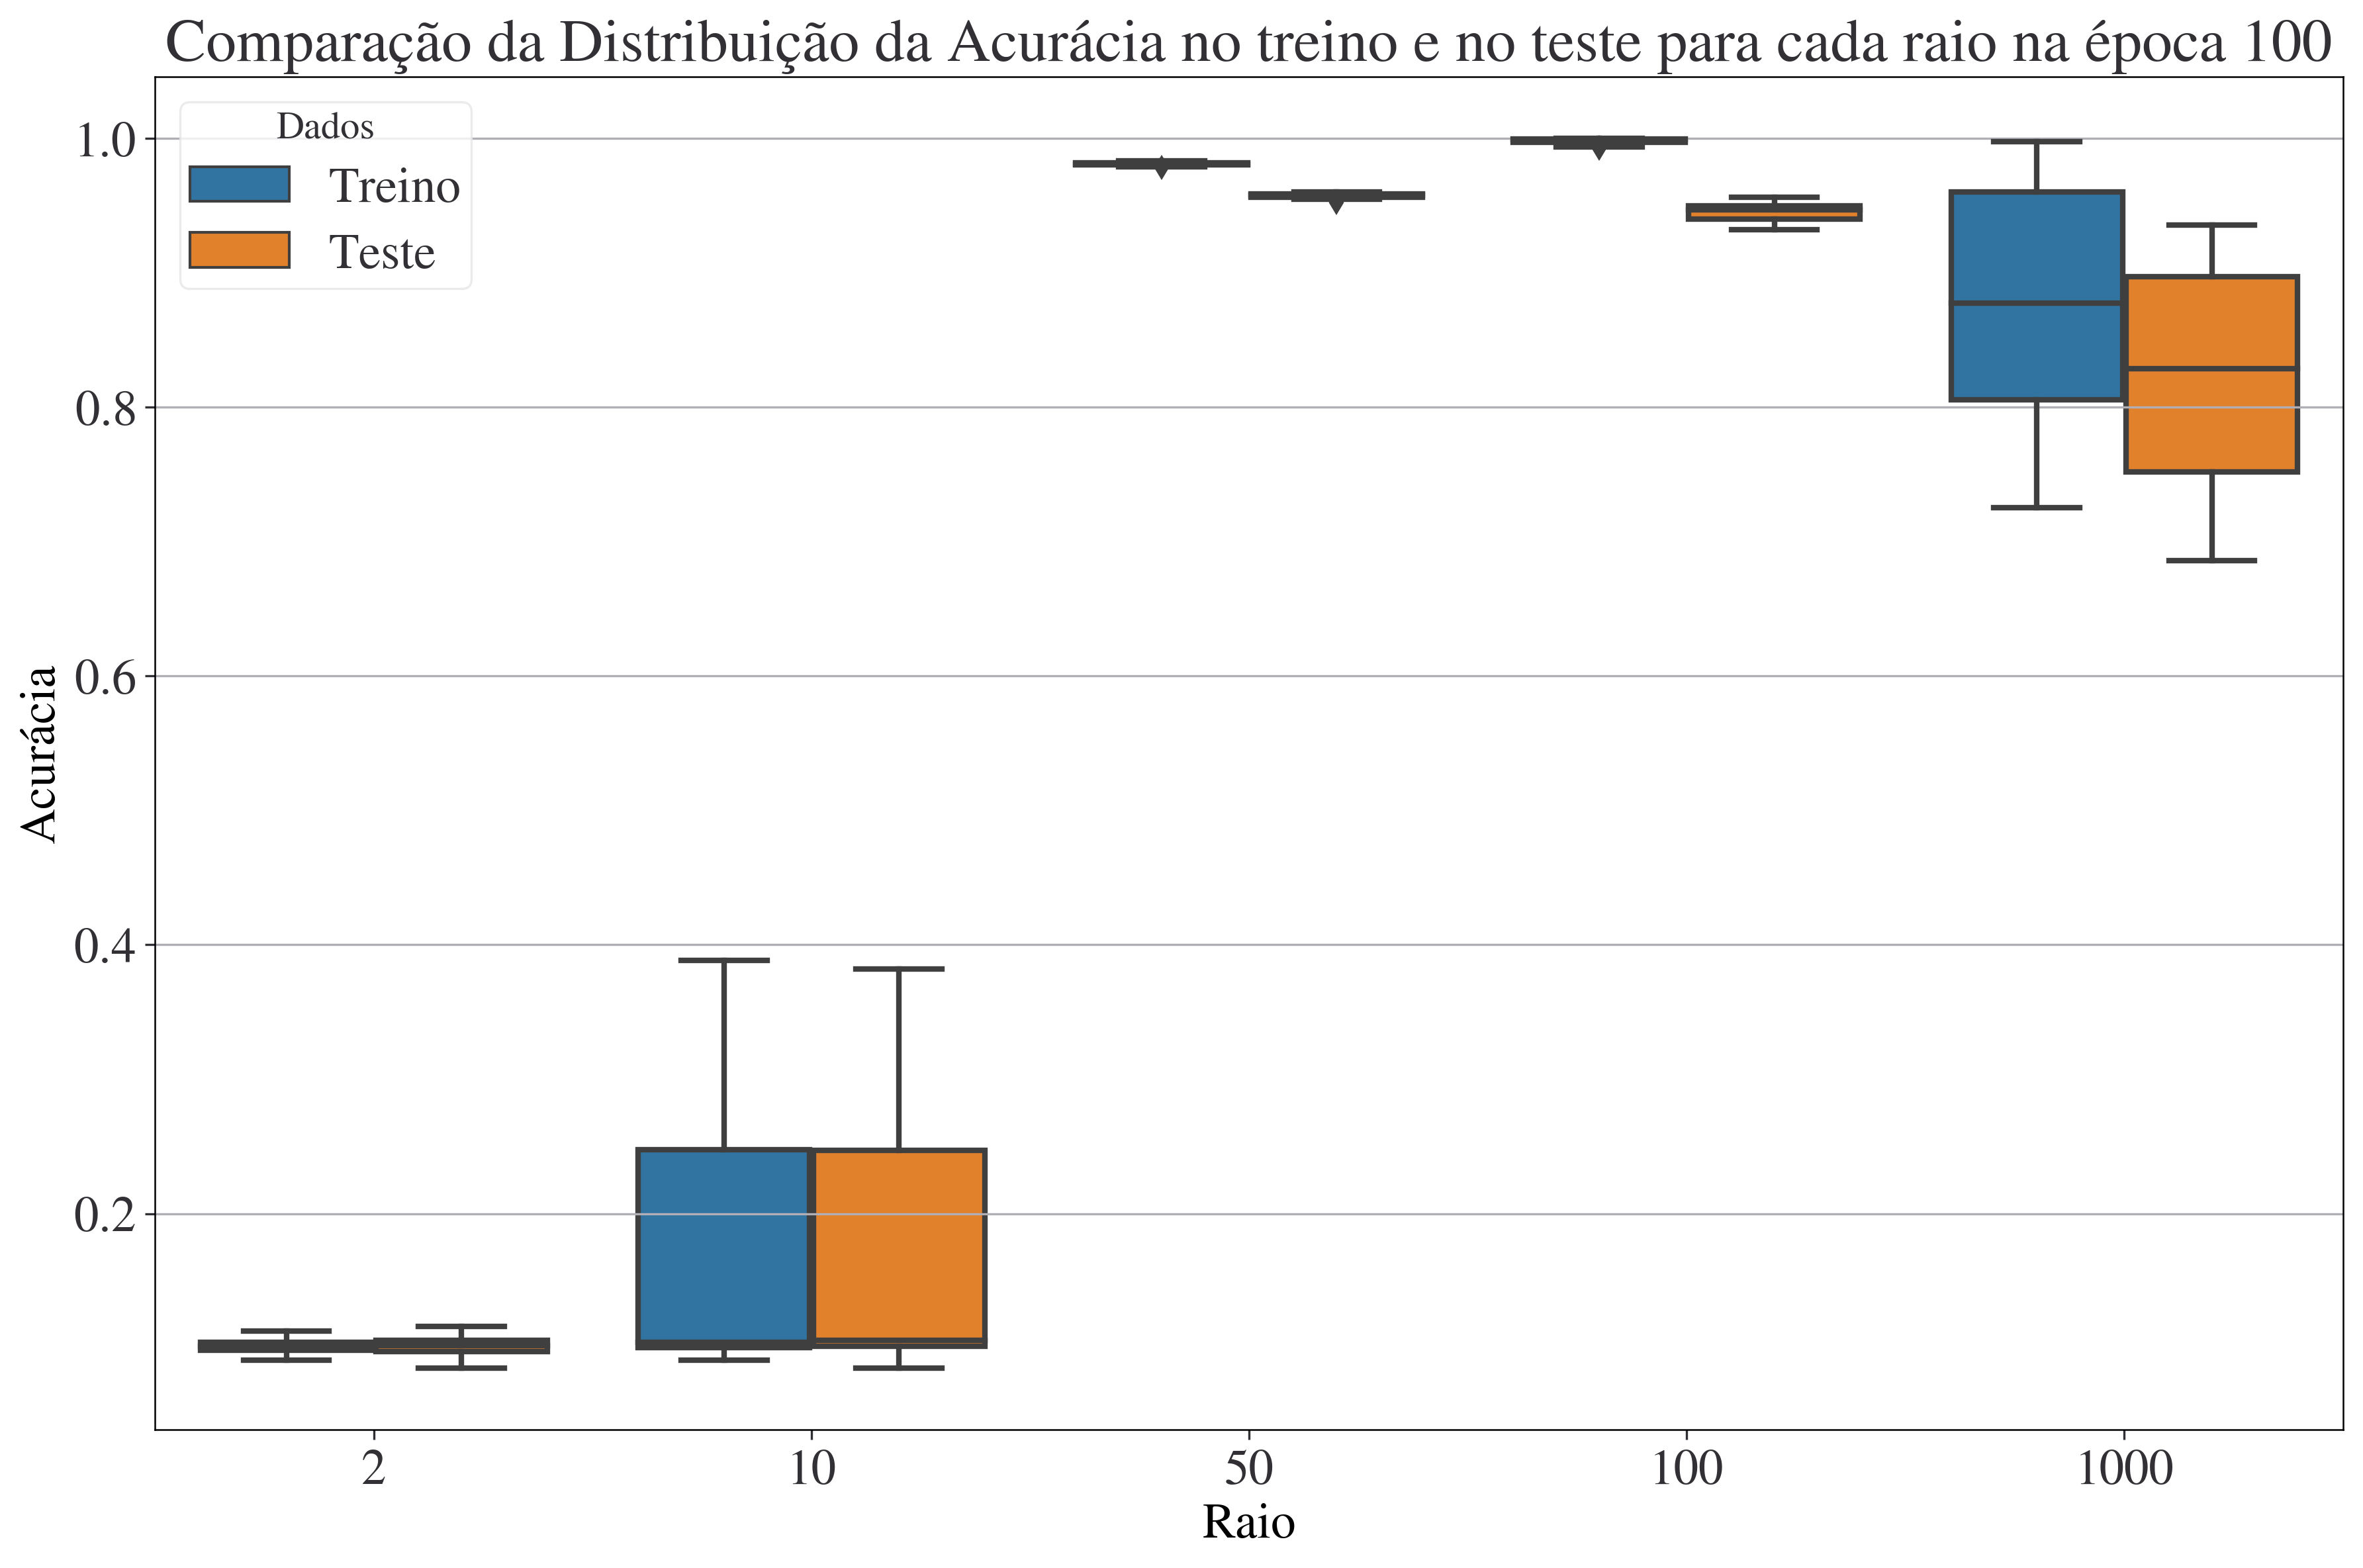

In [65]:
tab_aux1 = acuracia_treino_raio[['raio','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_raio[['raio','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.style.use('plot_style.txt')
fig = plt.figure(figsize=(12,8))
sns.boxplot(data = tab_aux, x = 'raio', y = '100', hue = 'Dados', palette = 'tab10')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada raio na época 100', fontsize = 22, loc = 'center')
plt.xlabel('Raio', fontsize = 18)
plt.ylabel('Acurácia', fontsize = 18)
plt.legend(title='Dados', fontsize = 18, loc='upper left')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

fig.savefig('Plots_VariacaoRaio/acuracia_epoca100.png')

In [15]:
tempo = acuracia_teste_raio['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 136858.502 s = 38.016 h


# Variação Iteração

In [6]:
caminho = 'TabelasVariacaoIteracao/'
acuracia_teste_iteracao  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_iteracao = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_iteracao      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_iteracao     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_iteracao    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_iteracao.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

Dando uma olhada na base

In [17]:
acuracia_teste_iteracao.sample(5)

metodo  passo_inicial  iteracoes  raio  semente       1       2       3  \
108  FDIPA        0.23112          7    49       18  0.9124  0.9365  0.9415   
2    FDIPA        0.23112          1    49        2  0.8091  0.8791  0.8989   
97   FDIPA        0.23112          7    49        7  0.9146  0.9329  0.9399   
123  FDIPA        0.23112         10    49        3  0.9119  0.9246  0.9378   
100  FDIPA        0.23112          7    49       10  0.9151  0.9338  0.9385   

          4       5  ...      92      93      94      95      96      97  \
108  0.9420  0.9415  ...  0.9561  0.9547  0.9565  0.9555  0.9566  0.9560   
2    0.9078  0.9138  ...  0.9457  0.9472  0.9459  0.9459  0.9473  0.9470   
97   0.9385  0.9450  ...  0.9549  0.9551  0.9559  0.9569  0.9580  0.9589   
123  0.9374  0.9458  ...  0.9551  0.9574  0.9574  0.9567  0.9563  0.9556   
100  0.9407  0.9441  ...  0.9565  0.9574  0.9582  0.9566  0.9605  0.9575   

         98      99     100        tempo  
108  0.9550  0.9559  0.9554  1905.296412  
2    0.9471  0.9478  0.9475   689.436893  
97   0.9566  0.9542  0.9551  1911.793102  
123  0.9565  0.9557  0.9549  2647.515008  
100  0.9585  0.9585  0.9570  1903.014326  

[5 rows x 106 columns]

Função semelhante a definida anteriormente mas agora para o contexto de variação da iteracao

In [7]:
# Para a seção de variação da iteracao
def df_to_time_series_iteracao(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['iteracoes', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [8]:
acuracia_teste_iteracao_ts  = df_to_time_series_iteracao(acuracia_teste_iteracao, 1, colunas_parametros, colunas_epocas)
acuracia_treino_iteracao_ts = df_to_time_series_iteracao(acuracia_treino_iteracao, 2, colunas_parametros, colunas_epocas)
norma_peso_iteracao_ts      = df_to_time_series_iteracao(norma_peso_iteracao, 3, colunas_parametros, colunas_epocas)
perda_teste_iteracao_ts     = df_to_time_series_iteracao(perda_teste_iteracao, 4, colunas_parametros, colunas_epocas)
perda_treino_iteracao_ts    = df_to_time_series_iteracao(perda_treino_iteracao, 5, colunas_parametros, colunas_epocas)
acuracia_teste_iteracao_ts.sample(10)

passo_inicial  iteracoes  raio  epoca  acuracia_teste
8833         0.23112         10    49     59          0.9528
11841        0.23112         10    49     79          0.9583
2497         0.23112          7    49     17          0.9529
5427         0.23112          1    49     37          0.9447
9723         0.23112         10    49     65          0.9543
2563         0.23112          1    49     18          0.9387
2671         0.23112         10    49     18          0.9525
12024        0.23112          1    49     81          0.9489
6269         0.23112          7    49     42          0.9564
10242        0.23112          2    49     69          0.9566

## Métricas ao longo das épocas

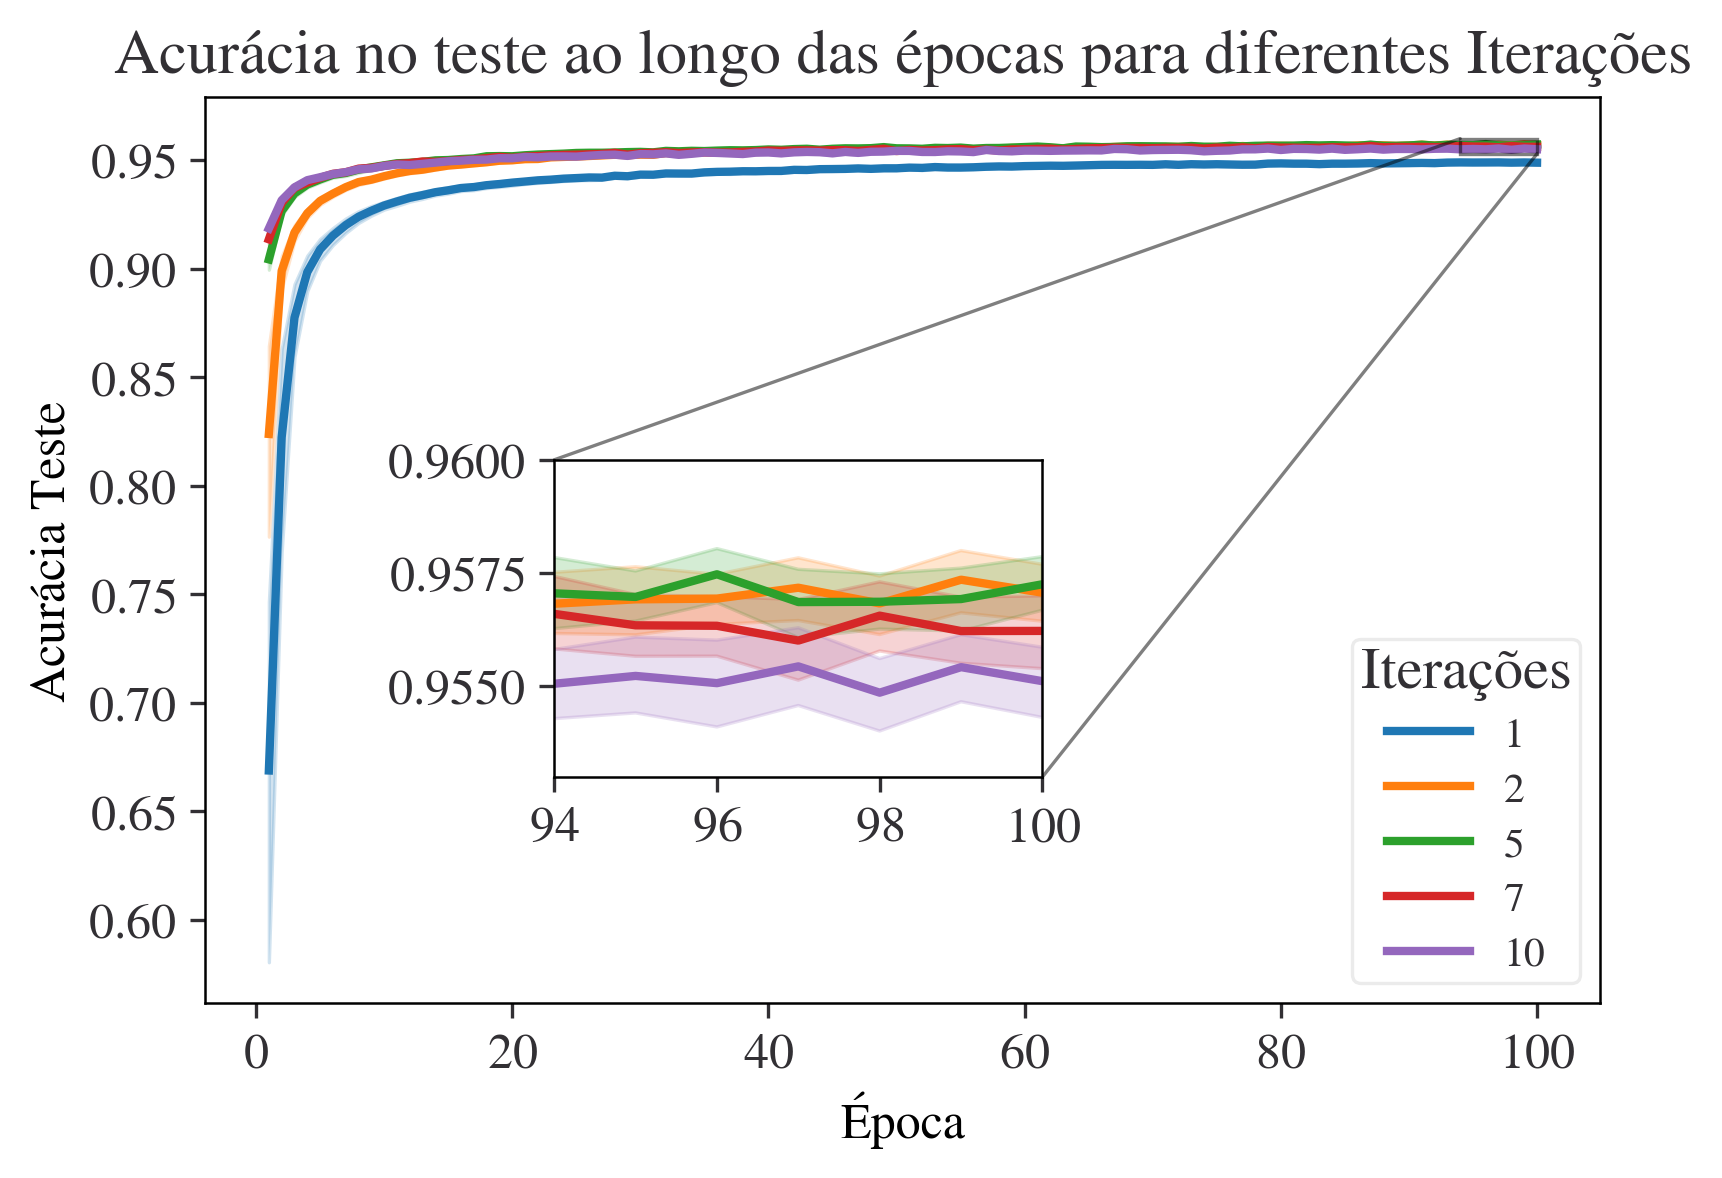

In [12]:
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_teste", hue='iteracoes', data=acuracia_teste_iteracao_ts, palette = "tab10", ax = ax)
ax.set_title('Acurácia no teste ao longo das épocas para diferentes Iterações')
ax.set_xlabel("Época")
ax.set_ylabel("Acurácia Teste")
ax.legend(title = 'Iterações', loc='lower right')

axins = ax.inset_axes([0.25, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_teste", hue='iteracoes', data=acuracia_teste_iteracao_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 94, 100, 0.953, 0.96
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoIteracao/acuracia_teste.png')

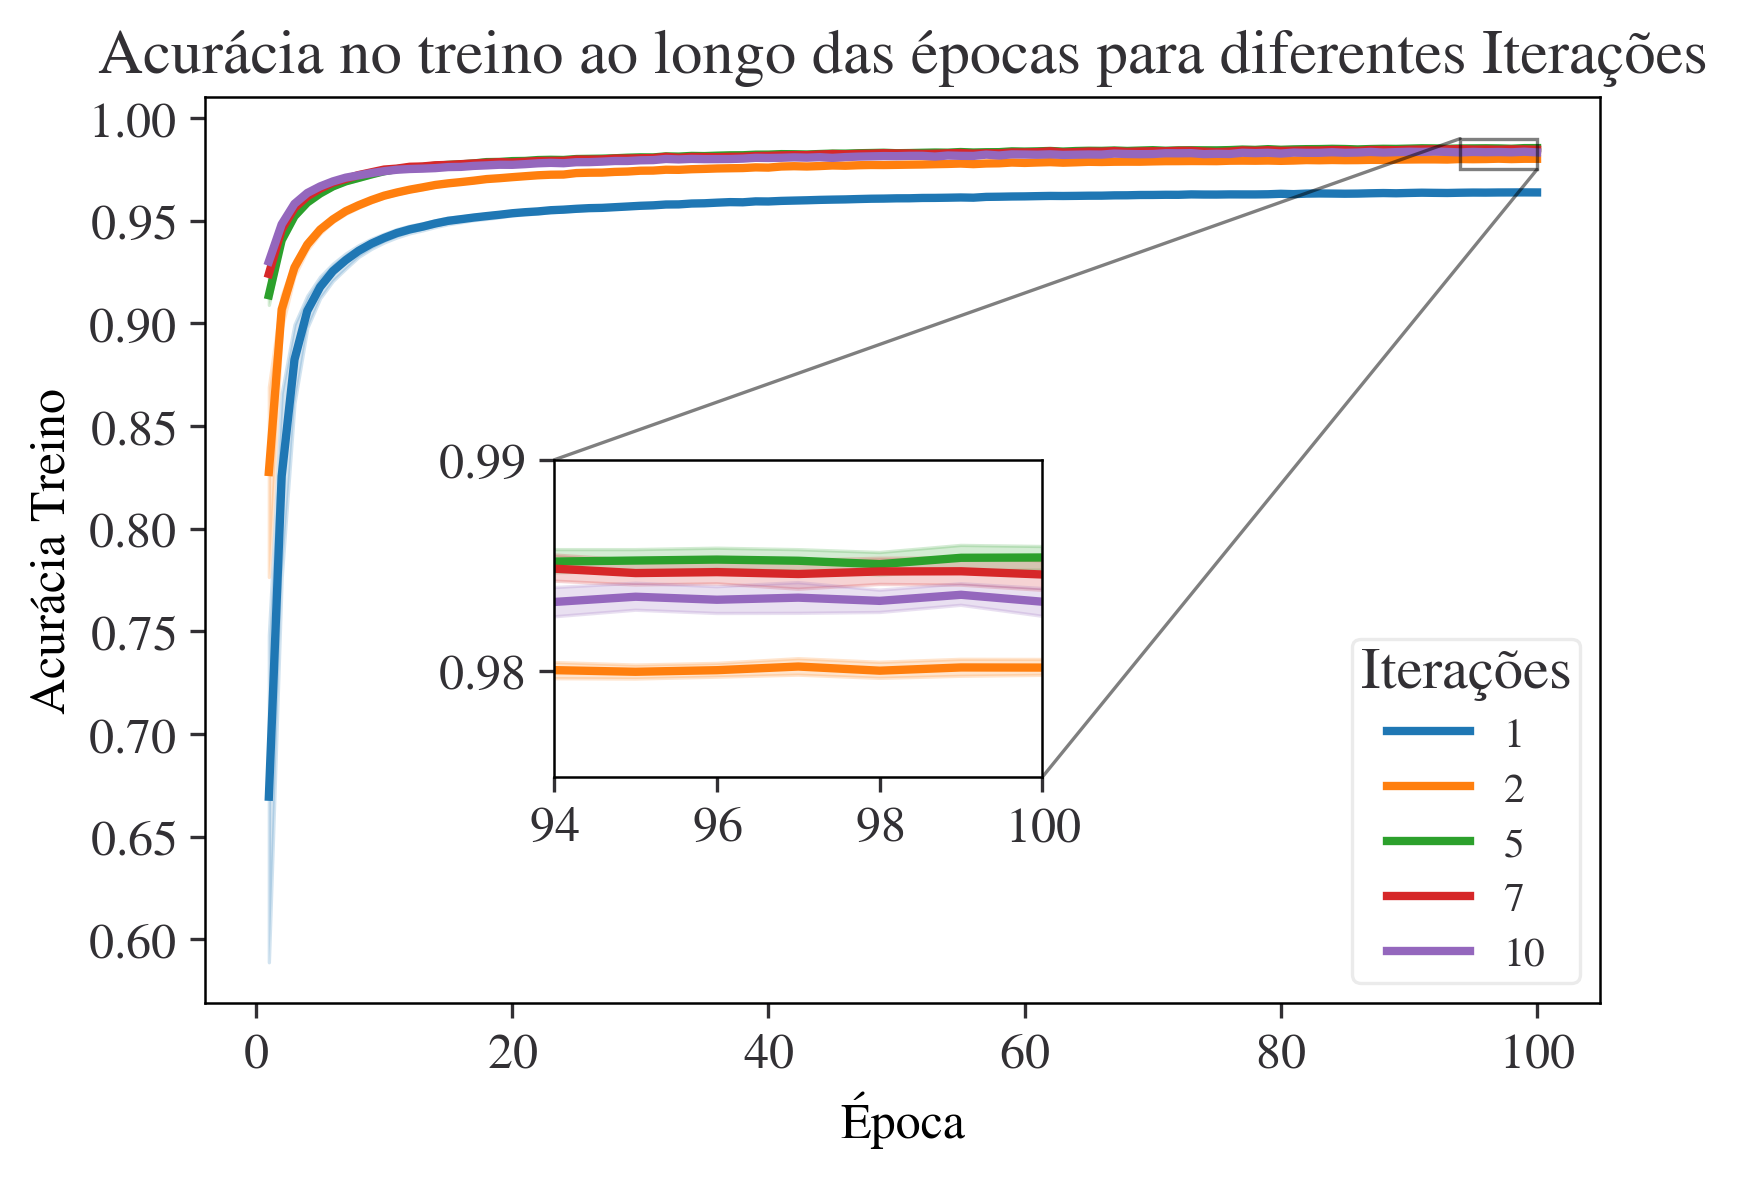

In [14]:
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_treino", hue='iteracoes', data=acuracia_treino_iteracao_ts, palette = "tab10", ax = ax)
ax.set_title('Acurácia no treino ao longo das épocas para diferentes Iterações')
ax.set_xlabel("Época")
ax.set_ylabel("Acurácia Treino")
ax.legend(title = 'Iterações',loc='lower right')

axins = ax.inset_axes([0.25, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_treino", hue='iteracoes', data=acuracia_treino_iteracao_ts, palette = "tab10", ax = axins)
axins.legend_.remove()
x1, x2, y1, y2 = 94, 100, 0.975, 0.99
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

fig.savefig('Plots_VariacaoIteracao/acuracia_treino.png')

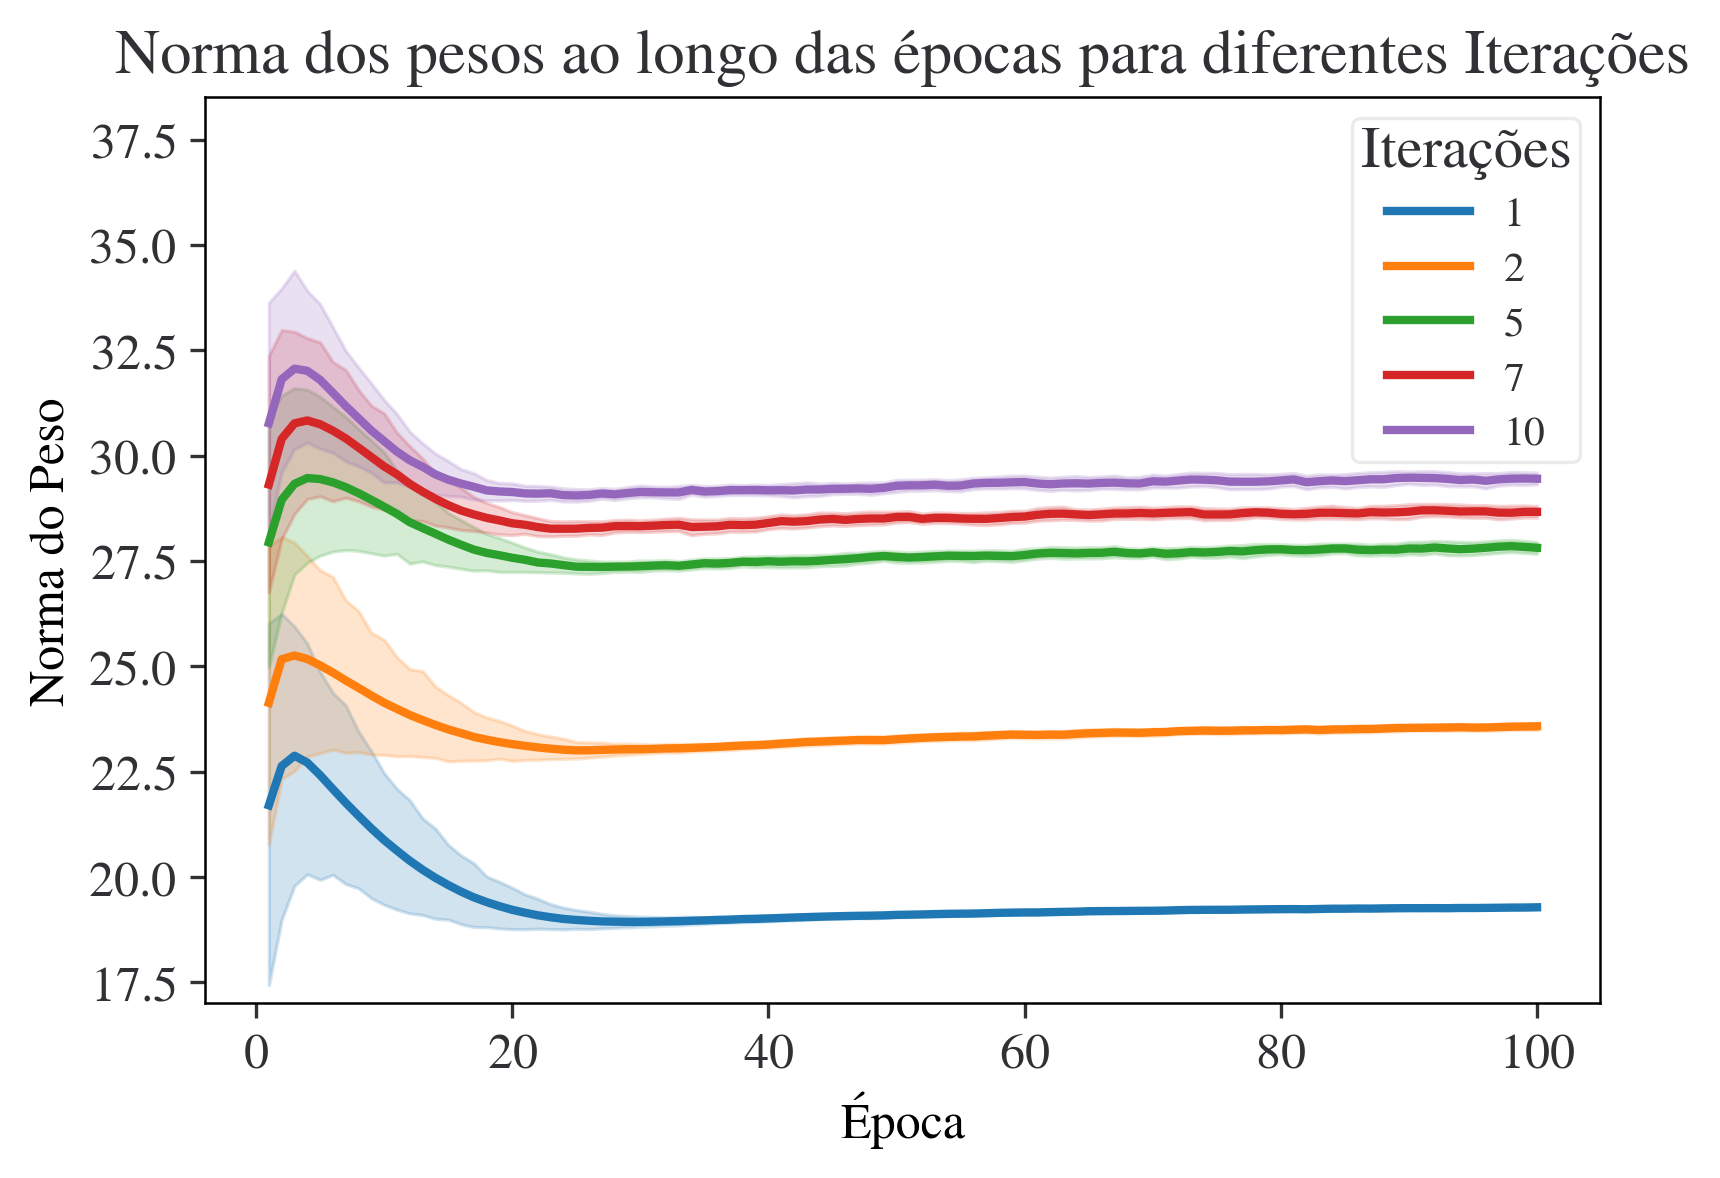

In [24]:
fig = plt.figure()
sns.lineplot(x="epoca", y='norma_peso', hue='iteracoes', data=norma_peso_iteracao_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes Iterações')
plt.xlabel("Época")
plt.ylabel("Norma do Peso")
plt.ylim((17,38.5))
plt.legend(title='Iterações', loc='upper right')
plt.show()

fig.savefig('Plots_VariacaoIteracao/norma_peso.png')

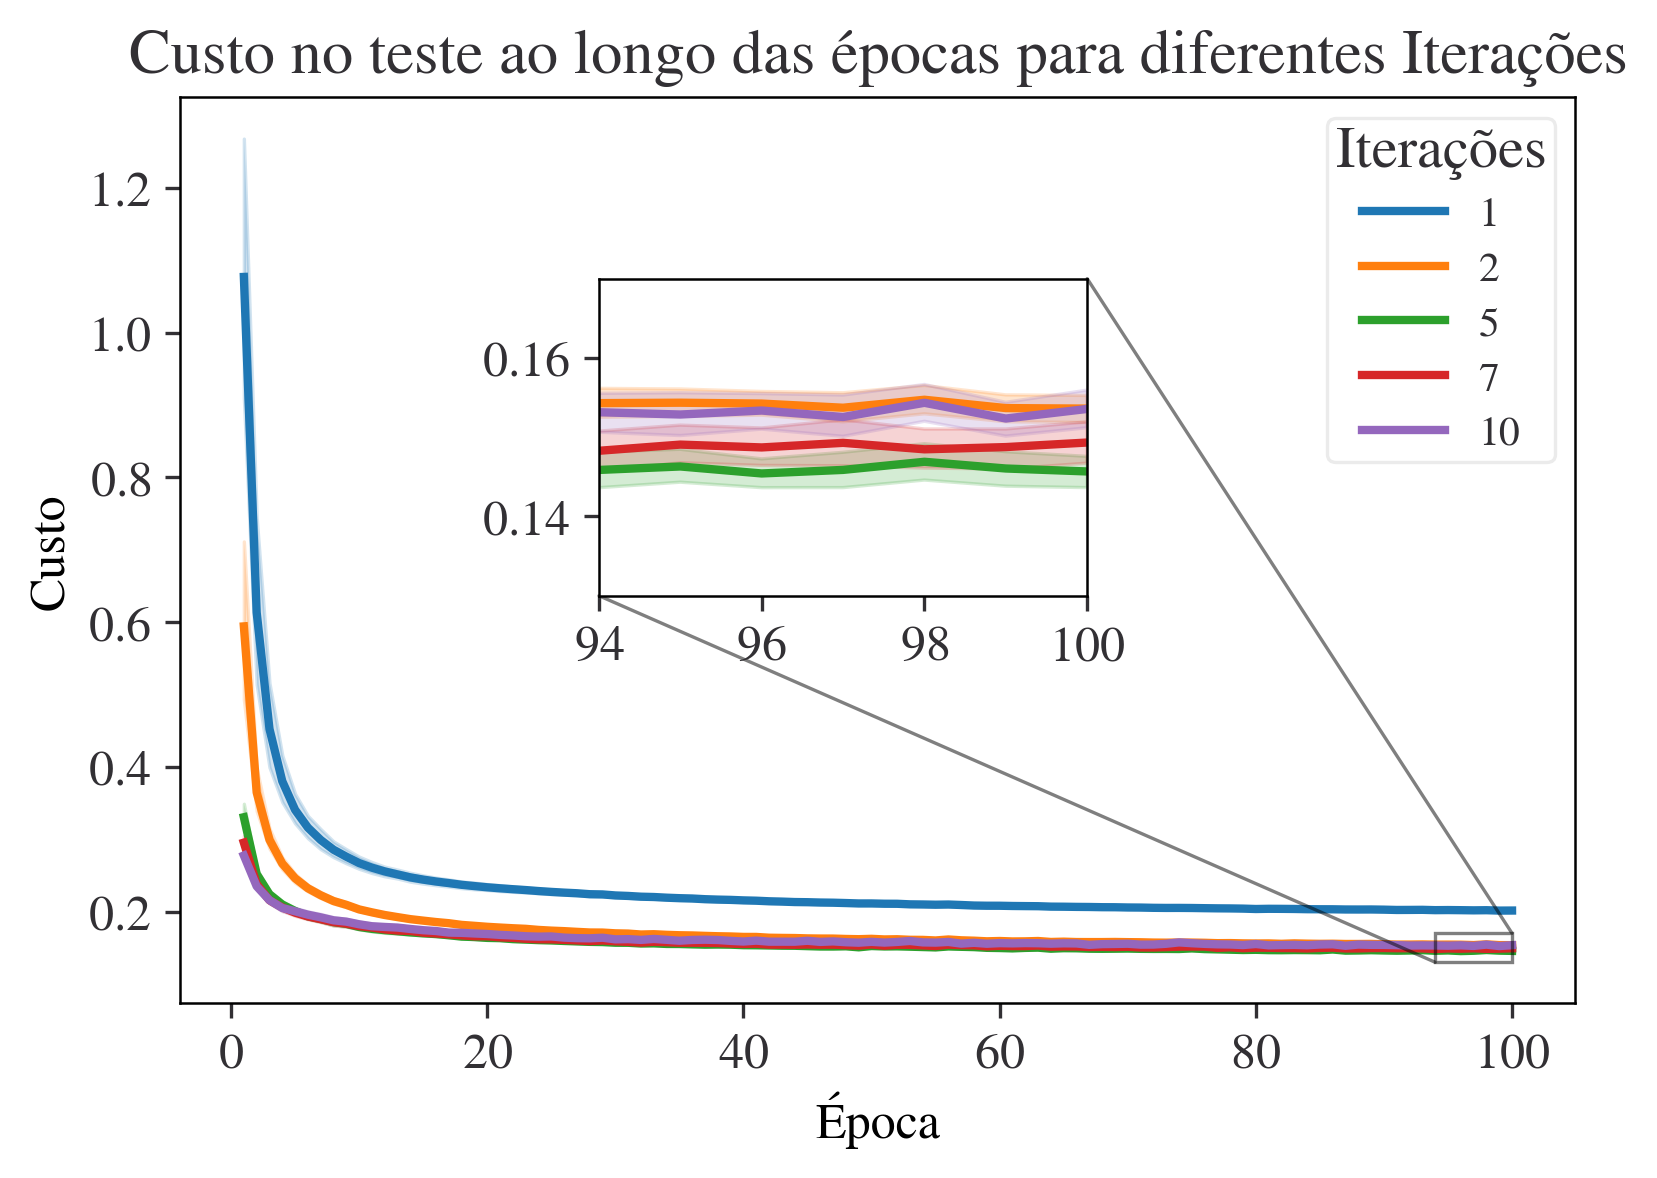

In [26]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='iteracoes', data=perda_teste_iteracao_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no teste ao longo das épocas para diferentes Iterações')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='Iterações', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='iteracoes', data=perda_teste_iteracao_ts, palette = 'tab10', ax=axins)
x1, x2, y1, y2 = 94, 100, 0.13, 0.17
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoIteracao/perda_teste.png')

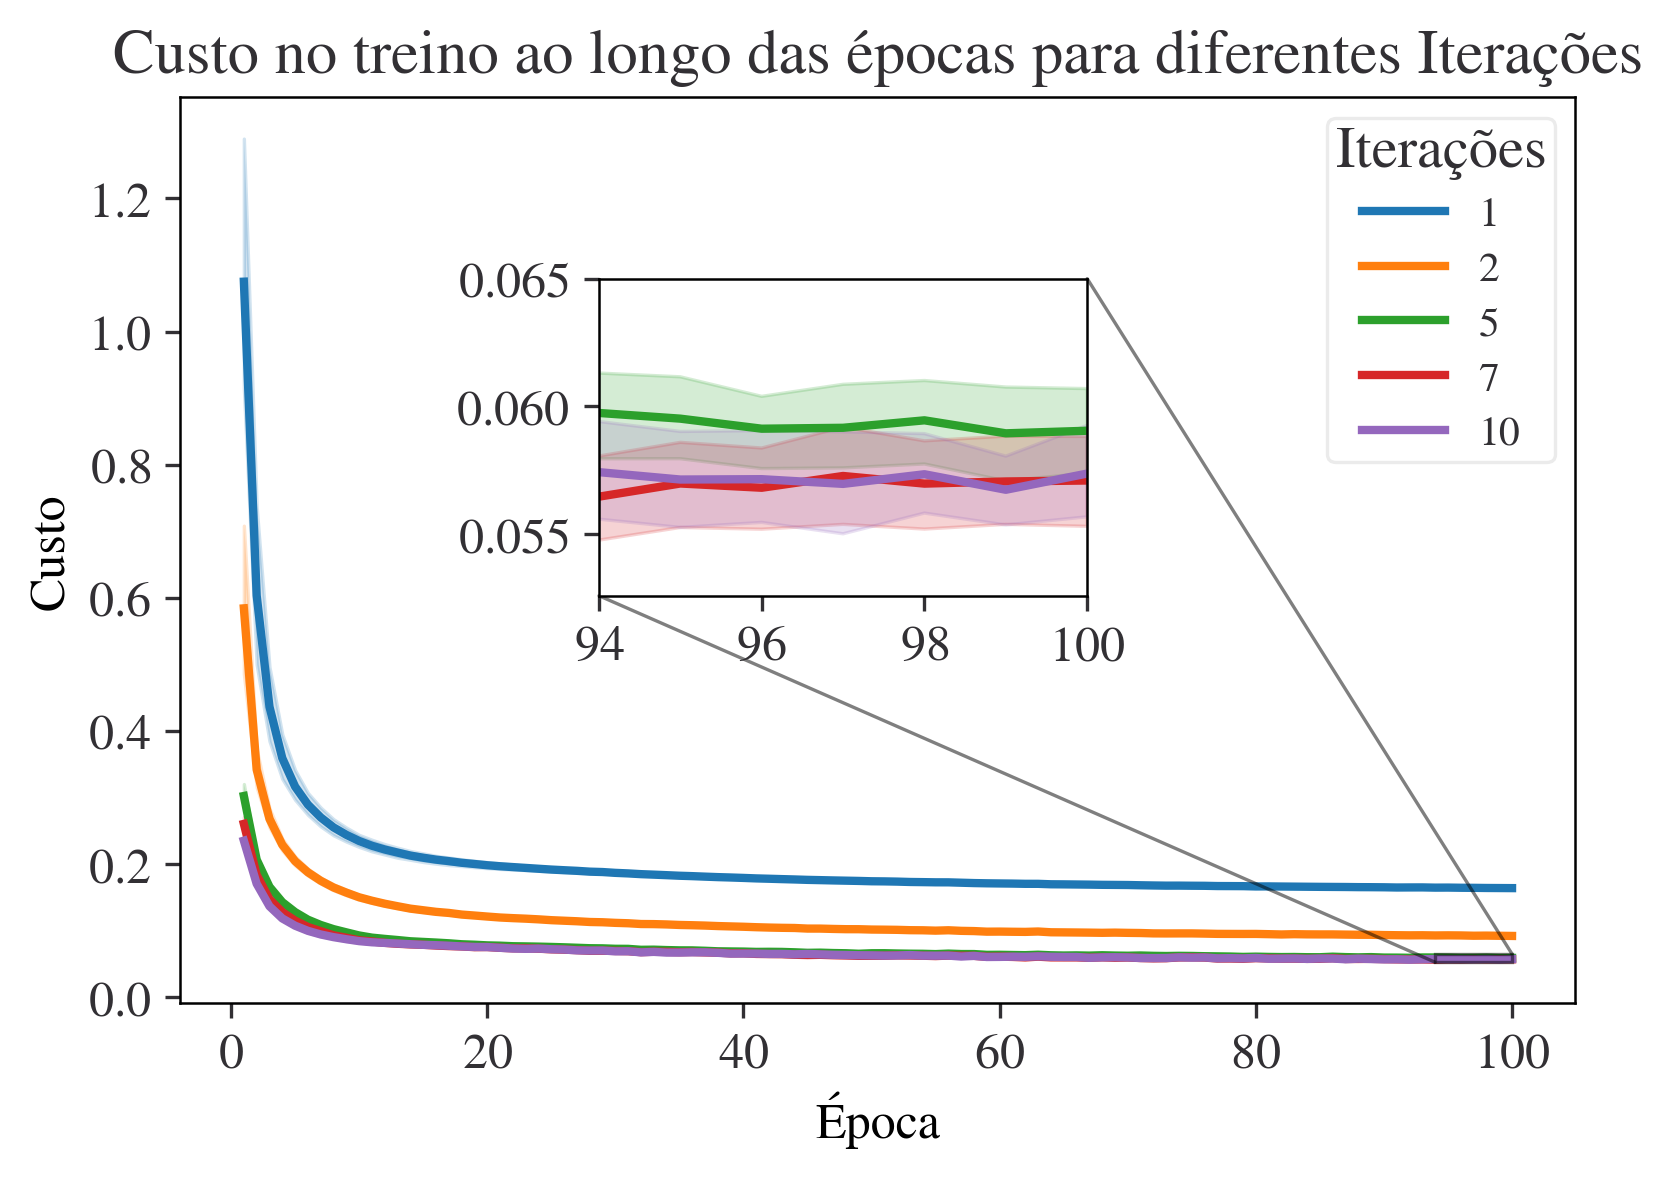

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='iteracoes', data=perda_treino_iteracao_ts, palette = 'tab10', ax=ax)
ax.set_title('Custo no treino ao longo das épocas para diferentes Iterações')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='Iterações', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='iteracoes', data=perda_treino_iteracao_ts, palette = 'tab10', ax=axins)

x1, x2, y1, y2 = 94, 100, 0.0526, 0.065
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoIteracao/perda_treino.png')

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [30]:
left  = acuracia_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-30-5e528b8628d1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std'])).reset_index()


iteracoes  Acuracia Treino média  Acuracia Treino std  Acuracia Teste_mean  \
0          1                  0.964                0.001                0.949   
1          2                  0.980                0.001                0.957   
2          5                  0.985                0.002                0.957   
3          7                  0.985                0.002                0.956   
4         10                  0.983                0.002                0.955   

   Acuracia Teste_std  tempo_mean  tempo_std  
0               0.002     672.535    172.209  
1               0.002     820.880    303.790  
2               0.002    2026.218   1090.844  
3               0.002    2120.654    696.625  
4               0.002    2641.864     10.525

In [32]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 iteracoes &  Acuracia Treino média &  Acuracia Treino std &  Acuracia Teste\_mean &  Acuracia Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         1 &                  0.964 &                0.001 &                0.949 &               0.002 &     672.535 &    172.209 \\
         2 &                  0.980 &                0.001 &                0.957 &               0.002 &     820.880 &    303.790 \\
         5 &                  0.985 &                0.002 &                0.957 &               0.002 &    2026.218 &   1090.844 \\
         7 &                  0.985 &                0.002 &                0.956 &               0.002 &    2120.654 &    696.625 \\
        10 &                  0.983 &                0.002 &                0.955 &               0.002 &    2641.864 &     10.525 \\
\bottomrule
\end{tabular}



In [46]:
left  = acuracia_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['max']).reset_index()
rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Acuracia Treino Max']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-46-37be92e0eef4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['max'])).reset_index()


iteracoes  Acuracia Treino Max  Acuracia Teste_max  tempo_max
0          1                0.966               0.953   1062.489
1          2                0.983               0.960   2015.913
2          5                0.988               0.961   4732.276
3          7                0.988               0.961   5433.911
4         10                0.987               0.960   2660.893

In [47]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 iteracoes &  Acuracia Treino Max &  Acuracia Teste\_max &  tempo\_max \\
\midrule
         1 &                0.966 &               0.953 &   1062.489 \\
         2 &                0.983 &               0.960 &   2015.913 \\
         5 &                0.988 &               0.961 &   4732.276 \\
         7 &                0.988 &               0.961 &   5433.911 \\
        10 &                0.987 &               0.960 &   2660.893 \\
\bottomrule
\end{tabular}



## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [48]:
left  = perda_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-48-300d1c1d8578>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std'])).reset_index()


iteracoes  Custo Treino média  Custo Treino std  Custo Teste_mean  \
0          1               0.164             0.003             0.201   
1          2               0.092             0.003             0.154   
2          5               0.059             0.005             0.146   
3          7               0.057             0.005             0.149   
4         10               0.057             0.005             0.154   

   Custo Teste_std  tempo_mean  tempo_std  
0            0.005     672.535    172.209  
1            0.005     820.880    303.790  
2            0.005    2026.218   1090.844  
3            0.007    2120.654    696.625  
4            0.007    2641.864     10.525

In [49]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 iteracoes &  Custo Treino média &  Custo Treino std &  Custo Teste\_mean &  Custo Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         1 &               0.164 &             0.003 &             0.201 &            0.005 &     672.535 &    172.209 \\
         2 &               0.092 &             0.003 &             0.154 &            0.005 &     820.880 &    303.790 \\
         5 &               0.059 &             0.005 &             0.146 &            0.005 &    2026.218 &   1090.844 \\
         7 &               0.057 &             0.005 &             0.149 &            0.007 &    2120.654 &    696.625 \\
        10 &               0.057 &             0.005 &             0.154 &            0.007 &    2641.864 &     10.525 \\
\bottomrule
\end{tabular}



In [50]:
left  = perda_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['min']).reset_index()
rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Custo Treino']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-50-fb33089ece58>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['min'])).reset_index()


iteracoes  Custo Treino  Custo Teste_min  tempo_min
0          1         0.158            0.190    480.946
1          2         0.086            0.142    720.413
2          5         0.050            0.137   1448.147
3          7         0.048            0.134   1897.821
4         10         0.049            0.143   2618.845

In [51]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 iteracoes &  Custo Treino &  Custo Teste\_min &  tempo\_min \\
\midrule
         1 &         0.158 &            0.190 &    480.946 \\
         2 &         0.086 &            0.142 &    720.413 \\
         5 &         0.050 &            0.137 &   1448.147 \\
         7 &         0.048 &            0.134 &   1897.821 \\
        10 &         0.049 &            0.143 &   2618.845 \\
\bottomrule
\end{tabular}



## Norma do peso inicial e final (min, max, media, desvio padrão)

In [52]:
tab_norma_peso = norma_peso_iteracao.groupby(by=['iteracoes'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,3))
tab_norma_peso

iteracoes       1                             100                       
                min     max    mean     std     min     max    mean    std
0         1   2.593  41.549  21.701  12.019  19.089  19.507  19.281  0.115
1         2   6.774  41.954  24.132  10.487  23.056  23.995  23.576  0.220
2         5  17.023  43.430  27.941   8.533  27.068  28.787  27.813  0.401
3         7  19.544  44.122  29.314   8.047  27.955  29.821  28.665  0.387
4        10  21.797  44.922  30.767   7.612  28.606  30.565  29.452  0.418

In [53]:
print(tab_norma_peso.to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
iteracoes & \multicolumn{4}{l}{1} & \multicolumn{4}{l}{100} \\
          &     min &     max &    mean &     std &     min &     max &    mean &    std \\
\midrule
        1 &   2.593 &  41.549 &  21.701 &  12.019 &  19.089 &  19.507 &  19.281 &  0.115 \\
        2 &   6.774 &  41.954 &  24.132 &  10.487 &  23.056 &  23.995 &  23.576 &  0.220 \\
        5 &  17.023 &  43.430 &  27.941 &   8.533 &  27.068 &  28.787 &  27.813 &  0.401 \\
        7 &  19.544 &  44.122 &  29.314 &   8.047 &  27.955 &  29.821 &  28.665 &  0.387 \\
       10 &  21.797 &  44.922 &  30.767 &   7.612 &  28.606 &  30.565 &  29.452 &  0.418 \\
\bottomrule
\end{tabular}



In [ ]:
# tab_aux1 = acuracia_treino_raio[['raio','semente','100']]
# tab_aux1 = tab_aux1.assign(Dados='Treino')

# tab_aux2 = acuracia_teste_raio[['raio','semente','100']]
# tab_aux2 = tab_aux2.assign(Dados='Teste')
# tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

# plt.style.use('plot_style.txt')
# fig = plt.figure(figsize=(12,8))
# sns.boxplot(data = tab_aux, x = 'raio', y = '100', hue = 'Dados', palette = 'tab10')
# plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada raio na época 100', fontsize = 22, loc = 'center')
# plt.xlabel('Raio', fontsize = 18)
# plt.ylabel('Acurácia', fontsize = 18)
# plt.legend(title='Dados', fontsize = 18, loc='upper left')
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(axis = 'y')
# plt.tight_layout()
# plt.show()

# fig.savefig('Plots_VariacaoRaio/acuracia_epoca100.png')

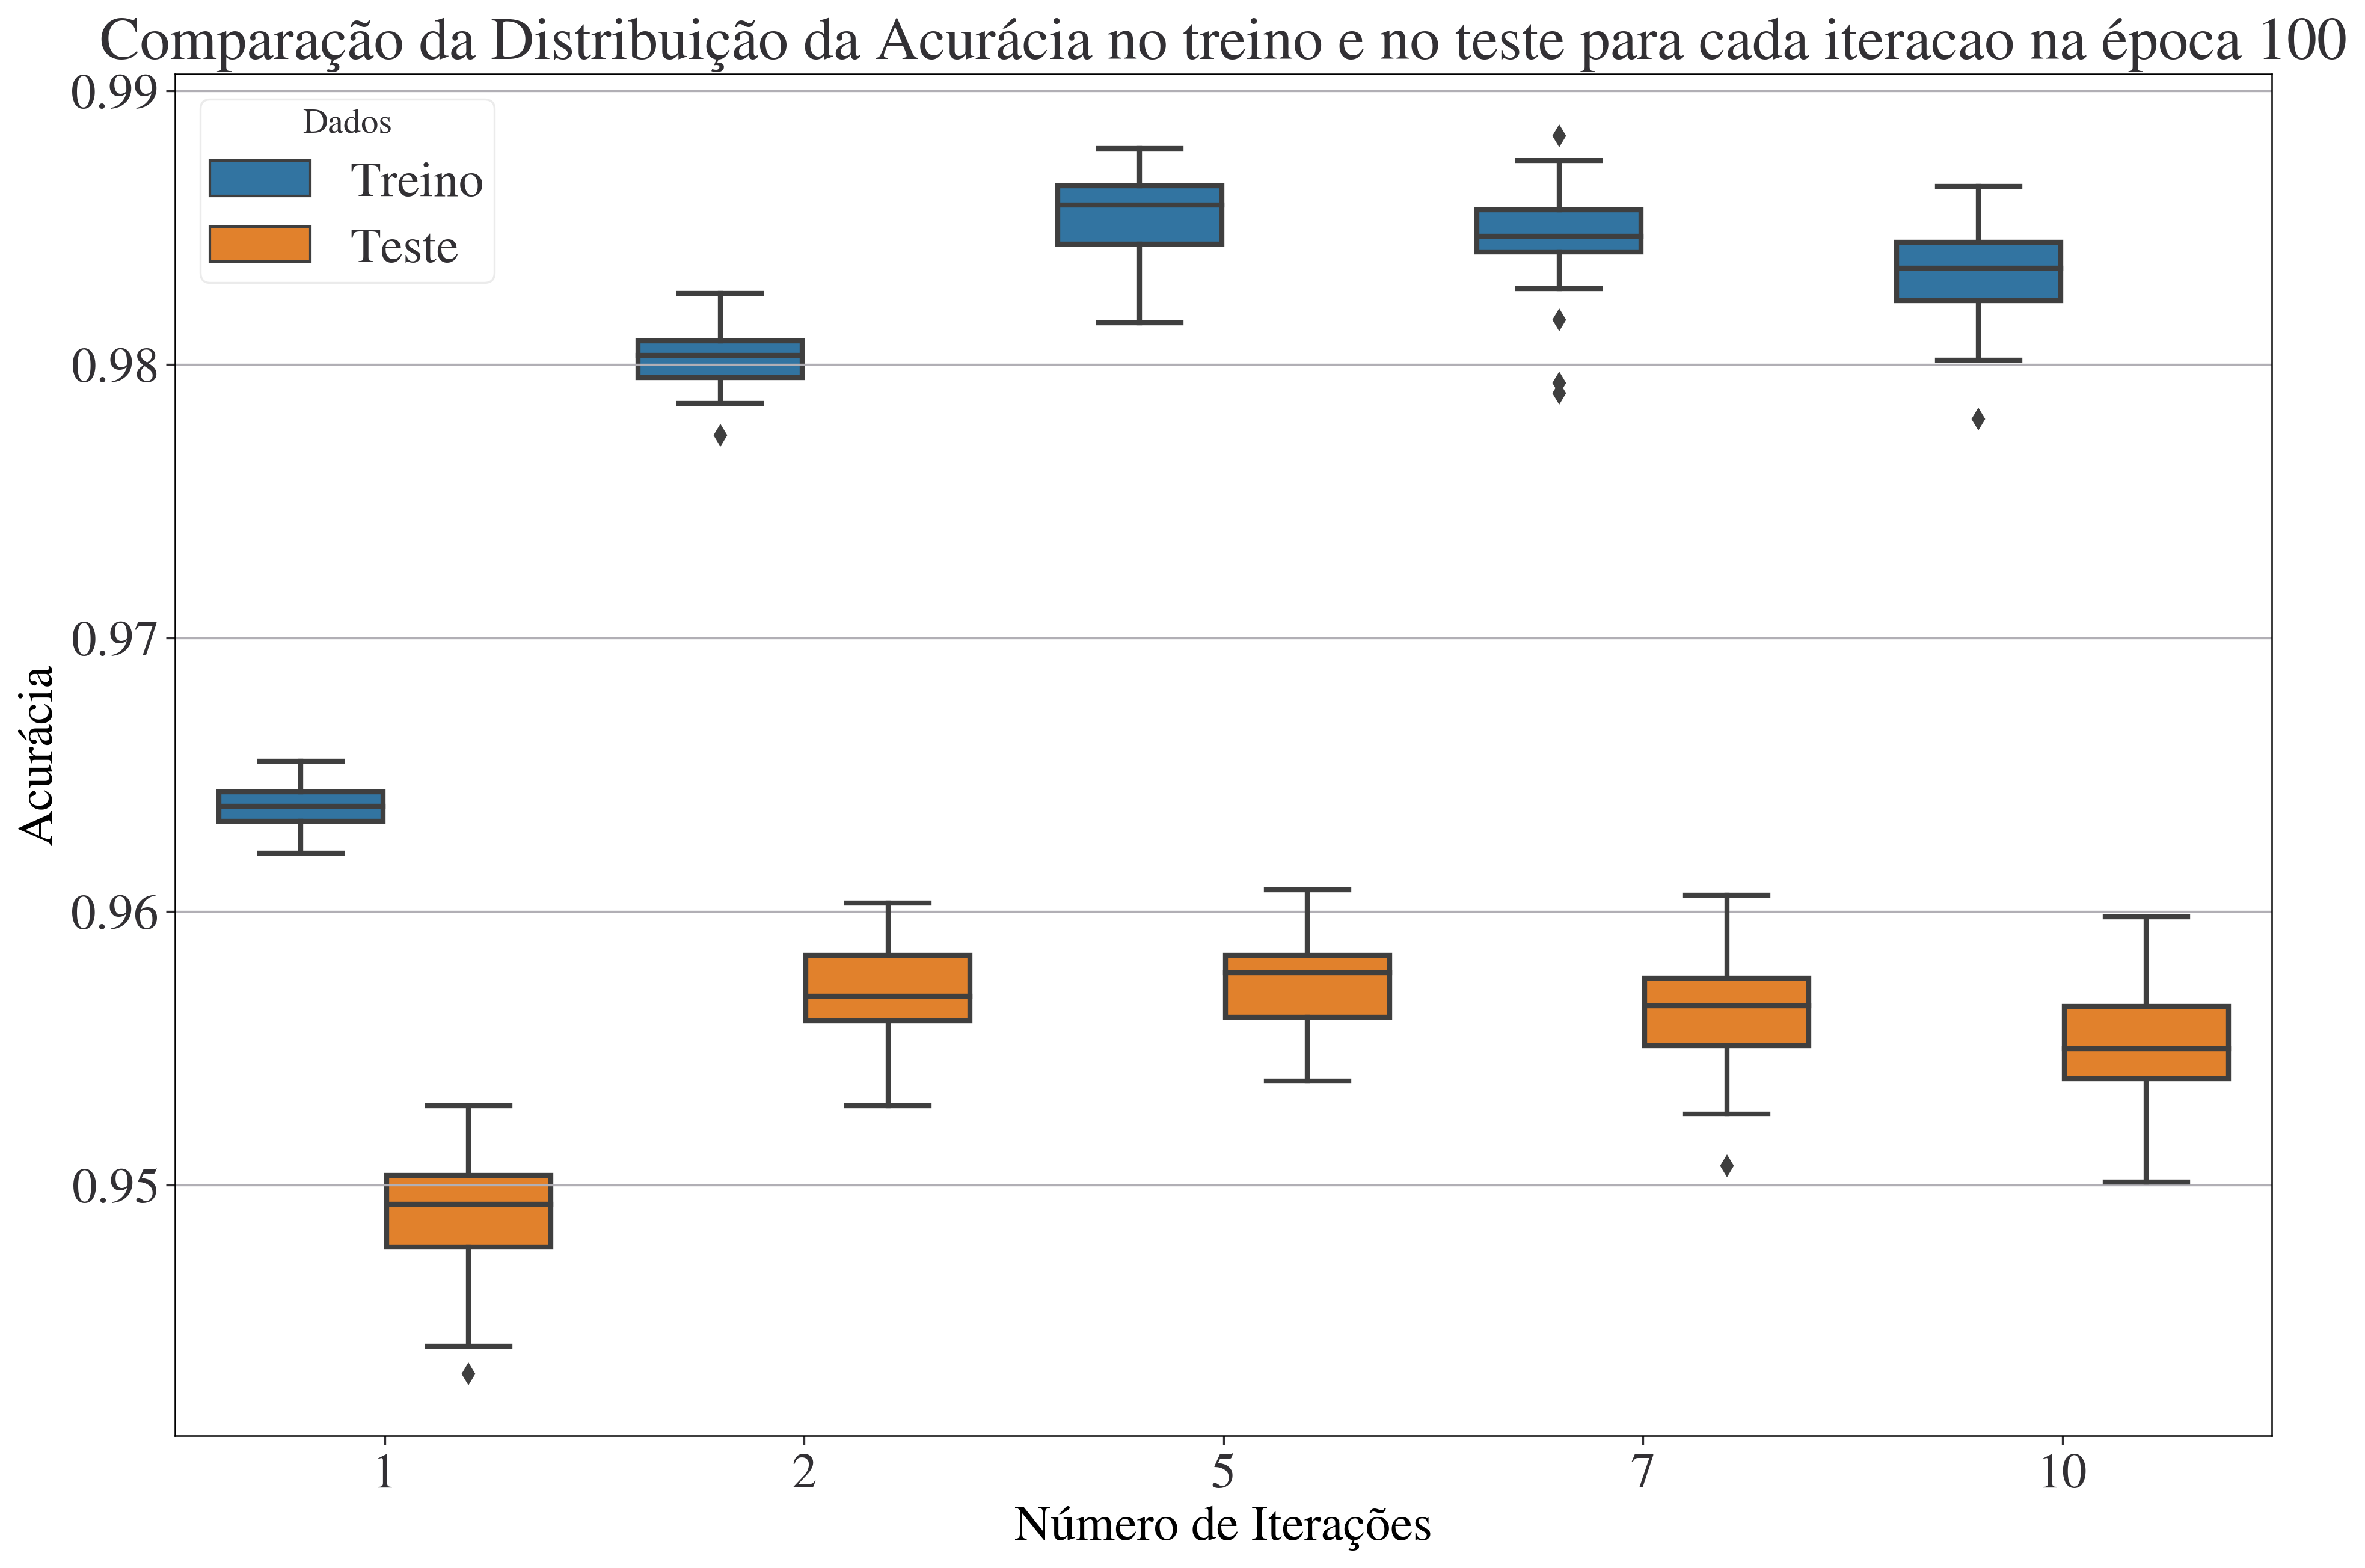

In [45]:
tab_aux1 = acuracia_treino_iteracao[['iteracoes','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_iteracao[['iteracoes','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2], axis=0)

plt.style.use('plot_style.txt')
fig = plt.figure(figsize=(15,10))
sns.boxplot(data = tab_aux, x = 'iteracoes', y = '100', hue = 'Dados', palette = 'tab10')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada iteracao na época 100', fontsize = 24, loc = 'center')
plt.xlabel('Número de Iterações', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.legend(title='Dados', fontsize = 20, loc='upper left')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(axis='y')
plt.show()

fig.savefig('Plots_VariacaoIteracao/acuracia_epoca100.png')

In [29]:
tempo = acuracia_teste_iteracao['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 248464.503 s = 69.018 h


# Variação Eta

In [54]:
caminho = 'TabelasVariacaoEta/'
acuracia_teste_eta  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_eta = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_eta      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_eta     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_eta    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_eta.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [55]:
acuracia_teste_eta = acuracia_teste_eta.append(acuracia_teste_iteracao.query('raio == 49 and iteracoes == 2'))
acuracia_treino_eta = acuracia_treino_eta.append(acuracia_treino_iteracao.query('raio == 49 and iteracoes == 2'))
norma_peso_eta     = norma_peso_eta.append(norma_peso_iteracao.query('raio == 49 and iteracoes == 2'))
perda_teste_eta    = perda_teste_eta.append(perda_teste_iteracao.query('raio == 49 and iteracoes == 2'))
perda_treino_eta   = perda_treino_eta.append(perda_treino_iteracao.query('raio == 49 and iteracoes == 2'))

Dando uma olhada na base

In [32]:
acuracia_teste_eta.head()

metodo  passo_inicial  iteracoes  raio  semente       1       2       3  \
0  FDIPA           0.01          2    49        0  0.3070  0.4565  0.5494   
1  FDIPA           0.01          2    49        1  0.1167  0.1919  0.4038   
2  FDIPA           0.01          2    49        2  0.2929  0.4657  0.5287   
3  FDIPA           0.01          2    49        3  0.1146  0.1146  0.1146   
4  FDIPA           0.01          2    49        4  0.1324  0.2368  0.3002   

        4       5  ...      92      93      94      95      96      97  \
0  0.6068  0.6666  ...  0.9222  0.9230  0.9221  0.9228  0.9228  0.9240   
1  0.5222  0.5497  ...  0.9344  0.9344  0.9350  0.9350  0.9352  0.9347   
2  0.5959  0.6392  ...  0.9251  0.9252  0.9248  0.9256  0.9255  0.9256   
3  0.1146  0.1146  ...  0.9150  0.9158  0.9171  0.9166  0.9174  0.9182   
4  0.3444  0.4169  ...  0.9309  0.9312  0.9318  0.9317  0.9320  0.9319   

       98      99     100        tempo  
0  0.9240  0.9240  0.9236  2413.163610  
1  0.9358  0.9357  0.9361  1535.943518  
2  0.9261  0.9259  0.9268   779.796806  
3  0.9188  0.9200  0.9200  1025.752975  
4  0.9322  0.9321  0.9330   981.459803  

[5 rows x 106 columns]

Função semelhante a definida anteriormente mas agora para o contexto de variação do eta

In [57]:
# Para a seção de variação de eta
def df_to_time_series_eta(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['passo_inicial', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [58]:
acuracia_teste_eta_ts  = df_to_time_series_eta(acuracia_teste_eta, 1, colunas_parametros, colunas_epocas)
acuracia_treino_eta_ts = df_to_time_series_eta(acuracia_treino_eta, 2, colunas_parametros, colunas_epocas)
norma_peso_eta_ts      = df_to_time_series_eta(norma_peso_eta, 3, colunas_parametros, colunas_epocas)
perda_teste_eta_ts     = df_to_time_series_eta(perda_teste_eta, 4, colunas_parametros, colunas_epocas)
perda_treino_eta_ts    = df_to_time_series_eta(perda_treino_eta, 5, colunas_parametros, colunas_epocas)
acuracia_teste_eta_ts.sample(10)

passo_inicial  iteracoes  raio  epoca  acuracia_teste
3128         0.23112          2    49     21          0.9516
4148         1.00000          2    49     28          0.9491
118          1.00000          2    49      1          0.9218
1141         1.00000          2    49      8          0.9426
2375         0.23112          2    49     16          0.9439
3518         0.50000          2    49     24          0.9572
6843         1.00000          2    49     46          0.9444
869          1.00000          2    49      6          0.9379
14266        0.01000          2    49     96          0.9375
7321         0.23112          2    49     49          0.9572

## Métricas ao longo das épocas

In [59]:
plt.style.use('plot_style.txt')

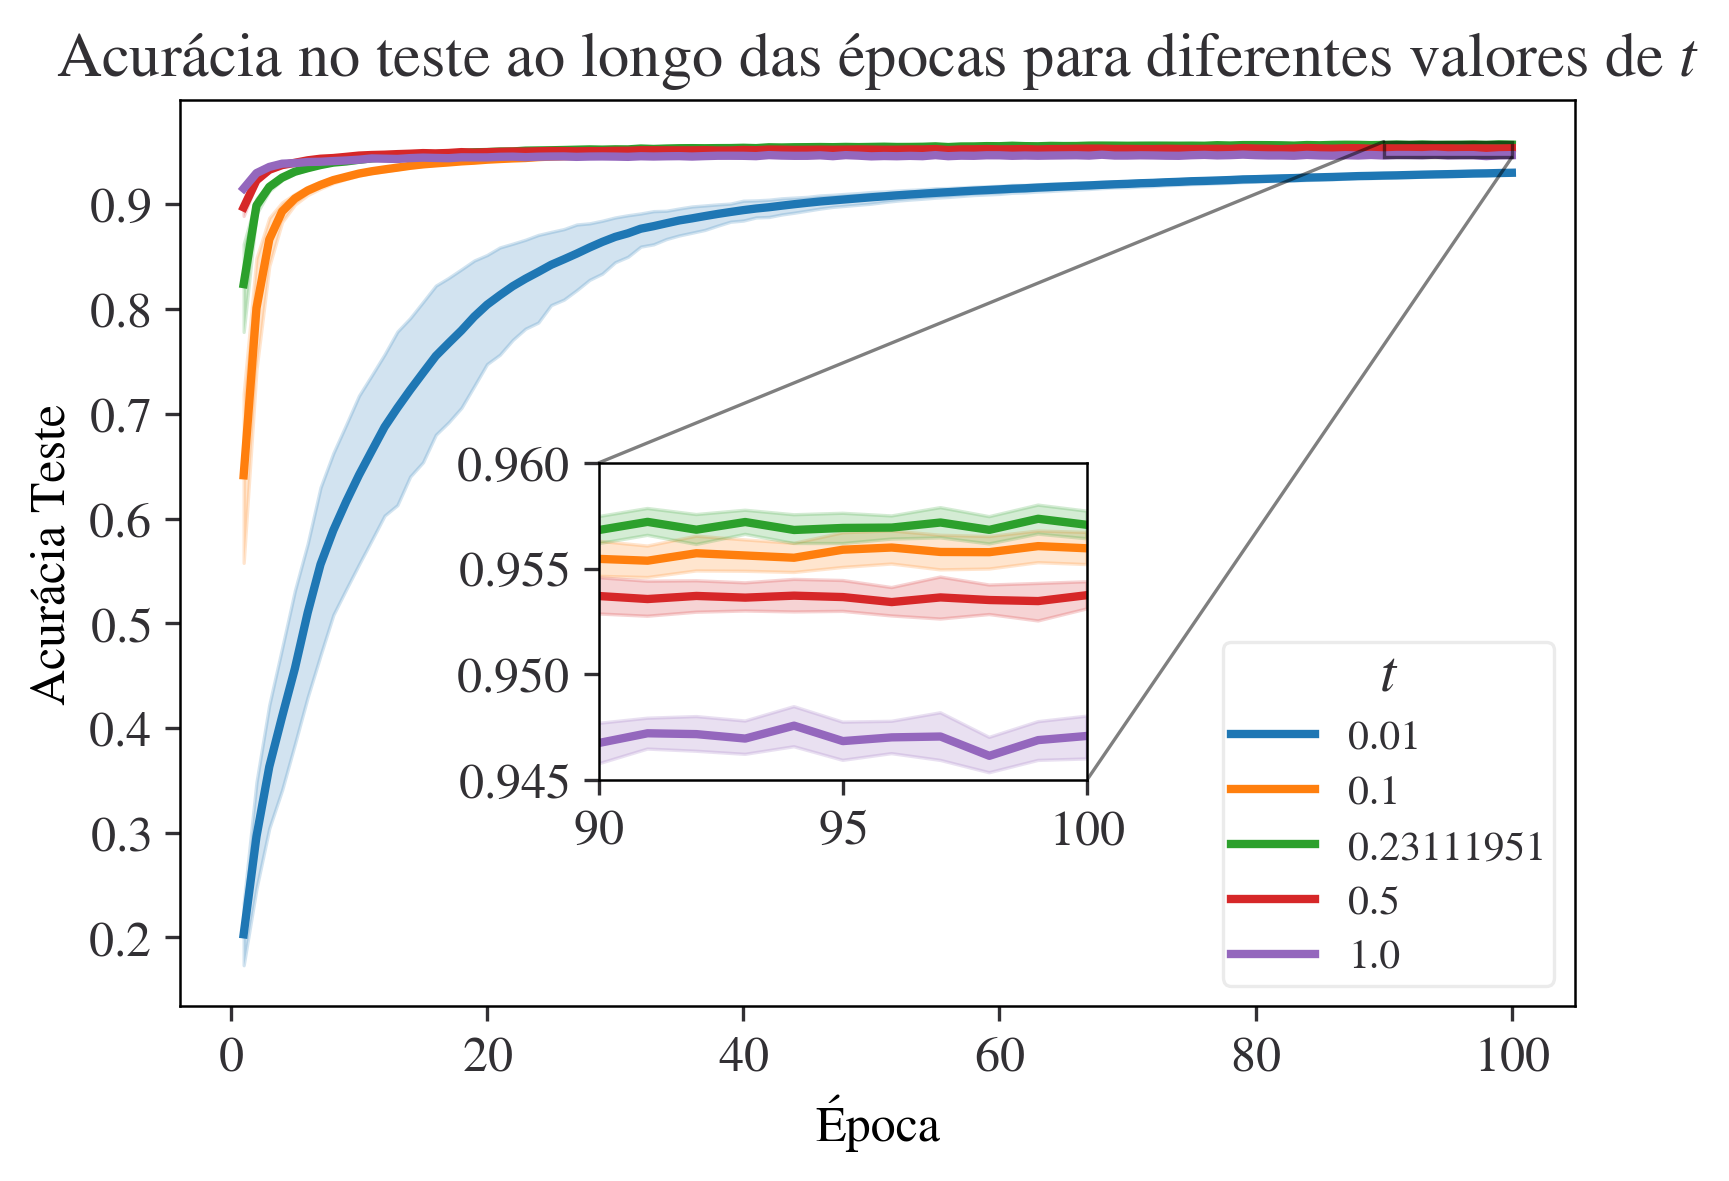

In [60]:
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_eta_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no teste ao longo das épocas para diferentes valores de $t$')
ax.set_xlabel("Época")
ax.set_ylabel("Acurácia Teste")
ax.legend(title = '$t$', loc='lower right')

axins = ax.inset_axes([0.30, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_eta_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 90, 100, 0.945, 0.96
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/acuracia_teste.png')

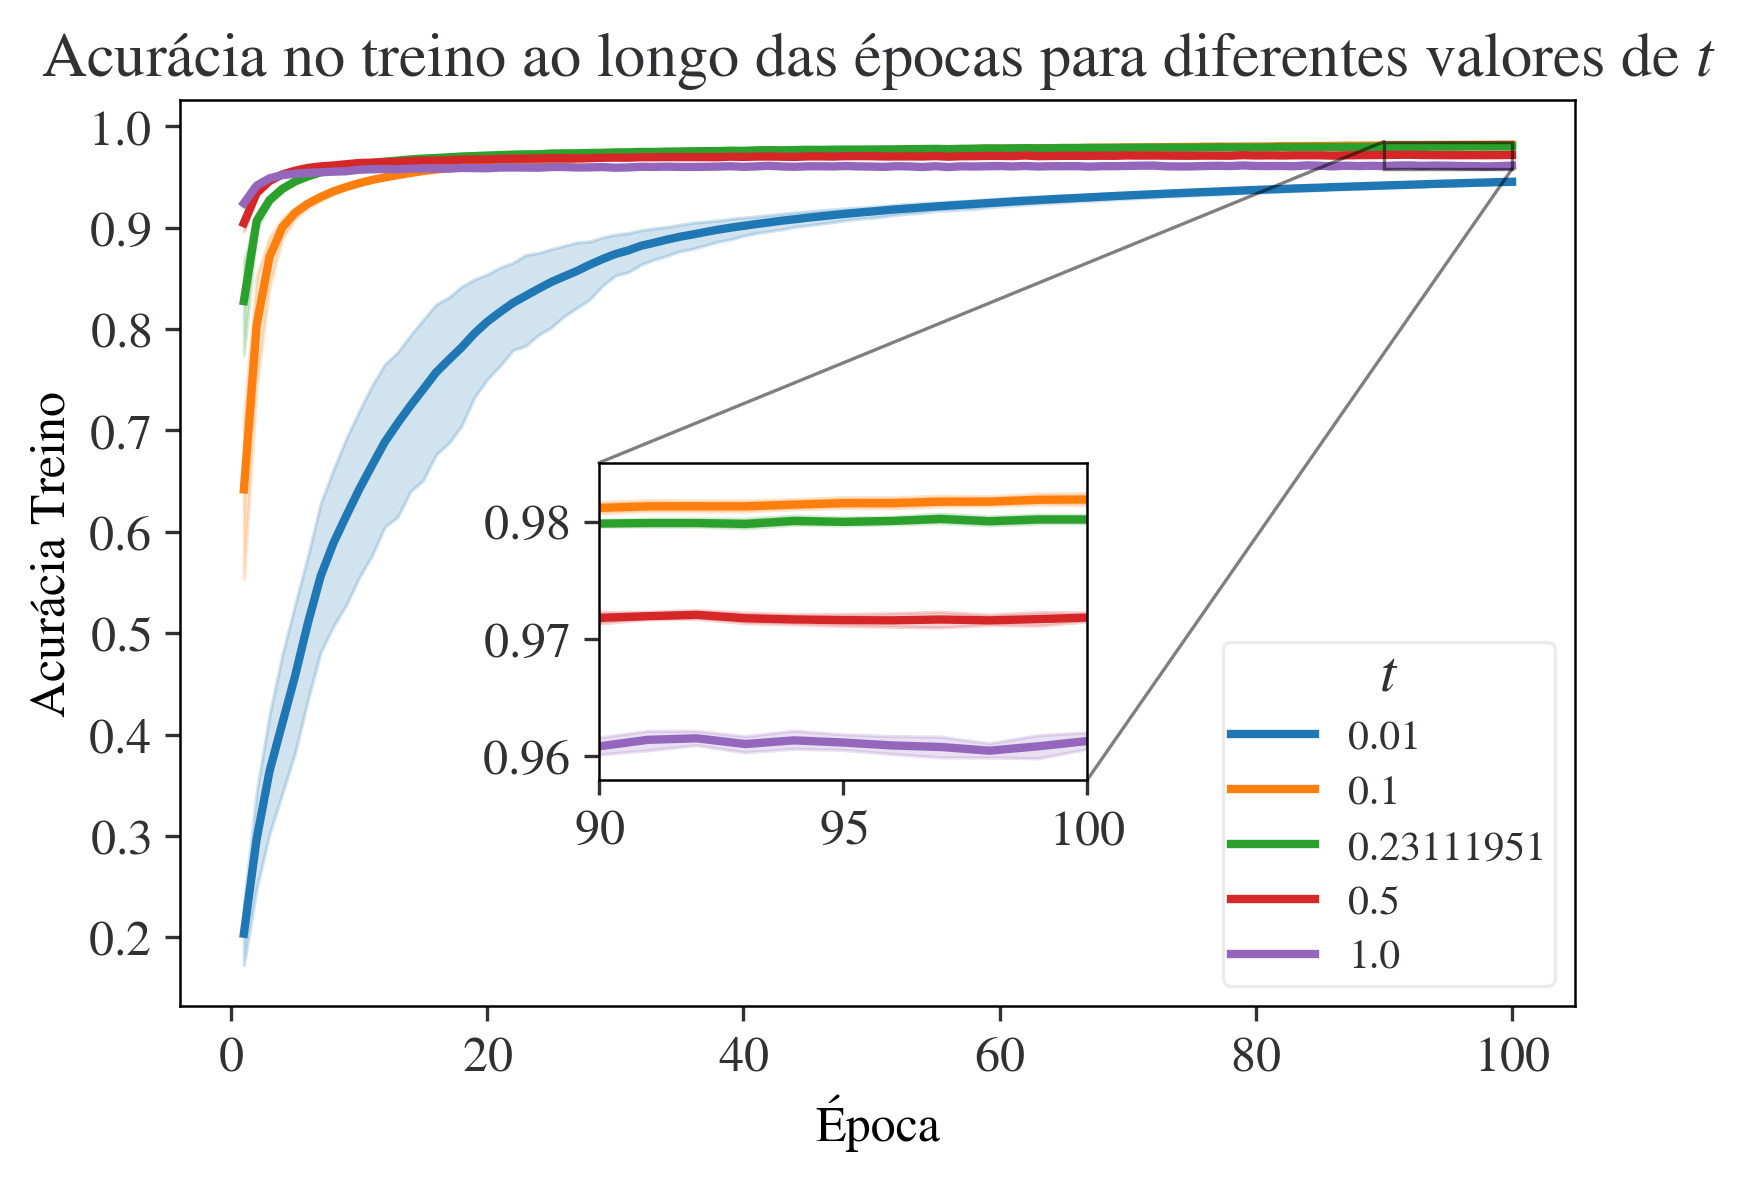

In [61]:
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_treino", hue='passo_inicial', data=acuracia_treino_eta_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no treino ao longo das épocas para diferentes valores de $t$')
ax.set_xlabel("Época")
ax.set_ylabel("Acurácia Treino")
ax.legend(title = '$t$', loc='lower right')

axins = ax.inset_axes([0.30, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_treino", hue='passo_inicial', data=acuracia_treino_eta_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 90, 100, 0.958, 0.985
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/acuracia_treino.png')

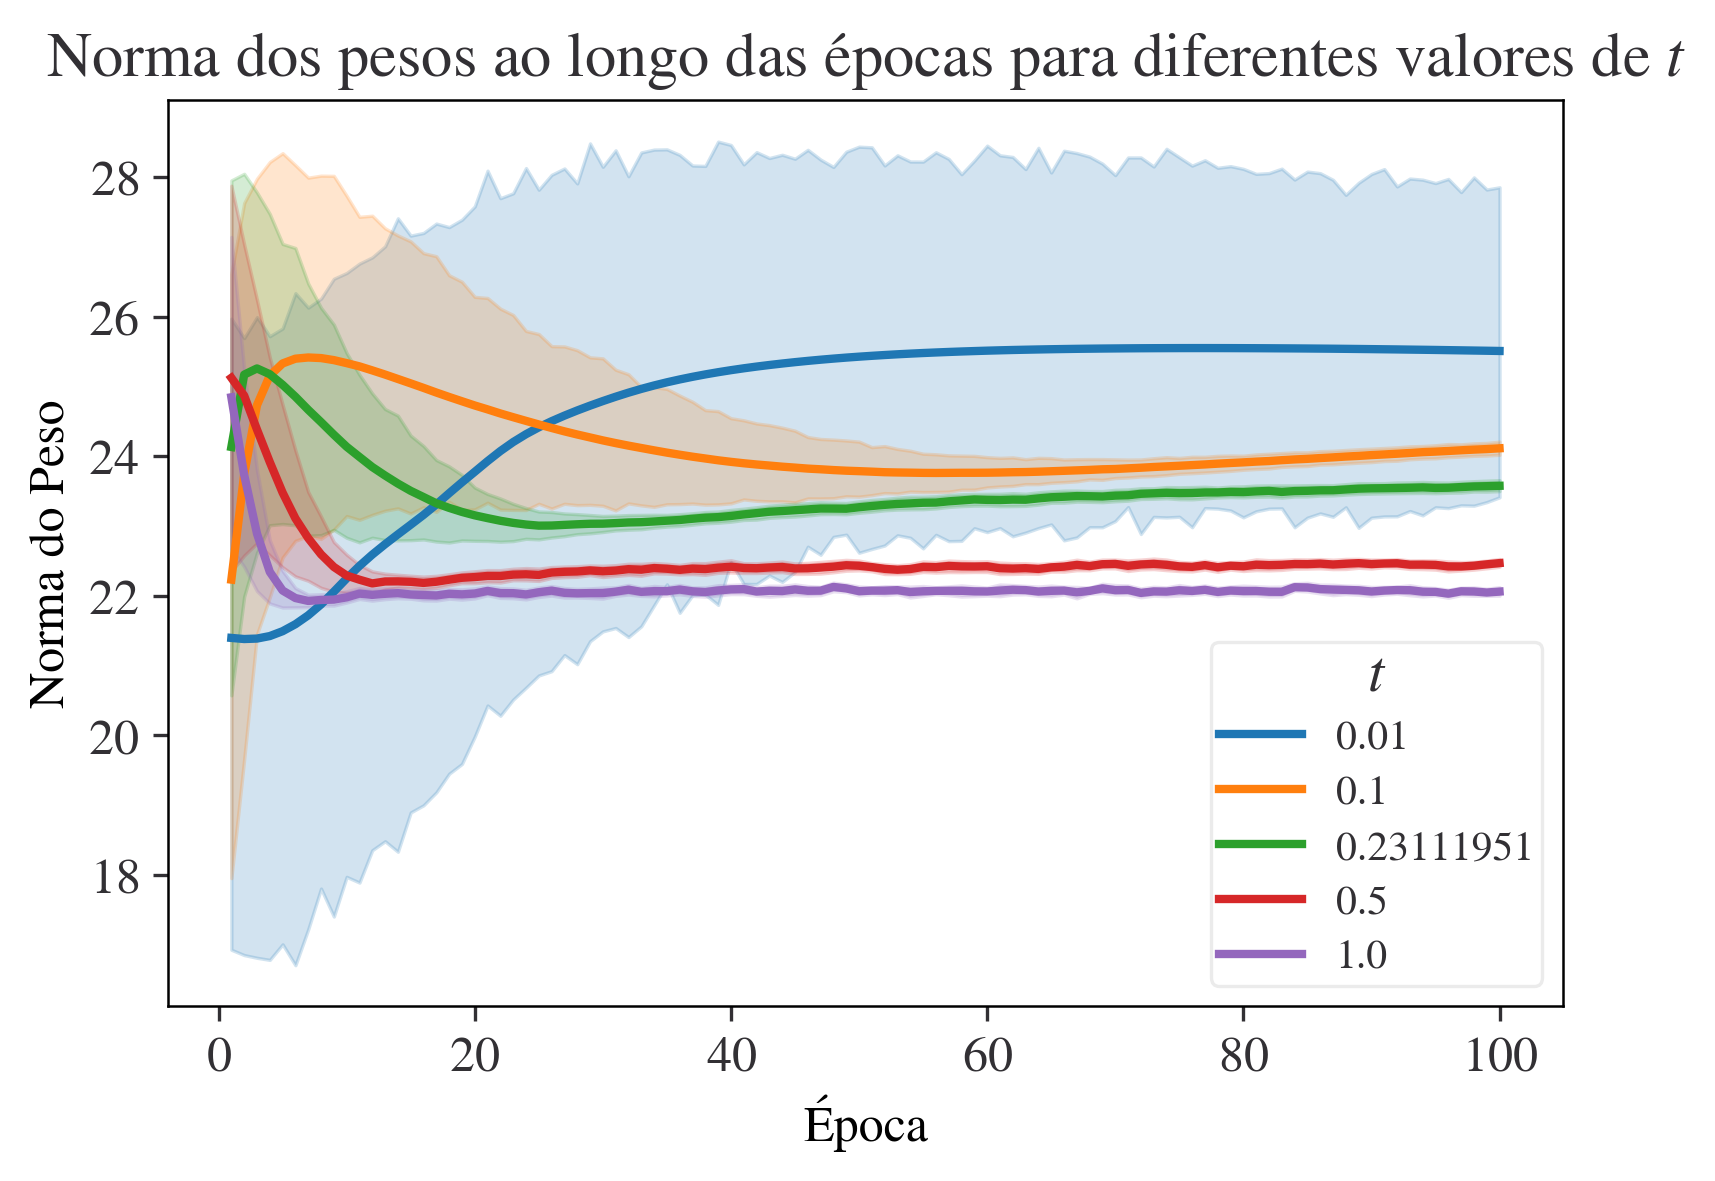

In [62]:
fig = plt.figure()
sns.lineplot(x="epoca", y='norma_peso', hue='passo_inicial', data=norma_peso_eta_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes valores de $t$')
plt.xlabel('Época')
plt.ylabel('Norma do Peso')
plt.legend(title='$t$', loc='lower right')
plt.show()

fig.savefig('Plots_VariacaoEta/norma_peso.png')

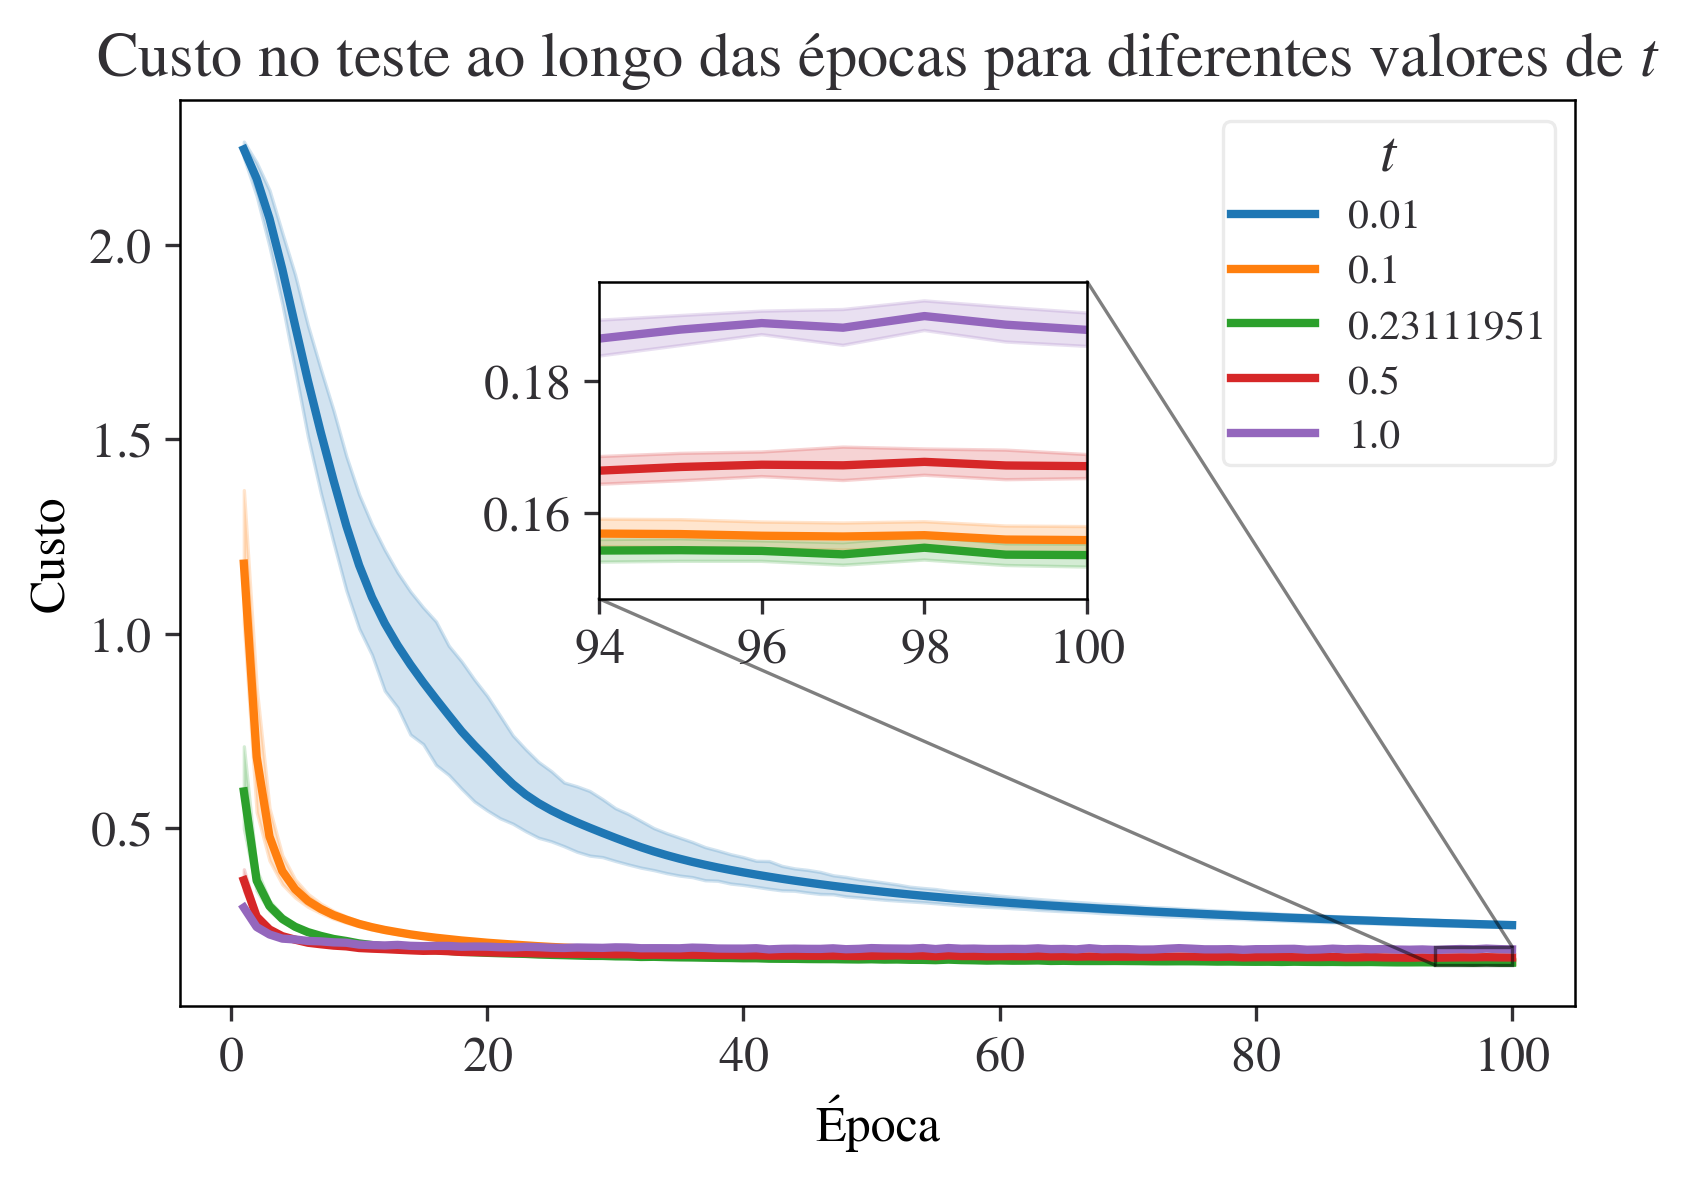

In [63]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_eta_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no teste ao longo das épocas para diferentes valores de $t$')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='$t$', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_eta_ts, palette = 'tab10', ax=axins)

x1, x2, y1, y2 = 94, 100, 0.147, 0.195
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/perda_teste.png')

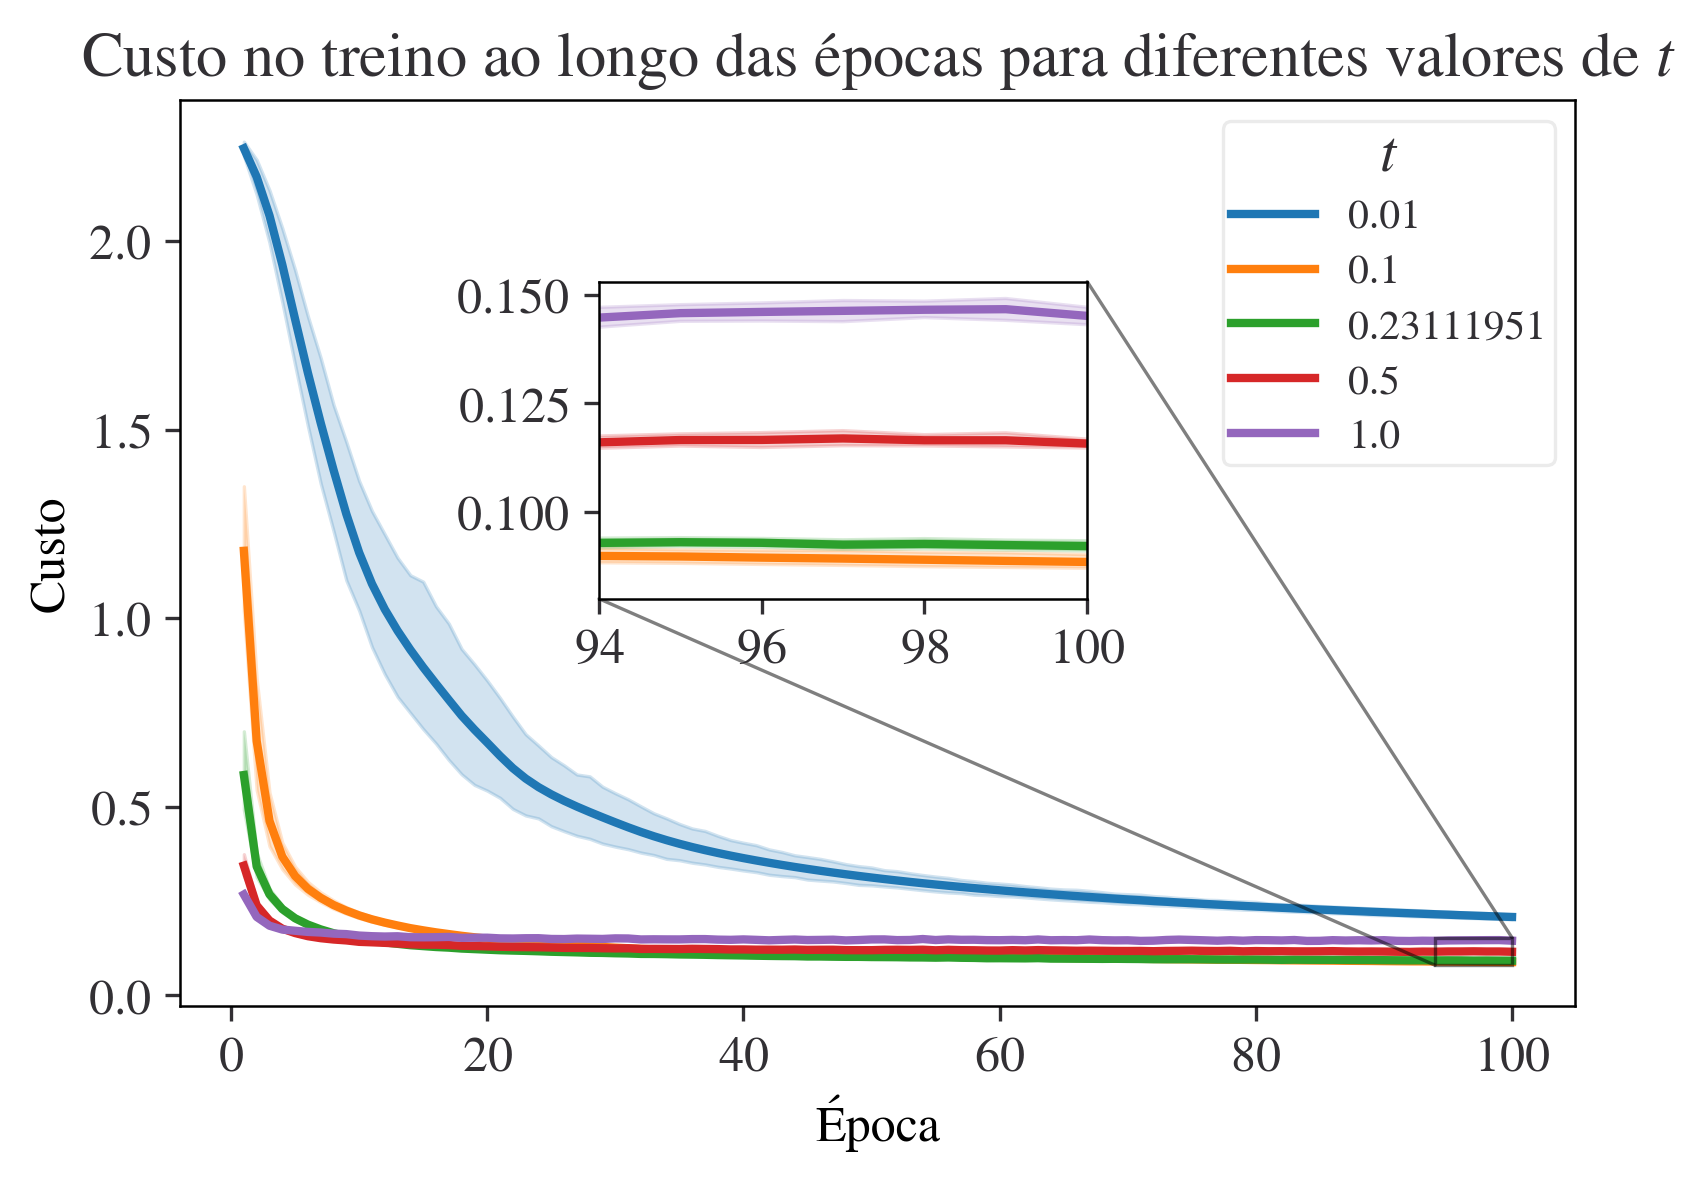

In [64]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_eta_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no treino ao longo das épocas para diferentes valores de $t$')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='$t$', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_eta_ts, palette = 'tab10', ax=axins)

x1, x2, y1, y2 = 94, 100, 0.08, 0.153
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/perda_treino.png')

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [73]:
left  = acuracia_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-73-487264e1c5fd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()


passo_inicial  Acuracia Treino média  Acuracia Treino std  \
0          0.010                  0.945                0.005   
1          0.100                  0.982                0.001   
2          0.231                  0.980                0.001   
3          0.500                  0.972                0.001   
4          1.000                  0.961                0.002   

   Acuracia Teste_mean  Acuracia Teste_std  tempo_mean  tempo_std  
0                0.930               0.005    1064.191    290.034  
1                0.956               0.002     955.705    155.352  
2                0.957               0.002     820.880    303.790  
3                0.954               0.002     833.399     74.778  
4                0.947               0.003     716.599      3.809

In [74]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 passo\_inicial &  Acuracia Treino média &  Acuracia Treino std &  Acuracia Teste\_mean &  Acuracia Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         0.010 &                  0.945 &                0.005 &                0.930 &               0.005 &    1064.191 &    290.034 \\
         0.100 &                  0.982 &                0.001 &                0.956 &               0.002 &     955.705 &    155.352 \\
         0.231 &                  0.980 &                0.001 &                0.957 &               0.002 &     820.880 &    303.790 \\
         0.500 &                  0.972 &                0.001 &                0.954 &               0.002 &     833.399 &     74.778 \\
         1.000 &                  0.961 &                0.002 &                0.947 &               0.003 &     716.599 &      3.809 \\
\bottomrule
\end{tabular}



In [75]:
left  = acuracia_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['max']).reset_index()
rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Acuracia Treino média']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-75-fad08129a3b9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['max'])).reset_index()


passo_inicial  Acuracia Treino média  Acuracia Teste_max  tempo_max
0          0.010                  0.952               0.939   2413.164
1          0.100                  0.984               0.959   1340.738
2          0.231                  0.983               0.960   2015.913
3          0.500                  0.974               0.957   1012.071
4          1.000                  0.966               0.952    728.240

In [76]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 passo\_inicial &  Acuracia Treino média &  Acuracia Teste\_max &  tempo\_max \\
\midrule
         0.010 &                  0.952 &               0.939 &   2413.164 \\
         0.100 &                  0.984 &               0.959 &   1340.738 \\
         0.231 &                  0.983 &               0.960 &   2015.913 \\
         0.500 &                  0.974 &               0.957 &   1012.071 \\
         1.000 &                  0.966 &               0.952 &    728.240 \\
\bottomrule
\end{tabular}



## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [77]:
left  = perda_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-77-20cfa7c3e31f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()


passo_inicial  Custo Treino média  Custo Treino std  Custo Teste_mean  \
0          0.010               0.208             0.020             0.250   
1          0.100               0.088             0.005             0.156   
2          0.231               0.092             0.003             0.154   
3          0.500               0.116             0.003             0.167   
4          1.000               0.145             0.006             0.188   

   Custo Teste_std  tempo_mean  tempo_std  
0            0.018    1064.191    290.034  
1            0.006     955.705    155.352  
2            0.005     820.880    303.790  
3            0.005     833.399     74.778  
4            0.007     716.599      3.809

In [78]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 passo\_inicial &  Custo Treino média &  Custo Treino std &  Custo Teste\_mean &  Custo Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         0.010 &               0.208 &             0.020 &             0.250 &            0.018 &    1064.191 &    290.034 \\
         0.100 &               0.088 &             0.005 &             0.156 &            0.006 &     955.705 &    155.352 \\
         0.231 &               0.092 &             0.003 &             0.154 &            0.005 &     820.880 &    303.790 \\
         0.500 &               0.116 &             0.003 &             0.167 &            0.005 &     833.399 &     74.778 \\
         1.000 &               0.145 &             0.006 &             0.188 &            0.007 &     716.599 &      3.809 \\
\bottomrule
\end{tabular}



In [79]:
left  = perda_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['min']).reset_index()
rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Custo Treino média']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-79-70f83b5e8153>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['min'])).reset_index()


passo_inicial  Custo Treino média  Custo Teste_min  tempo_min
0          0.010               0.185            0.225    779.797
1          0.100               0.081            0.141    768.045
2          0.231               0.086            0.142    720.413
3          0.500               0.109            0.154    718.776
4          1.000               0.131            0.174    711.920

In [80]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 passo\_inicial &  Custo Treino média &  Custo Teste\_min &  tempo\_min \\
\midrule
         0.010 &               0.185 &            0.225 &    779.797 \\
         0.100 &               0.081 &            0.141 &    768.045 \\
         0.231 &               0.086 &            0.142 &    720.413 \\
         0.500 &               0.109 &            0.154 &    718.776 \\
         1.000 &               0.131 &            0.174 &    711.920 \\
\bottomrule
\end{tabular}



## Norma do peso inicial e final (min, max, media, desvio padrão)

In [81]:
tab_norma_peso = norma_peso_eta.groupby(by=['passo_inicial'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,3))
tab_norma_peso

passo_inicial       1                             100                       
                    min     max    mean     std     min     max    mean    std
0         0.010   2.709  42.732  21.398  12.948  18.573  38.613  25.507  6.543
1         0.100   2.665  42.465  22.233  12.502  23.554  24.607  24.113  0.258
2         0.231   6.774  41.954  24.132  10.487  23.056  23.995  23.576  0.220
3         0.500  14.822  40.589  25.122   8.194  22.220  22.845  22.469  0.165
4         1.000  18.137  37.930  24.844   6.323  21.660  22.449  22.061  0.172

In [82]:
print(tab_norma_peso.to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
passo\_inicial & \multicolumn{4}{l}{1} & \multicolumn{4}{l}{100} \\
              &     min &     max &    mean &     std &     min &     max &    mean &    std \\
\midrule
        0.010 &   2.709 &  42.732 &  21.398 &  12.948 &  18.573 &  38.613 &  25.507 &  6.543 \\
        0.100 &   2.665 &  42.465 &  22.233 &  12.502 &  23.554 &  24.607 &  24.113 &  0.258 \\
        0.231 &   6.774 &  41.954 &  24.132 &  10.487 &  23.056 &  23.995 &  23.576 &  0.220 \\
        0.500 &  14.822 &  40.589 &  25.122 &   8.194 &  22.220 &  22.845 &  22.469 &  0.165 \\
        1.000 &  18.137 &  37.930 &  24.844 &   6.323 &  21.660 &  22.449 &  22.061 &  0.172 \\
\bottomrule
\end{tabular}



In [ ]:
# tab_aux1 = acuracia_treino_raio[['raio','semente','100']]
# tab_aux1 = tab_aux1.assign(Dados='Treino')

# tab_aux2 = acuracia_teste_raio[['raio','semente','100']]
# tab_aux2 = tab_aux2.assign(Dados='Teste')
# tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

# plt.style.use('plot_style.txt')
# fig = plt.figure(figsize=(12,8))
# sns.boxplot(data = tab_aux, x = 'raio', y = '100', hue = 'Dados', palette = 'tab10')
# plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada raio na época 100', fontsize = 22, loc = 'center')
# plt.xlabel('Raio', fontsize = 18)
# plt.ylabel('Acurácia', fontsize = 18)
# plt.legend(title='Dados', fontsize = 18, loc='upper left')
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(axis = 'y')
# plt.tight_layout()
# plt.show()

# fig.savefig('Plots_VariacaoRaio/acuracia_epoca100.png')

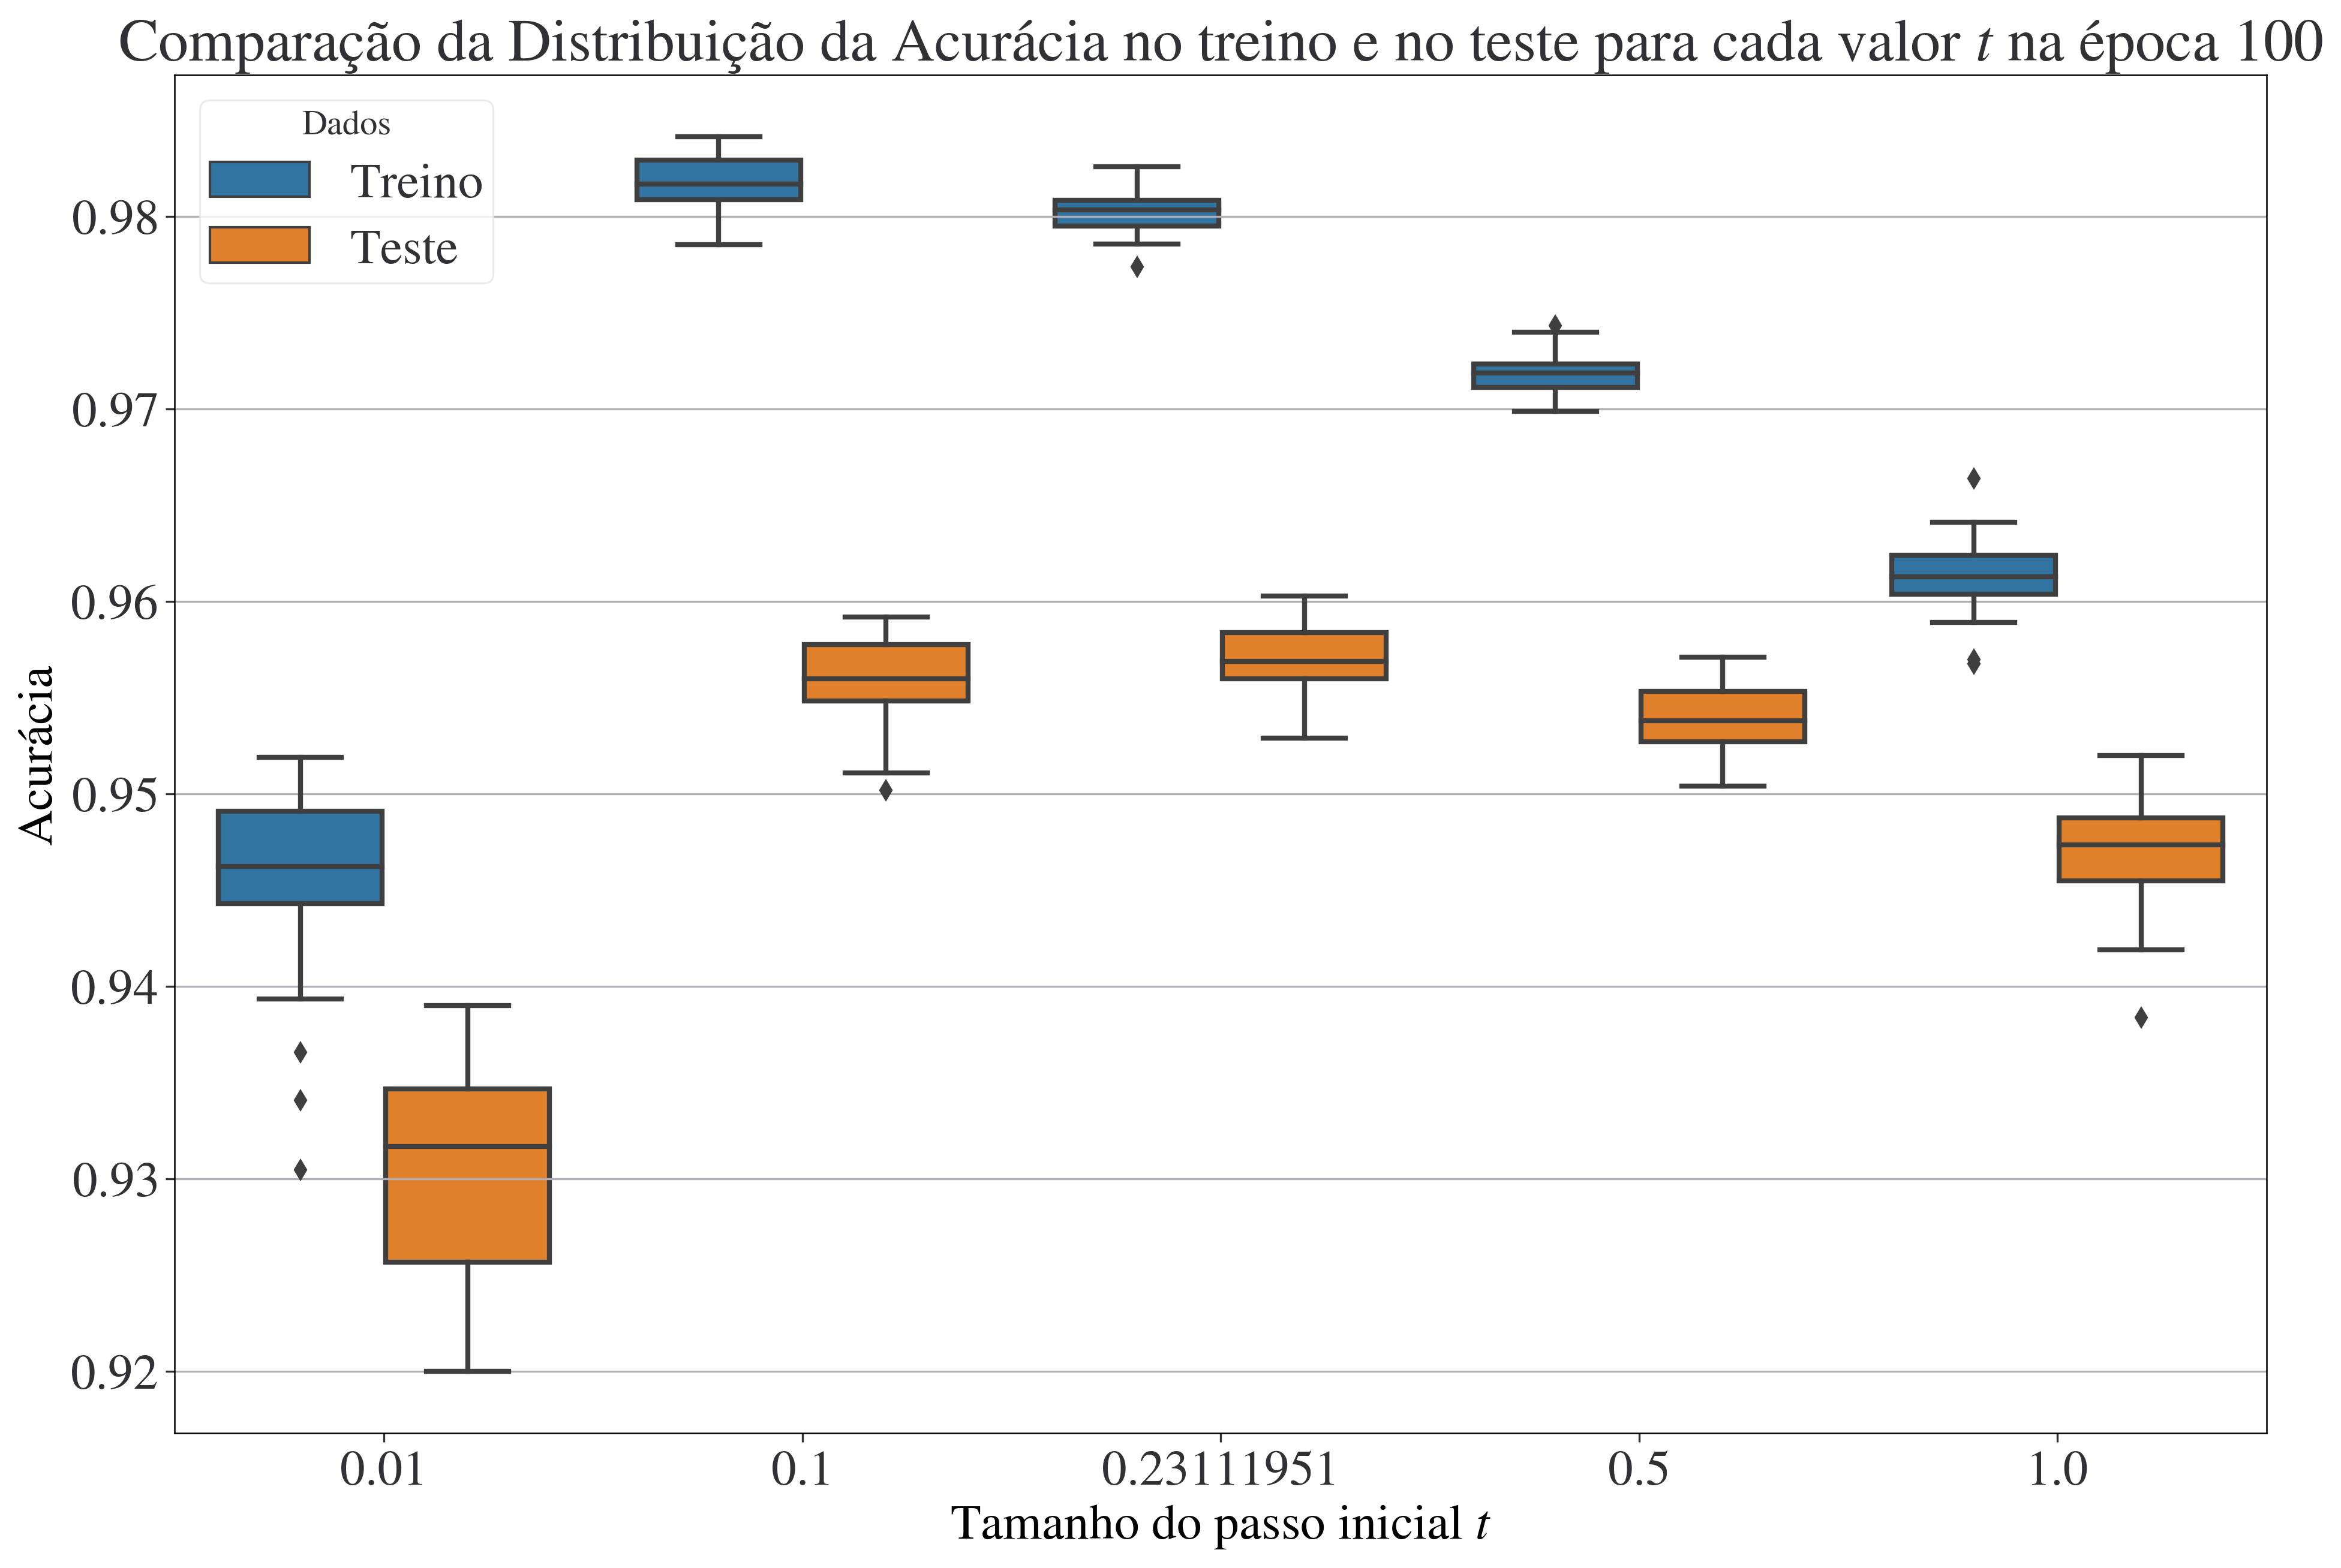

In [71]:
tab_aux1 = acuracia_treino_eta[['passo_inicial','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_eta[['passo_inicial','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.style.use('plot_style.txt')
fig = plt.figure(figsize=(15,10))
sns.boxplot(data = tab_aux, x = 'passo_inicial', y = '100', hue = 'Dados', palette = 'tab10')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada valor $t$ na época 100', fontsize = 24)
plt.xlabel('Tamanho do passo inicial $t$', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.legend(title='Dados', fontsize = 20, loc='upper left')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(axis='y')
plt.show()

fig.savefig('Plots_VariacaoEta/acuracia_epoca100.png')

In [72]:
tempo = acuracia_teste_eta['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 131723.196 s = 36.590 h


# Resultados SGD

In [2]:
caminho = 'TabelasSGD/'
acuracia_teste_sgd  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_sgd = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_sgd      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_sgd     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_sgd    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_sgd.columns
colunas_parametros = colunas[1:3]
colunas_epocas = colunas[3:-2]
colunas_epocas = colunas_epocas.insert(0,'0')
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [3]:
acuracia_teste_sgd = acuracia_teste_sgd[list(colunas_parametros) + list(colunas_epocas) + ['tempo'] ]
acuracia_treino_sgd = acuracia_treino_sgd[list(colunas_parametros) + list(colunas_epocas) + ['tempo']]
norma_peso_sgd = norma_peso_sgd[list(colunas_parametros) + list(colunas_epocas) + ['tempo']]
perda_teste_sgd = perda_teste_sgd[list(colunas_parametros) + list(colunas_epocas) + ['tempo']]   
perda_treino_sgd = perda_treino_sgd[list(colunas_parametros) + list(colunas_epocas) + ['tempo']]  

In [25]:
acuracia_teste_sgd.head()

passo_inicial  semente       0       1       2       3       4       5  \
0           0.01        0  0.1059  0.1752  0.2158  0.2557  0.2978  0.3363   
1           0.01        1  0.1028  0.1533  0.2108  0.2644  0.3135  0.3564   
2           0.01        2  0.1131  0.1399  0.2038  0.2605  0.3052  0.3484   
3           0.01        3  0.1000  0.1463  0.2052  0.2606  0.3143  0.3546   
4           0.01        4  0.0866  0.1784  0.2368  0.2829  0.3219  0.3564   

        6       7  ...      92      93      94      95      96      97  \
0  0.3685  0.3977  ...  0.7849  0.7857  0.7864  0.7869  0.7884  0.7888   
1  0.3893  0.4189  ...  0.7737  0.7741  0.7749  0.7767  0.7769  0.7773   
2  0.3796  0.4097  ...  0.7791  0.7799  0.7810  0.7815  0.7830  0.7837   
3  0.3928  0.4193  ...  0.7831  0.7839  0.7843  0.7854  0.7857  0.7863   
4  0.3856  0.4118  ...  0.7820  0.7831  0.7851  0.7856  0.7865  0.7867   

       98      99     100       tempo  
0  0.7890  0.7899  0.7903  305.090078  
1  0.7781  0.7788  0.7792  336.458118  
2  0.7840  0.7858  0.7860  349.477899  
3  0.7874  0.7882  0.7891  253.496363  
4  0.7872  0.7879  0.7889  264.426894  

[5 rows x 104 columns]

Função para transformar em serie temporal

In [4]:
# Para a seção de variação de passo_inicial
def df_to_time_series_sgd(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['passo_inicial', 'epoca'])
    
    return time_series

In [5]:
acuracia_teste_sgd_ts  = df_to_time_series_sgd(acuracia_teste_sgd, 1, colunas_parametros, colunas_epocas)
acuracia_treino_sgd_ts = df_to_time_series_sgd(acuracia_treino_sgd, 2, colunas_parametros, colunas_epocas)
norma_peso_sgd_ts      = df_to_time_series_sgd(norma_peso_sgd, 3, colunas_parametros, colunas_epocas)
perda_teste_sgd_ts     = df_to_time_series_sgd(perda_teste_sgd, 4, colunas_parametros, colunas_epocas)
perda_treino_sgd_ts    = df_to_time_series_sgd(perda_treino_sgd, 5, colunas_parametros, colunas_epocas)
acuracia_teste_sgd_ts.sample(10)

passo_inicial  semente  epoca  acuracia_teste
2451        0.231120       21     13          0.8505
7692        0.500000       12     42          0.9078
16377       1.000000       27     90          0.9037
5608        0.010000       28     31          0.6435
9058        0.100000       28     50          0.8686
8156        0.100000       26     45          0.8732
12393       1.000000        3     68          0.9089
11231       0.102882       11     62          0.8725
17779       0.500000       19     98          0.9062
11447       0.231120       17     63          0.8946

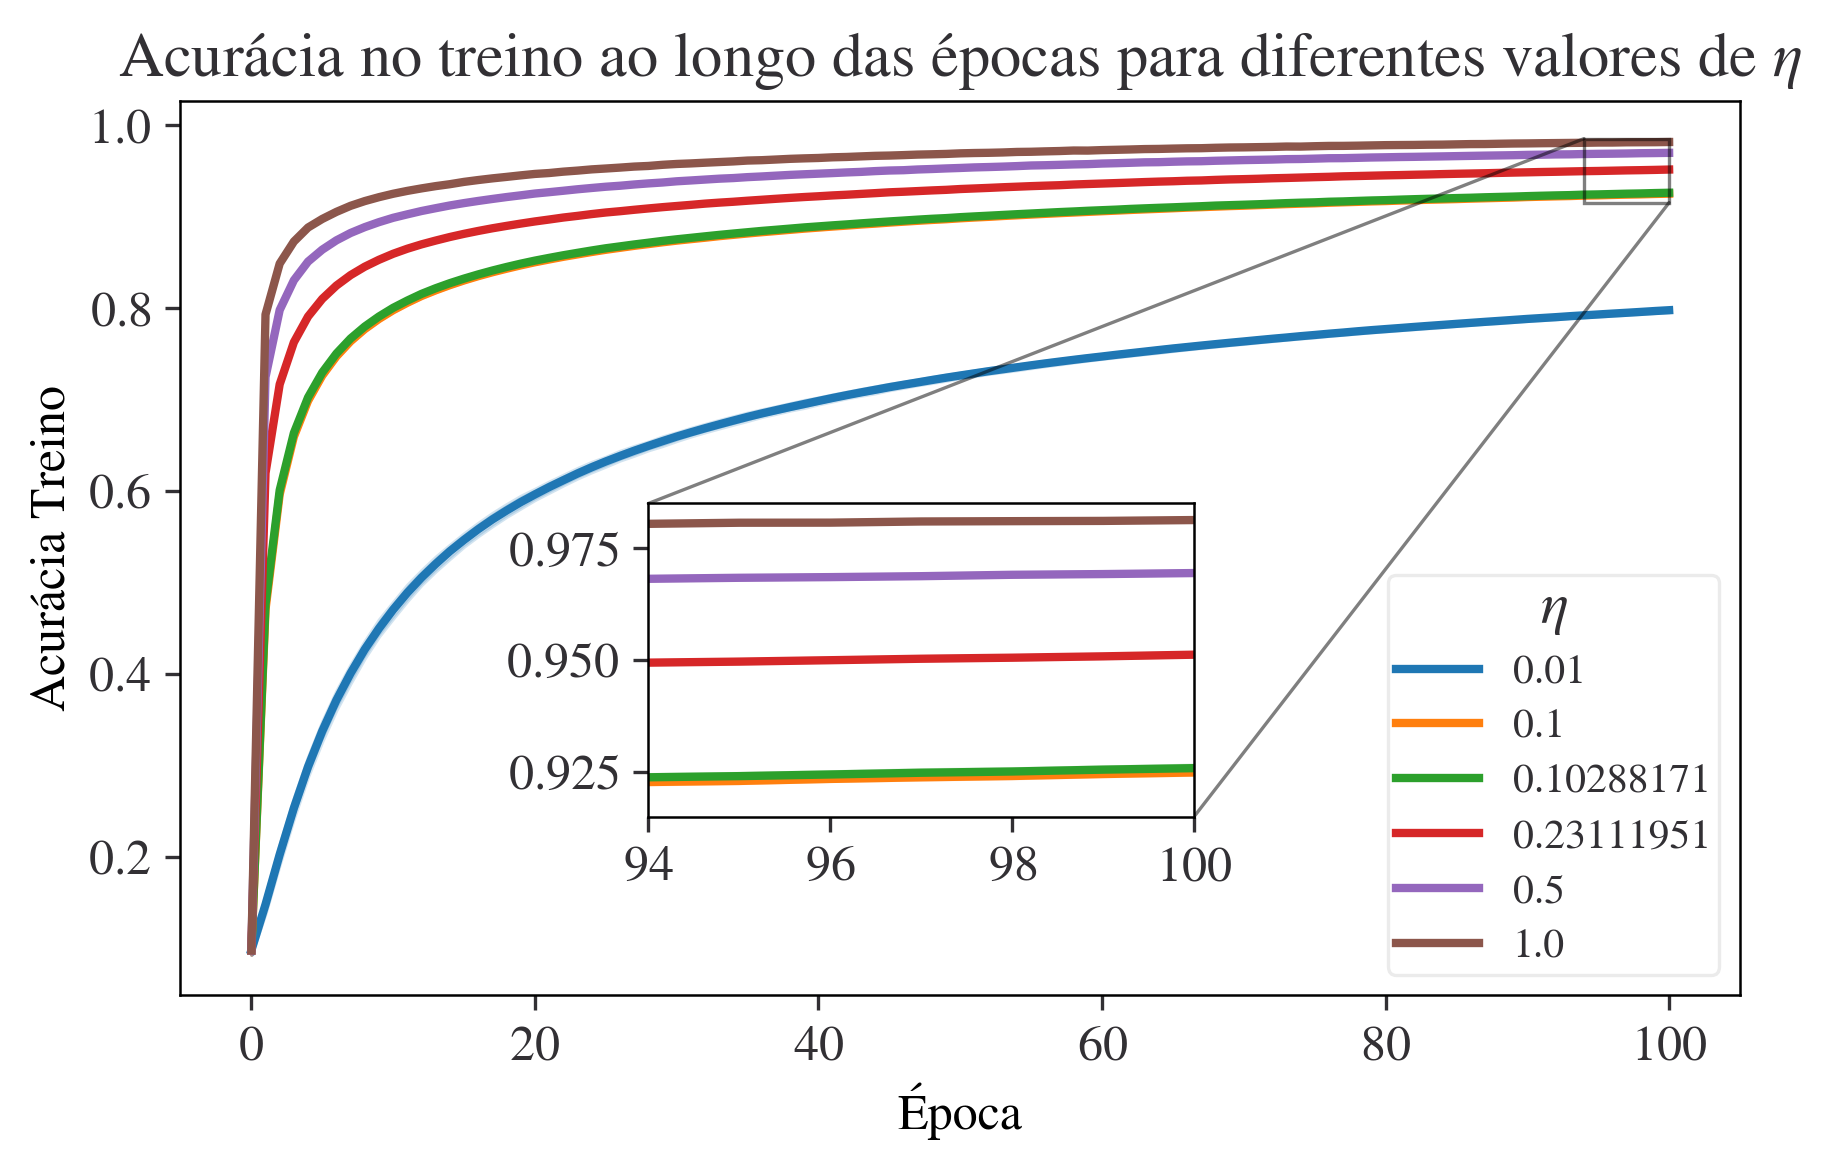

In [66]:
plt.style.use('plot_style.txt')
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_treino", hue='passo_inicial', data=acuracia_treino_sgd_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no treino ao longo das épocas para diferentes valores de $\eta$')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia Treino')
ax.legend(title='$\eta$',loc = 'lower right')
plt.tight_layout()

# ax.legend(title='$\eta$', loc = 'lower right')

axins = ax.inset_axes([0.30, 0.20, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'acuracia_treino', hue='passo_inicial', data=acuracia_treino_sgd_ts, palette = 'tab10', ax=axins)

x1, x2, y1, y2 = 94, 100, 0.915, 0.985
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

fig.savefig('Plots_SGD/acuracia_treino.png')

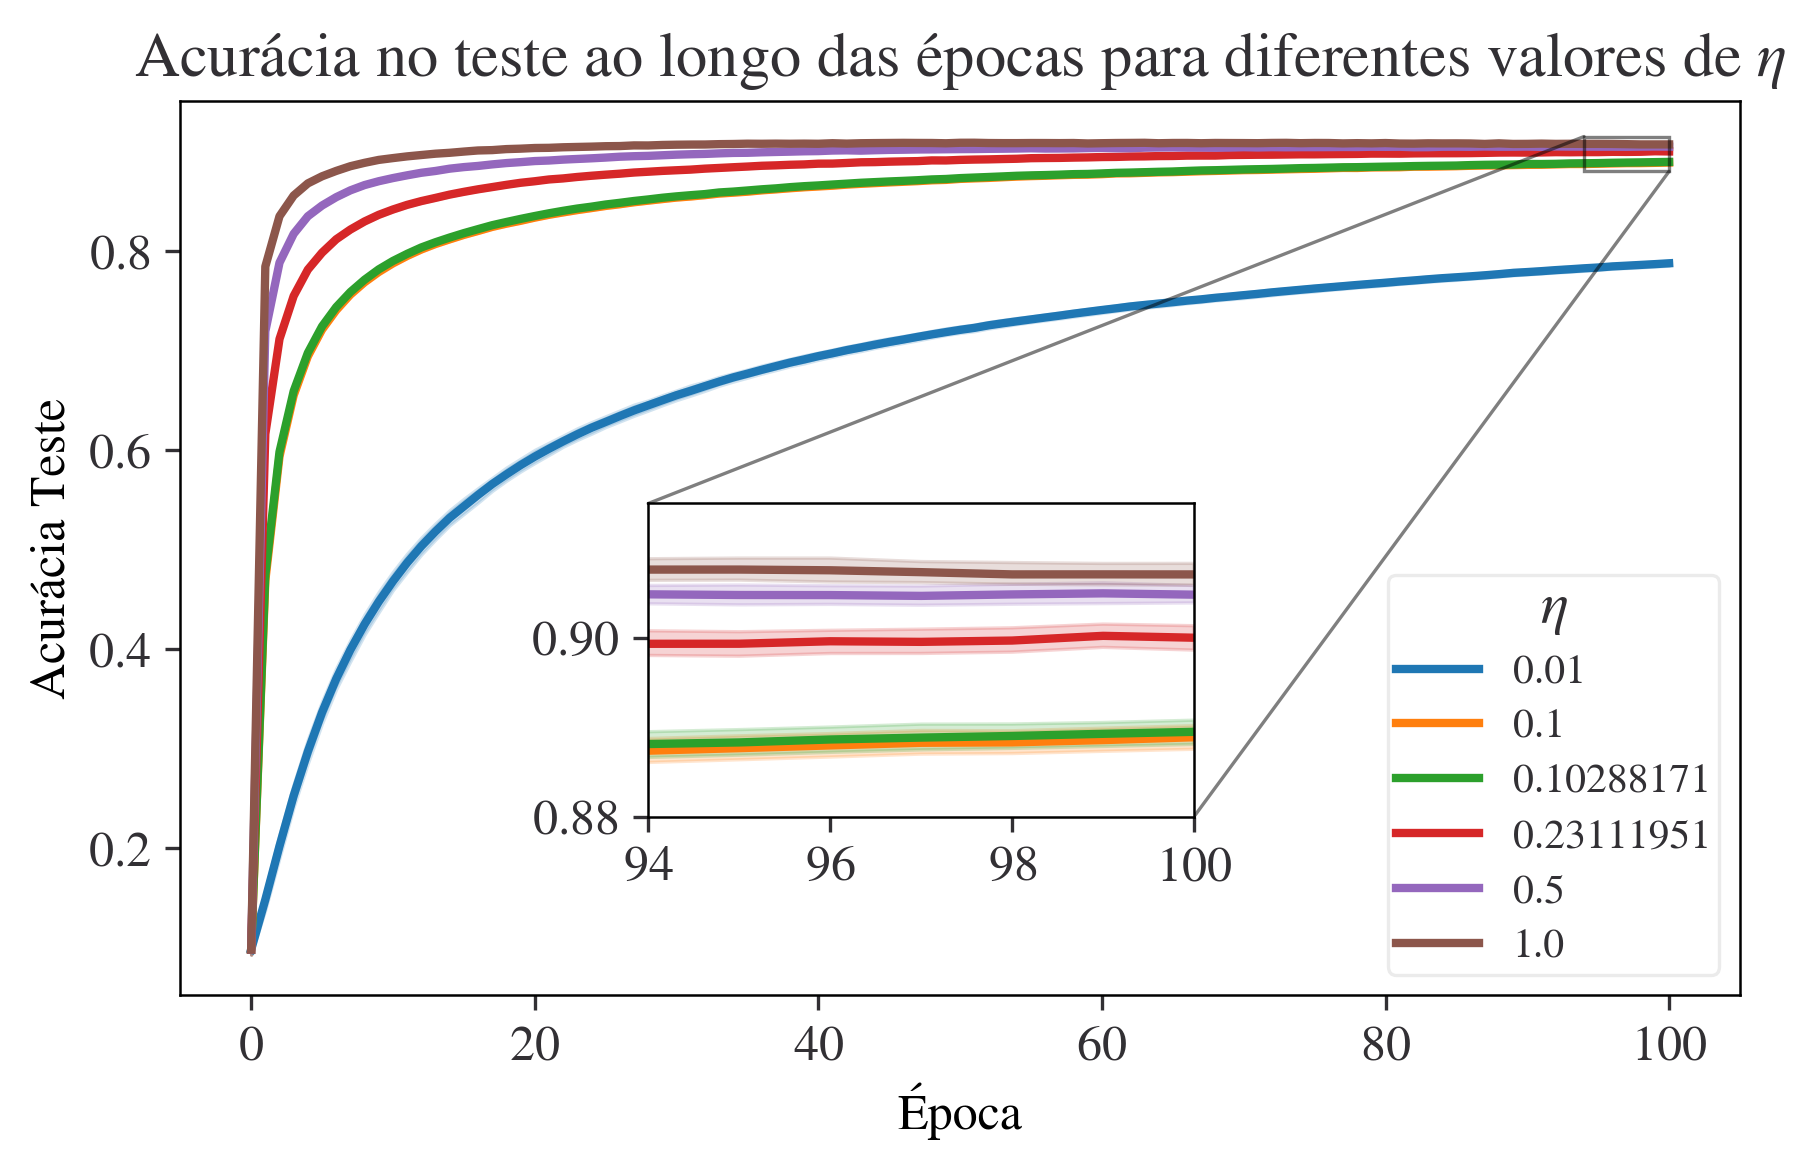

In [62]:
fig, ax = plt.subplots()
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_sgd_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no teste ao longo das épocas para diferentes valores de $\eta$')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia Teste')
ax.legend(title='$\eta$', loc = 'lower right')
plt.tight_layout()

axins = ax.inset_axes([0.30, 0.20, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'acuracia_teste', hue='passo_inicial', data=acuracia_teste_sgd_ts, palette = 'tab10', ax=axins)

x1, x2, y1, y2 = 94, 100, 0.88, 0.915
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

fig.savefig('Plots_SGD/acuracia_teste.png')

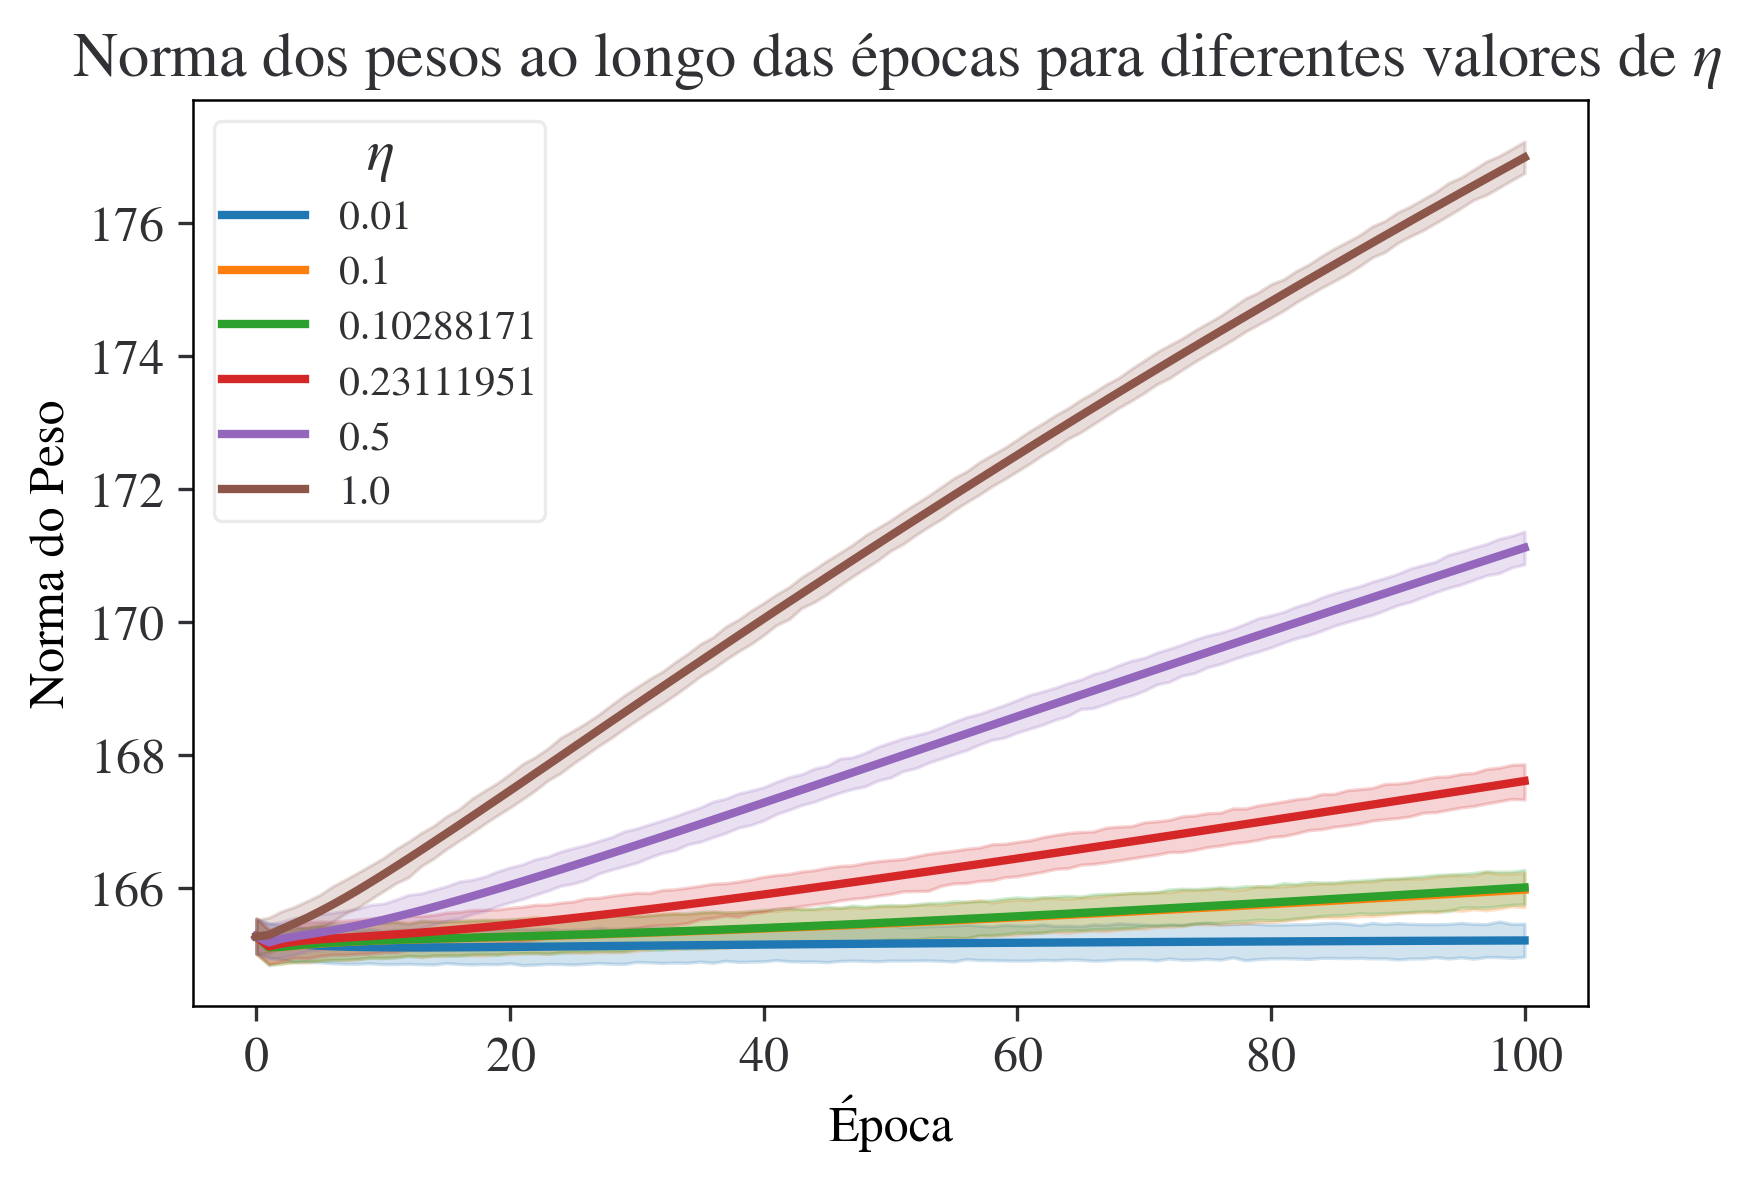

In [68]:
fig, ax = plt.subplots()
sns.lineplot(x='epoca', y='norma_peso', hue='passo_inicial', data=norma_peso_sgd_ts, palette = 'tab10', ax=ax)
ax.set_title(' Norma dos pesos ao longo das épocas para diferentes valores de $\eta$ ')
            #  'Acurácia no teste ao longo das épocas para diferentes sgds'
ax.set_xlabel('Época')
ax.set_ylabel('Norma do Peso')
ax.legend(title = '$\eta$') #,loc='lower right')


# axins = ax.inset_axes([0.3, 0.25, 0.35, 0.35])
# sns.lineplot(x='epoca', y='norma_peso', hue='passo_inicial', data=norma_peso_sgd_ts, palette = 'tab10', ax=axins)
# axins.legend_.remove()
# x1, x2, y1, y2 = 1, 5, -2, 60
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xlabel('')
# axins.set_ylabel('')
# ax.indicate_inset_zoom(axins, edgecolor='black')

plt.show()

fig.savefig('Plots_SGD/norma_peso.png')

In [8]:
plt.style.use('plot_style.txt')

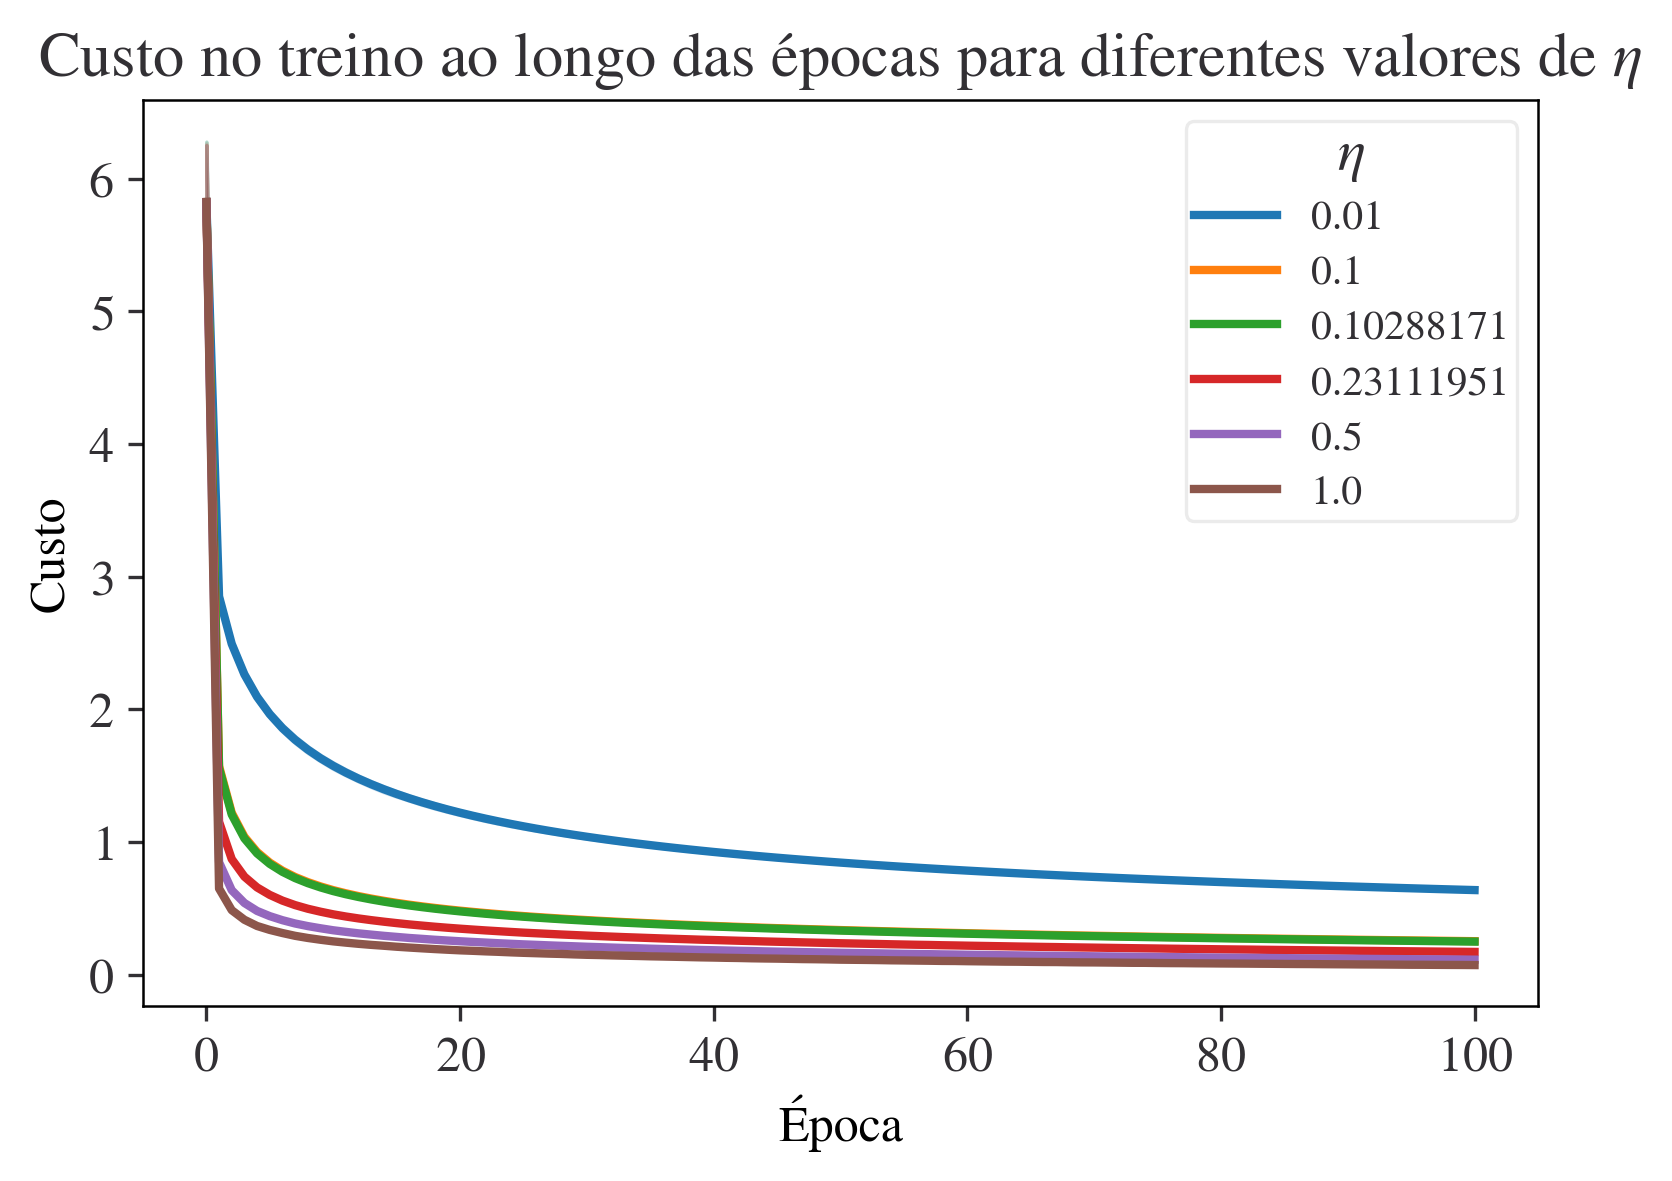

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_sgd_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no treino ao longo das épocas para diferentes valores de $\eta$')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='$\eta$', loc='upper right')

# axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
# sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_eta_ts, palette = 'tab10', ax=axins)

# x1, x2, y1, y2 = 94, 100, 0.08, 0.153
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xlabel('')
# axins.set_ylabel('')
# axins.legend_.remove()
# ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_SGD/perda_treino.png')

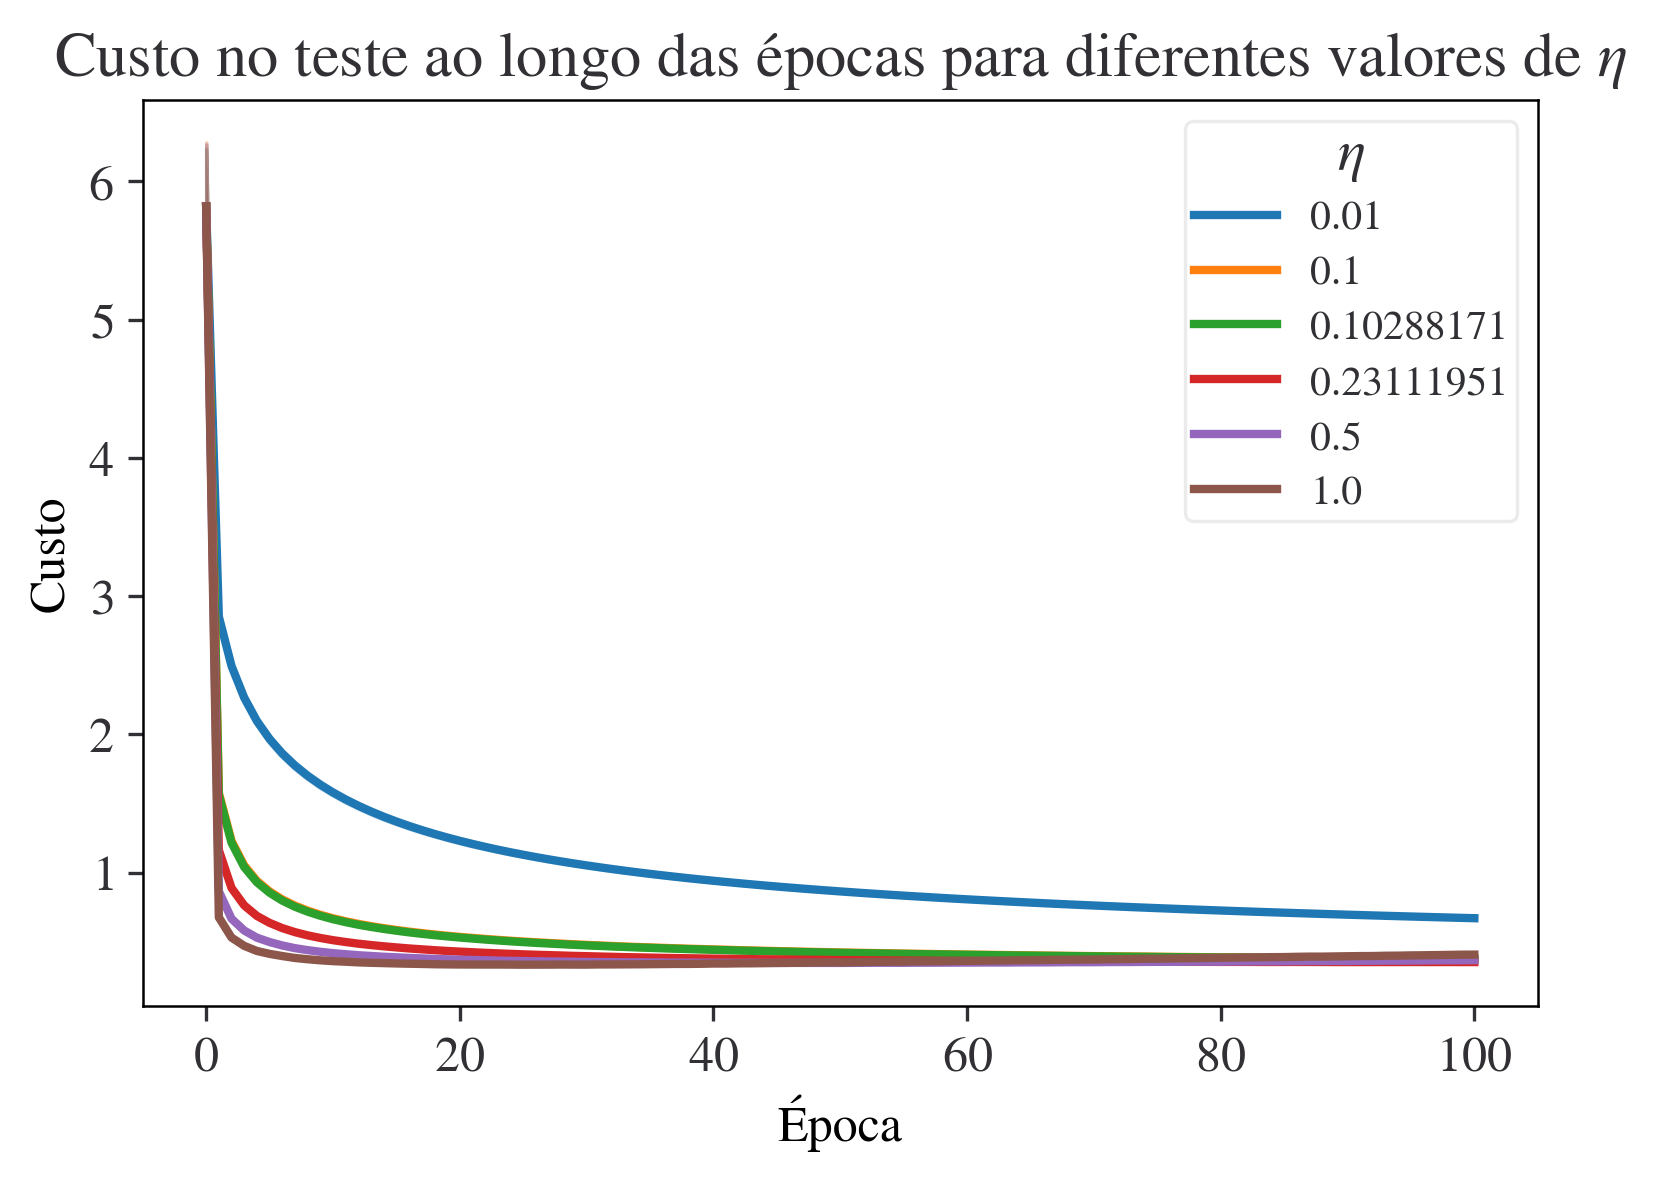

In [10]:
fig, ax = plt.subplots()
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_sgd_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no teste ao longo das épocas para diferentes valores de $\eta$')
ax.set_xlabel('Época')
ax.set_ylabel('Custo')
ax.legend(title='$\eta$', loc='upper right')

# axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
# sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_eta_ts, palette = 'tab10', ax=axins)

# x1, x2, y1, y2 = 94, 100, 0.08, 0.153
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xlabel('')
# axins.set_ylabel('')
# axins.legend_.remove()
# ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_SGD/perda_teste.png')

## Acuracia Treino x acuracia teste (média, desvio padrão, maximo e tempo)

In [79]:
left  = acuracia_treino_sgd.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-79-bb59ee7d93bc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()


passo_inicial  Acuracia Treino média  Acuracia Treino std  \
0          0.010                  0.797                0.006   
1          0.100                  0.925                0.002   
2          0.103                  0.926                0.002   
3          0.231                  0.951                0.001   
4          0.500                  0.969                0.001   
5          1.000                  0.981                0.001   

   Acuracia Teste_mean  Acuracia Teste_std  tempo_mean  tempo_std  
0                0.788               0.007     215.498     42.665  
1                0.889               0.004     195.325      0.843  
2                0.889               0.004     196.345      1.532  
3                0.900               0.004     196.086      0.773  
4                0.905               0.003     196.170      1.381  
5                0.907               0.003     196.161      0.685

In [80]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 passo\_inicial &  Acuracia Treino média &  Acuracia Treino std &  Acuracia Teste\_mean &  Acuracia Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         0.010 &                  0.797 &                0.006 &                0.788 &               0.007 &     215.498 &     42.665 \\
         0.100 &                  0.925 &                0.002 &                0.889 &               0.004 &     195.325 &      0.843 \\
         0.103 &                  0.926 &                0.002 &                0.889 &               0.004 &     196.345 &      1.532 \\
         0.231 &                  0.951 &                0.001 &                0.900 &               0.004 &     196.086 &      0.773 \\
         0.500 &                  0.969 &                0.001 &                0.905 &               0.003 &     196.170 &      1.381 \\
         1.000 &                  0.981 &                0.001 &                0.907 &               0.003 &     196.161 & 

In [81]:
left  = acuracia_treino_sgd.groupby(by=['passo_inicial'])['100'].agg(['max']).reset_index()
rigth = pd.DataFrame(acuracia_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Acuracia Treino']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
acuracia_treino_vs_acuracia_teste = acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,3))
acuracia_treino_vs_acuracia_teste

<ipython-input-81-b8e2eabce576>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['max'])).reset_index()


passo_inicial  Acuracia Treino  Acuracia Teste_max  tempo_max
0          0.010            0.810               0.805    349.478
1          0.100            0.929               0.898    198.422
2          0.103            0.930               0.899    202.088
3          0.231            0.953               0.908    197.693
4          0.500            0.972               0.912    202.348
5          1.000            0.983               0.916    197.620

In [82]:
print(acuracia_treino_vs_acuracia_teste.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 passo\_inicial &  Acuracia Treino &  Acuracia Teste\_max &  tempo\_max \\
\midrule
         0.010 &            0.810 &               0.805 &    349.478 \\
         0.100 &            0.929 &               0.898 &    198.422 \\
         0.103 &            0.930 &               0.899 &    202.088 \\
         0.231 &            0.953 &               0.908 &    197.693 \\
         0.500 &            0.972 &               0.912 &    202.348 \\
         1.000 &            0.983 &               0.916 &    197.620 \\
\bottomrule
\end{tabular}



## Custo treino x Custo teste (média, desvio padrão, mínimo e tempo)

In [83]:
left  = perda_treino_sgd.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-83-36208f097589>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std'])).reset_index()


passo_inicial  Custo Treino média  Custo Treino std  Custo Teste_mean  \
0          0.010               0.639             0.016             0.670   
1          0.100               0.253             0.005             0.375   
2          0.103               0.250             0.005             0.374   
3          0.231               0.172             0.005             0.353   
4          0.500               0.114             0.004             0.367   
5          1.000               0.073             0.004             0.407   

   Custo Teste_std  tempo_mean  tempo_std  
0            0.019     215.498     42.665  
1            0.012     195.325      0.843  
2            0.012     196.345      1.532  
3            0.012     196.086      0.773  
4            0.014     196.170      1.381  
5            0.017     196.161      0.685

In [84]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 passo\_inicial &  Custo Treino média &  Custo Treino std &  Custo Teste\_mean &  Custo Teste\_std &  tempo\_mean &  tempo\_std \\
\midrule
         0.010 &               0.639 &             0.016 &             0.670 &            0.019 &     215.498 &     42.665 \\
         0.100 &               0.253 &             0.005 &             0.375 &            0.012 &     195.325 &      0.843 \\
         0.103 &               0.250 &             0.005 &             0.374 &            0.012 &     196.345 &      1.532 \\
         0.231 &               0.172 &             0.005 &             0.353 &            0.012 &     196.086 &      0.773 \\
         0.500 &               0.114 &             0.004 &             0.367 &            0.014 &     196.170 &      1.381 \\
         1.000 &               0.073 &             0.004 &             0.407 &            0.017 &     196.161 &      0.685 \\
\bottomrule
\end{tabular}



In [85]:
left  = perda_treino_sgd.groupby(by=['passo_inicial'])['100'].agg(['min']).reset_index()
rigth = pd.DataFrame(perda_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Custo Treino']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,3))
perda_treino_vs_perda_teste

<ipython-input-85-71bcb23a3ac5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_sgd.groupby(by=['passo_inicial'])['100','tempo'].agg(['min'])).reset_index()


passo_inicial  Custo Treino  Custo Teste_min  tempo_min
0          0.010         0.600            0.621    194.481
1          0.100         0.237            0.347    194.060
2          0.103         0.234            0.346    194.975
3          0.231         0.164            0.324    194.590
4          0.500         0.106            0.334    194.669
5          1.000         0.065            0.377    194.562

In [87]:
print(perda_treino_vs_perda_teste.to_latex(index = False))

\begin{tabular}{rrrr}
\toprule
 passo\_inicial &  Custo Treino &  Custo Teste\_min &  tempo\_min \\
\midrule
         0.010 &         0.600 &            0.621 &    194.481 \\
         0.100 &         0.237 &            0.347 &    194.060 \\
         0.103 &         0.234 &            0.346 &    194.975 \\
         0.231 &         0.164 &            0.324 &    194.590 \\
         0.500 &         0.106 &            0.334 &    194.669 \\
         1.000 &         0.065 &            0.377 &    194.562 \\
\bottomrule
\end{tabular}



## Norma do peso inicial e final (min, max, media, desvio padrão)

In [88]:
tab_norma_peso = norma_peso_sgd.groupby(by=['passo_inicial'])[['0','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,3))
tab_norma_peso

passo_inicial        0                               100                    \
                     min      max     mean    std      min      max     mean   
0         0.010  163.674  167.078  165.264  0.745  163.622  167.054  165.207   
1         0.100  163.674  167.078  165.264  0.745  164.433  167.703  165.971   
2         0.103  163.674  167.078  165.264  0.745  164.467  167.732  166.004   
3         0.231  163.674  167.078  165.264  0.745  166.084  169.170  167.606   
4         0.500  163.674  167.078  165.264  0.745  169.774  172.503  171.114   
5         1.000  163.674  167.078  165.264  0.745  175.829  178.407  176.984   

          
     std  
0  0.746  
1  0.739  
2  0.738  
3  0.725  
4  0.689  
5  0.679

In [89]:
print(tab_norma_peso.to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
passo\_inicial & \multicolumn{4}{l}{0} & \multicolumn{4}{l}{100} \\
              &      min &      max &     mean &    std &      min &      max &     mean &    std \\
\midrule
        0.010 &  163.674 &  167.078 &  165.264 &  0.745 &  163.622 &  167.054 &  165.207 &  0.746 \\
        0.100 &  163.674 &  167.078 &  165.264 &  0.745 &  164.433 &  167.703 &  165.971 &  0.739 \\
        0.103 &  163.674 &  167.078 &  165.264 &  0.745 &  164.467 &  167.732 &  166.004 &  0.738 \\
        0.231 &  163.674 &  167.078 &  165.264 &  0.745 &  166.084 &  169.170 &  167.606 &  0.725 \\
        0.500 &  163.674 &  167.078 &  165.264 &  0.745 &  169.774 &  172.503 &  171.114 &  0.689 \\
        1.000 &  163.674 &  167.078 &  165.264 &  0.745 &  175.829 &  178.407 &  176.984 &  0.679 \\
\bottomrule
\end{tabular}



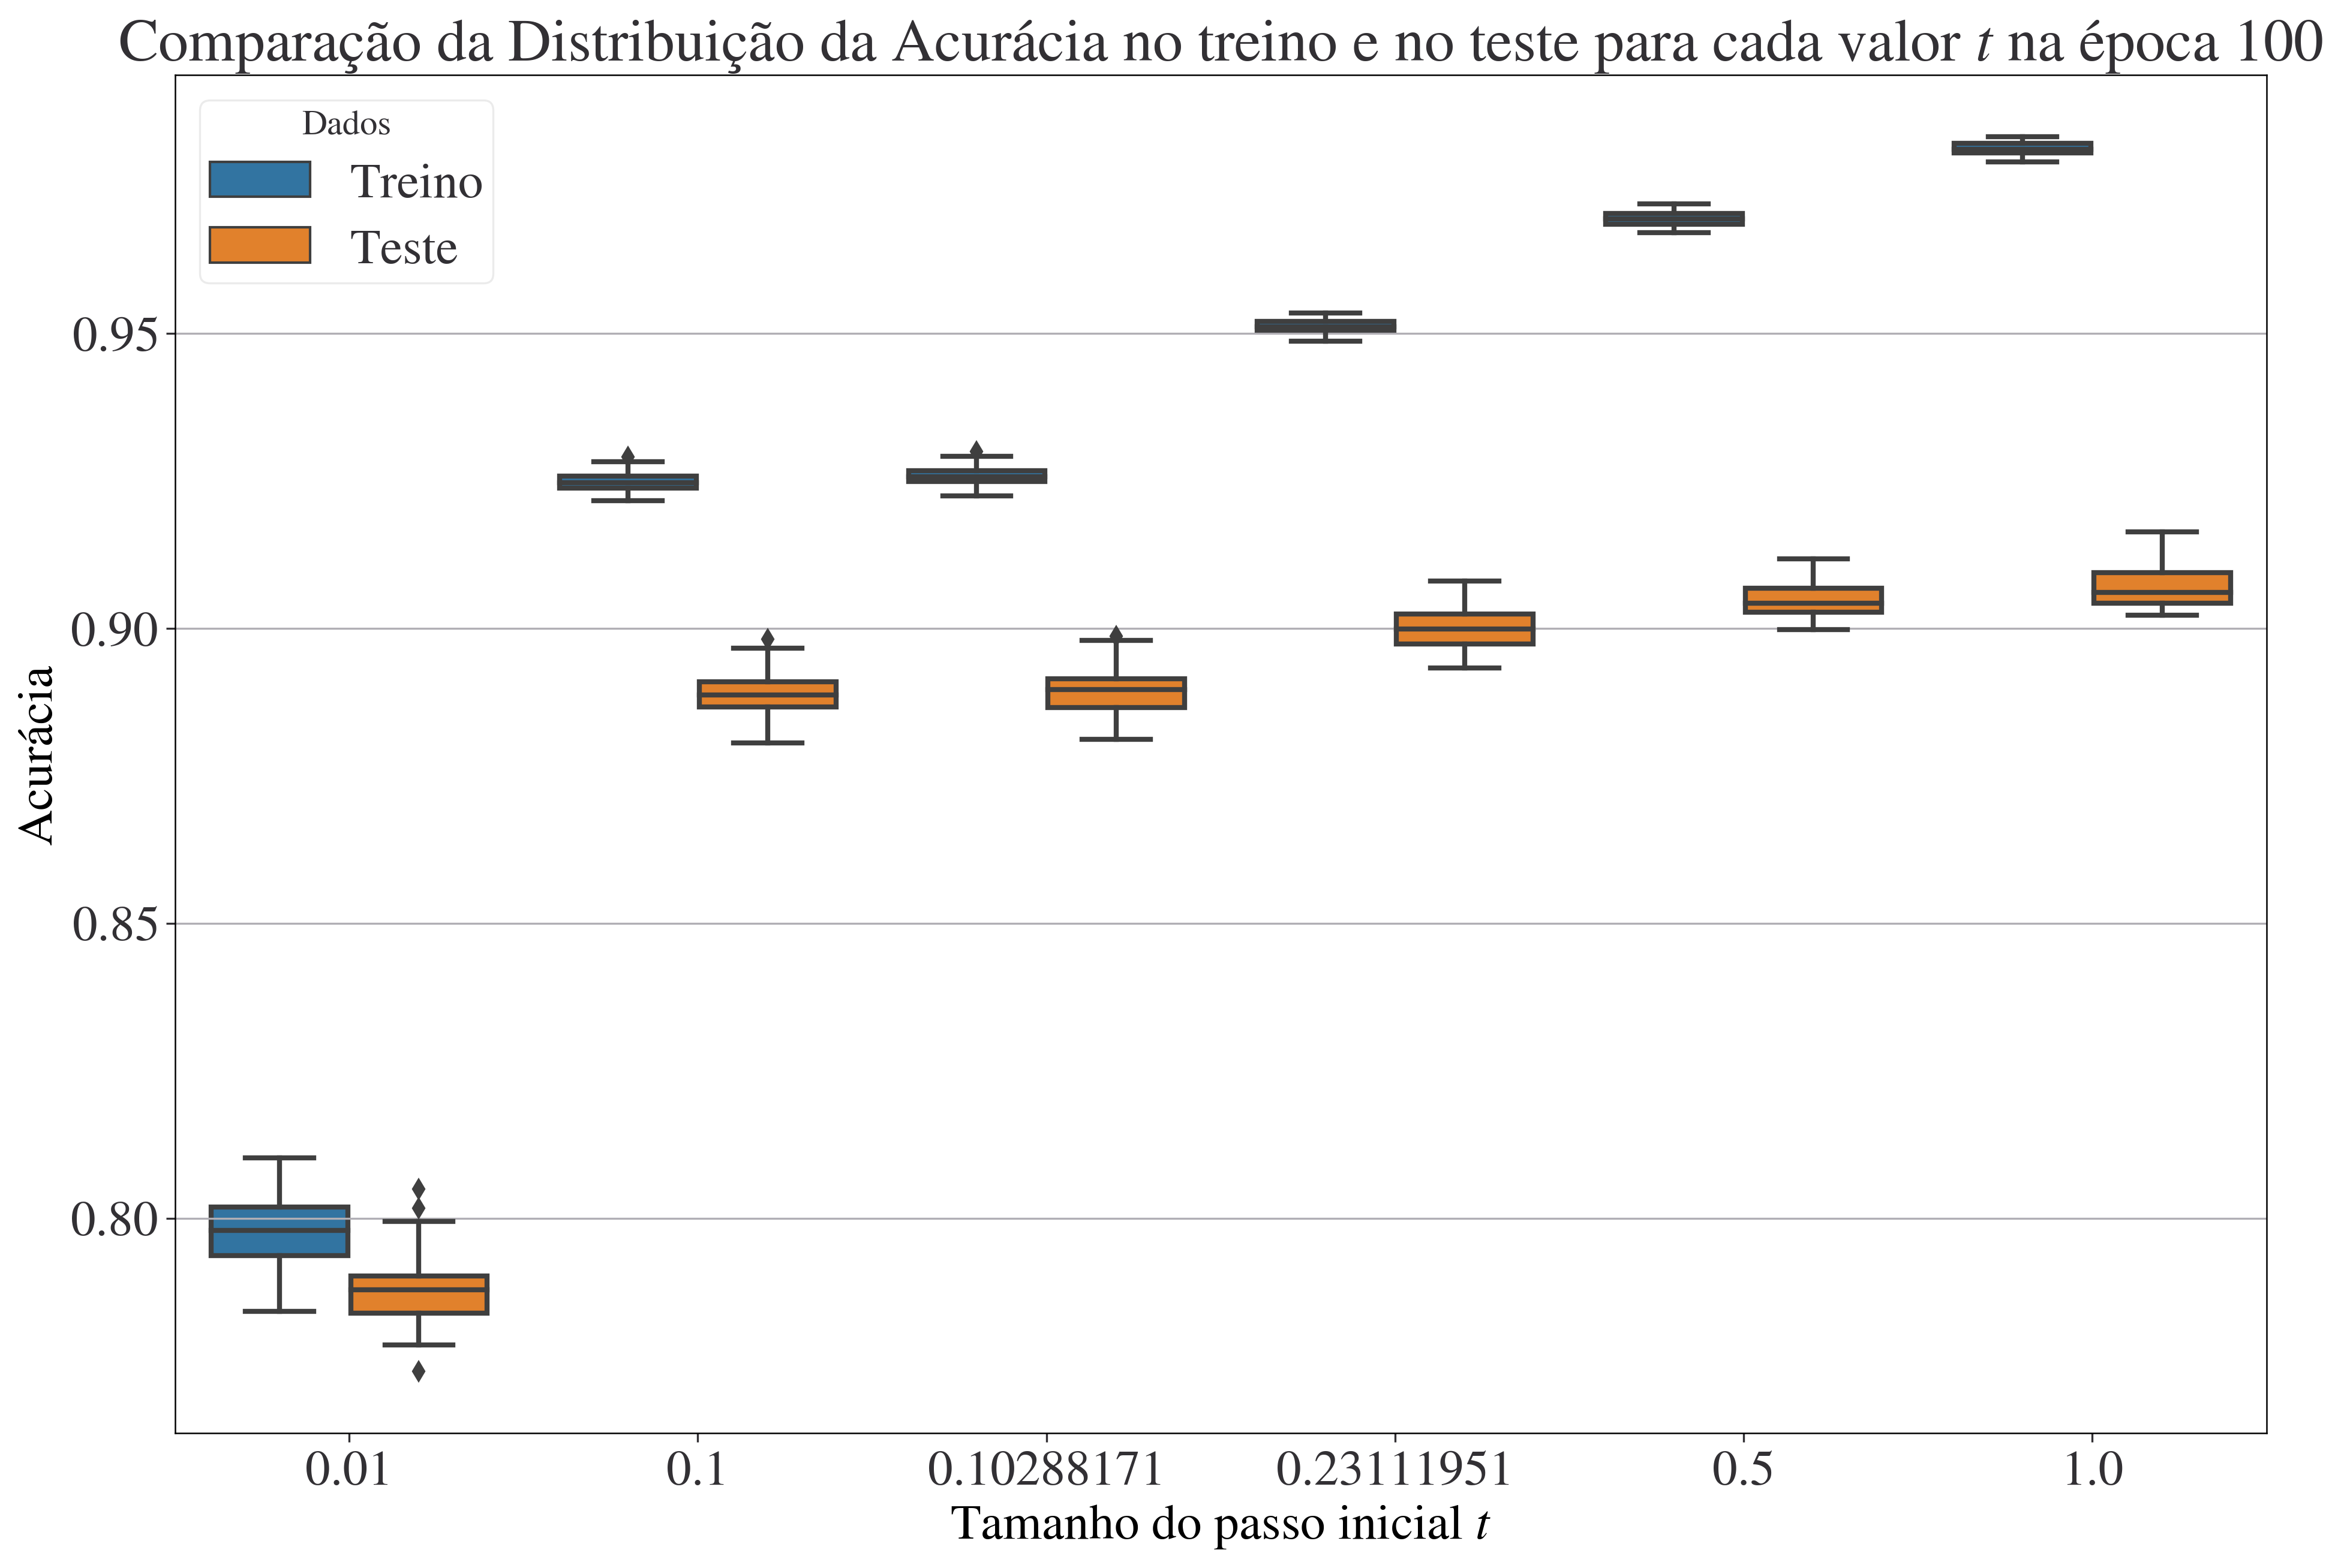

In [90]:
tab_aux1 = acuracia_treino_sgd[['passo_inicial','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_sgd[['passo_inicial','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.style.use('plot_style.txt')
fig = plt.figure(figsize=(15,10))
sns.boxplot(data = tab_aux, x = 'passo_inicial', y = '100', hue = 'Dados', palette = 'tab10')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada valor $t$ na época 100', fontsize = 24)
plt.xlabel('Tamanho do passo inicial $t$', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.legend(title='Dados', fontsize = 20, loc='upper left')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(axis='y')
plt.show()

fig.savefig('Plots_SGD/acuracia_epoca100.png')

In [92]:
tempo = acuracia_treino_sgd['tempo'].sum()
print(f'Tempo total para rodar a base do sgd : {tempo:.4f}s = {(tempo/3600):.4f}h')

Tempo total para rodar a base do sgd : 35867.5390s = 9.9632h
